# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# Data Import

In [2]:
dataset = pd.read_csv("Desktop/elections.csv")

##### Optional Drop Column

In [3]:
# Remove the column you want to drop
column_to_drop = "area_name"  # Replace "column_name" with the name of the column you want to remove
dataset.drop(columns=[column_to_drop], inplace=True)


# Data Cleaning

In [4]:
dataset.info()
#Distribution
dataset.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fips                3195 non-null   int64  
 1   state_abbreviation  3143 non-null   object 
 2   PST045214           3195 non-null   int64  
 3   PST040210           3195 non-null   int64  
 4   PST120214           3195 non-null   float64
 5   POP010210           3195 non-null   int64  
 6   AGE135214           3195 non-null   float64
 7   AGE295214           3195 non-null   float64
 8   AGE775214           3195 non-null   float64
 9   SEX255214           3195 non-null   float64
 10  RHI125214           3195 non-null   float64
 11  RHI225214           3195 non-null   float64
 12  RHI325214           3195 non-null   float64
 13  RHI425214           3195 non-null   float64
 14  RHI525214           3195 non-null   float64
 15  RHI625214           3195 non-null   float64
 16  RHI725

count          mean           std       min        25%        50%  \
fips       3195.0  3.035808e+04  1.518123e+04      0.00  18172.000   29175.00   
PST045214  3195.0  2.993963e+05  5.768468e+06      0.00  11134.500   26553.00   
PST040210  3195.0  2.899137e+05  5.584181e+06      0.00  11295.000   26446.00   
PST120214  3195.0  5.085446e-01  4.180066e+00    -17.00     -1.900      -0.10   
POP010210  3195.0  2.899019e+05  5.583955e+06     82.00  11295.000   26424.00   
AGE135214  3195.0  5.900782e+00  1.211925e+00      0.00      5.200       5.80   
AGE295214  3195.0  2.254529e+01  3.418896e+00      0.00     20.500      22.50   
AGE775214  3195.0  1.752463e+01  4.433712e+00      0.00     14.700      17.20   
SEX255214  3195.0  4.991327e+01  2.425066e+00      0.00     49.500      50.40   
RHI125214  3195.0  8.495327e+01  1.629078e+01      0.00     80.000      91.90   
RHI225214  3195.0  9.266479e+00  1.438279e+01      0.00      0.800       2.40   
RHI325214  3195.0  2.243818e+00  7.545606e+00      0.00      0.300       0.60   
RHI425214  3195.0  1.447230e+00  2.818165e+00      0.00      0.400       0.70   
RHI525214  3195.0  1.263224e-01  9.620697e-01      0.00      0.000       0.10   
RHI625214  3195.0  1.924820e+00  1.544192e+00      0.00      1.200       1.60   
RHI725214  3195.0  9.044069e+00  1.343232e+01      0.00      2.100       3.90   
RHI825214  3195.0  7.693731e+01  1.990682e+01      0.00     65.200      84.20   
POP715213  3195.0  8.636282e+01  4.381599e+00     50.80     84.000      86.80   
POP645213  3195.0  4.595806e+00  5.646595e+00      0.00      1.300       2.60   
POP815213  3195.0  9.343318e+00  1.151971e+01      0.00      2.900       5.10   
EDU635213  3195.0  8.460272e+01  6.877541e+00     45.00     80.300      86.00   
EDU685213  3195.0  1.990623e+01  8.856957e+00      3.20     13.700      17.70   
VET605213  3195.0  1.996599e+04  3.831258e+05      2.00    903.500    2075.00   
LFE305213  3195.0  2.298864e+01  5.459006e+00      4.40     19.200      22.80   
HSG010214  3195.0  1.257814e+05  2.418522e+06      0.00   5512.000   12731.00   
HSG445213  3195.0  7.205853e+01  8.041995e+00      0.00     68.000      73.20   
HSG096213  3195.0  1.259208e+01  9.415662e+00      0.00      6.300      10.00   
HSG495213  3195.0  1.319637e+05  7.820840e+04      0.00  83900.000  109800.00   
HSD410213  3195.0  1.085542e+05  2.087882e+06     33.00   4321.500   10050.00   
HSD310213  3195.0  2.526870e+00  2.496734e-01      1.39      2.370       2.50   
INC910213  3195.0  2.369701e+04  5.610505e+03   8768.00  19969.000   23021.00   
INC110213  3195.0  4.606055e+04  1.191380e+04  19986.00  38352.500   44301.00   
PVY020213  3195.0  1.664773e+01  6.461703e+00      0.90     12.100      15.90   
BZA010213  3195.0  7.025741e+03  1.354179e+05      0.00    226.000     555.00   
BZA110213  3195.0  1.100748e+05  2.138890e+06      0.00   2180.000    6578.00   
BZA115213  3195.0  6.891393e-01  5.870719e+00    -71.50     -1.700       0.70   
NES010213  3195.0  2.160151e+04  4.174352e+05      0.00    747.500    1688.00   
SBO001207  3195.0  2.564908e+04  4.909522e+05      0.00    917.500    2214.00   
SBO315207  3195.0  2.447230e+00  6.886342e+00      0.00      0.000       0.00   
SBO115207  3195.0  5.986541e-01  3.788530e+00      0.00      0.000       0.00   
SBO215207  3195.0  8.547418e-01  2.692473e+00      0.00      0.000       0.00   
SBO515207  3195.0  1.978091e-02  3.846010e-01      0.00      0.000       0.00   
SBO415207  3195.0  1.735055e+00  6.222794e+00      0.00      0.000       0.00   
SBO015207  3195.0  1.810817e+01  1.280960e+01      0.00      0.000      23.40   
MAN450207  3195.0  4.732329e+06  9.623516e+07      0.00      0.000   71030.00   
WTN220207  3195.0  3.804132e+06  7.613666e+07      0.00      0.000   48526.00   
RTN130207  3195.0  3.677504e+06  7.082882e+07      0.00  78185.000  260422.00   
RTN131207  3195.0  1.028733e+04  5.409443e+03      0.00   6910.000    9806.00   
AFN120207  3195.0  5.739886e+05  1.112830e+

### Null Values

In [5]:
dataset.isna().sum()

fips                   0
state_abbreviation    52
PST045214              0
PST040210              0
PST120214              0
POP010210              0
AGE135214              0
AGE295214              0
AGE775214              0
SEX255214              0
RHI125214              0
RHI225214              0
RHI325214              0
RHI425214              0
RHI525214              0
RHI625214              0
RHI725214              0
RHI825214              0
POP715213              0
POP645213              0
POP815213              0
EDU635213              0
EDU685213              0
VET605213              0
LFE305213              0
HSG010214              0
HSG445213              0
HSG096213              0
HSG495213              0
HSD410213              0
HSD310213              0
INC910213              0
INC110213              0
PVY020213              0
BZA010213              0
BZA110213              0
BZA115213              0
NES010213              0
SBO001207              0
SBO315207              0


In [6]:
# Calculate the threshold for missing values
threshold = 0.2 * len(dataset)

# Iterate over each column
for column in dataset.columns:
    # Check if the column has missing values
    if dataset[column].isna().sum() > 0:
        # If the column is numerical, fill missing values with column mean
        if dataset[column].dtype in ['int64', 'float64']:
            # If the number of missing values is less than the threshold, drop rows
            if dataset[column].isna().sum() < threshold:
                dataset = dataset.dropna(subset=[column])
            # If the number of missing values is greater than or equal to the threshold, fill with column mean
            else:
                column_mean = dataset[column].mean()
                dataset[column].fillna(column_mean, inplace=True)
        # If the column is categorical, drop rows with missing values
        elif dataset[column].dtype == 'object':
            # If the number of missing values is less than the threshold, drop rows
            if dataset[column].isna().sum() < threshold:
                dataset = dataset.dropna(subset=[column])

# Print modified dataset
print("Modified Dataset:")
if dataset.empty:
    print("No data available.")
else:
    print(dataset.head())

Modified Dataset:
   fips state_abbreviation  PST045214  PST040210  PST120214  POP010210  \
2  1001                 AL      55395      54571        1.5      54571   
3  1003                 AL     200111     182265        9.8     182265   
4  1005                 AL      26887      27457       -2.1      27457   
5  1007                 AL      22506      22919       -1.8      22915   
6  1009                 AL      57719      57322        0.7      57322   

   AGE135214  AGE295214  AGE775214  SEX255214  ...  SBO415207  SBO015207  \
2        6.0       25.2       13.8       51.4  ...        0.7       31.7   
3        5.6       22.2       18.7       51.2  ...        1.3       27.3   
4        5.7       21.2       16.5       46.6  ...        0.0       27.0   
5        5.3       21.0       14.8       45.9  ...        0.0        0.0   
6        6.1       23.6       17.0       50.5  ...        0.0       23.2   

   MAN450207  WTN220207  RTN130207  RTN131207  AFN120207  BPS030214  \
2        

In [7]:
# Check for any remaining missing values
missing_values = dataset.isna().sum().sum()
if missing_values > 0:
    print("Warning: Dataset still contains missing values after cleaning.")


# Feature Engineering 

In [8]:
# Convert the "sales" column to string type if it's not already
#dataset['sales'] = dataset['sales'].astype(str)

# Remove dollar signs and commas, and convert to integers
#dataset['sales'] = dataset['sales'].str.replace('$', '').str.replace(',', '', regex=False).astype(int)

### One Hot Encoder

In [9]:
# Check for categorical variables
categorical_columns = set()

# Add columns with less than 10 unique values
for column in dataset.columns:
    if dataset[column].nunique() < 10:
        categorical_columns.add(column)

# Append columns with object data type
categorical_columns.update(col for col in dataset.select_dtypes(include=['object']).columns.tolist())

# Identify and add true/false columns
true_false_columns = [col for col in dataset.columns if dataset[col].dtype == 'bool']
categorical_columns.update(true_false_columns)

if len(categorical_columns) > 0:
    print("Categorical columns found:")
    for column in categorical_columns:
        print(column)
    
    # Fit the encoder to the categorical columns
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_columns = encoder.fit_transform(dataset[list(categorical_columns)])

    # Get the feature names from the encoder
    encoded_feature_names = encoder.get_feature_names_out(input_features=list(categorical_columns))

    # Create a DataFrame with the encoded columns and feature names
    encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names, index=dataset.index)

    # Drop original categorical columns
    dataset.drop(columns=categorical_columns, inplace=True)
    
    # Concatenate encoded columns with dataset
    dataset = pd.concat([dataset, encoded_df], axis=1)
    
# Display the modified dataset
print("Modified Dataset:")
if dataset.empty:
    print("No data available.")
else:
    print(dataset.head())

Categorical columns found:
state_abbreviation
SBO515207
Modified Dataset:
   fips  PST045214  PST040210  PST120214  POP010210  AGE135214  AGE295214  \
2  1001      55395      54571        1.5      54571        6.0       25.2   
3  1003     200111     182265        9.8     182265        5.6       22.2   
4  1005      26887      27457       -2.1      27457        5.7       21.2   
5  1007      22506      22919       -1.8      22915        5.3       21.0   
6  1009      57719      57322        0.7      57322        6.1       23.6   

   AGE775214  SEX255214  RHI125214  ...  state_abbreviation_WV  \
2       13.8       51.4       77.9  ...                    0.0   
3       18.7       51.2       87.1  ...                    0.0   
4       16.5       46.6       50.2  ...                    0.0   
5       14.8       45.9       76.3  ...                    0.0   
6       17.0       50.5       96.0  ...                    0.0   

   state_abbreviation_WY  SBO515207_0.1  SBO515207_0.2  SBO515207_

### Binary Variables

In [10]:
binary_variables = []

# Iterate through each column
for column in dataset.columns:
    # Check if the number of unique values is 2 and values are 0 and 1, or if the value is just 0
    if (dataset[column].nunique() == 2 and set(dataset[column]) == {0, 1}) or (dataset[column].nunique() == 1 and set(dataset[column]) == {0}):
        binary_variables.append(column)

# Print binary variables
print("Binary Variables:")
print(binary_variables)

Binary Variables:
['state_abbreviation_AL', 'state_abbreviation_AR', 'state_abbreviation_AZ', 'state_abbreviation_CA', 'state_abbreviation_CO', 'state_abbreviation_CT', 'state_abbreviation_DC', 'state_abbreviation_DE', 'state_abbreviation_FL', 'state_abbreviation_GA', 'state_abbreviation_HI', 'state_abbreviation_IA', 'state_abbreviation_ID', 'state_abbreviation_IL', 'state_abbreviation_IN', 'state_abbreviation_KS', 'state_abbreviation_KY', 'state_abbreviation_LA', 'state_abbreviation_MA', 'state_abbreviation_MD', 'state_abbreviation_ME', 'state_abbreviation_MI', 'state_abbreviation_MN', 'state_abbreviation_MO', 'state_abbreviation_MS', 'state_abbreviation_MT', 'state_abbreviation_NC', 'state_abbreviation_ND', 'state_abbreviation_NE', 'state_abbreviation_NH', 'state_abbreviation_NJ', 'state_abbreviation_NM', 'state_abbreviation_NV', 'state_abbreviation_NY', 'state_abbreviation_OH', 'state_abbreviation_OK', 'state_abbreviation_OR', 'state_abbreviation_PA', 'state_abbreviation_RI', 'state

In [11]:
missing_values = dataset.isna().sum().sum()
if missing_values > 0:
    print("Warning: Dataset still contains missing values after cleaning.")

# Dimensionality Reduction

In [12]:
#Check for perfect multicollinearity
correlation_matrix = dataset.corr()
highly_correlated_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_variables.add(colname_i)
            highly_correlated_variables.add(colname_j)
print("Highly correlated variables:", highly_correlated_variables)

# Step 2: Remove constant variables
constant_variables = [col for col in dataset.columns if dataset[col].nunique() == 1]
print("Constant variables:", constant_variables)
dataset.drop(columns=constant_variables, inplace=True)

Highly correlated variables: {'NES010213', 'AFN120207', 'POP815213', 'SBO215207', 'RHI125214', 'RHI425214', 'PST045214', 'RHI725214', 'SBO001207', 'POP010210', 'AGE295214', 'RHI225214', 'MAN450207', 'BZA110213', 'INC110213', 'INC910213', 'HSG010214', 'POP645213', 'VET605213', 'PST040210', 'HSD410213', 'AGE135214', 'BZA010213', 'WTN220207', 'RTN130207'}
Constant variables: []


### Outlier Detection

#### **Data is scaled in this step***

In [13]:
# Remove NaN values from the dataset
dataset = dataset.dropna()

# Scale the features (X)
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Initialize KMeans
kmeans = KMeans()
kmeans.fit(scaled_X)

# Get cluster centers
centers = kmeans.cluster_centers_

# Calculate distances of each point to its respective cluster center
distances = np.sqrt(np.sum((scaled_X - centers[kmeans.labels_]) ** 2, axis=1))

# Calculate mean and standard deviation of distances
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Desired threshold as 2 standard deviations from the mean
desired_threshold = mean_distance + 2 * std_distance

# Use the threshold for outlier detection
outliers_mask = distances > desired_threshold

# Reset index to ensure alignment
dataset.reset_index(drop=True, inplace=True)
outliers_dataset = dataset[outliers_mask]

# Print indices and details of outliers
print("Indices of outliers:", outliers_dataset.index)
print("Details of outliers:")
print(outliers_dataset)

# Remove outliers from the original dataset
dataset = dataset[~outliers_mask]


Indices of outliers: Int64Index([  40,   67,   68,   70,   73,   83,   84,   85,   92,   95,   96,
             103,  108,  186,  192,  200,  204,  218,  219,  221,  223,  224,
             226,  228,  308,  309,  310,  311,  312,  313,  314,  315,  316,
             317,  318,  319,  322,  325,  362,  367,  453,  529,  546,  547,
             548,  549,  550,  610, 1207, 1208, 1220, 1225, 1226, 1229, 1300,
            1312, 1748, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772,
            1773, 1812, 1830, 1851, 1858, 1868, 1914, 2016, 2032, 2231, 2233,
            2241, 2294, 2311, 2312, 2313, 2314, 2315, 2417, 2421, 2537, 2623,
            2742, 2782, 2794, 2801, 2848, 2916, 2925, 2970, 2971, 2984],
           dtype='int64')
Details of outliers:
       fips  PST045214  PST040210  PST120214  POP010210  AGE135214  AGE295214  \
40     1081     154255     140296        9.9     140247        5.8       21.6   
67     2013       3360       3141        7.0       3141        2.8       

# Fitting the K-Means model

In [14]:
from sklearn.cluster import KMeans

kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

List = []
for k in range (1, 11):
    kmeans = KMeans (n_clusters = k, **kmeans_set) # ** opens the dictionary
    kmeans.fit (dataset)
    List.append (kmeans.inertia_) 

In [15]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 11), List, curve = "convex", direction = "decreasing")
k1.elbow

3

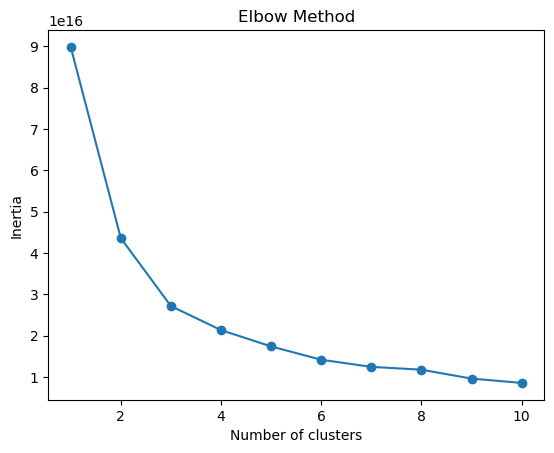

In [16]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset)  
    inertias.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Initialize and fit KMeans model

from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3)
kmeans = kmeans.fit(dataset)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

In [18]:
dataset = dataset.copy ()
dataset ["Clusters"] = kmeans.labels_
dataset

fips  PST045214  PST040210  PST120214  POP010210  AGE135214  AGE295214  \
0      1001      55395      54571        1.5      54571        6.0       25.2   
1      1003     200111     182265        9.8     182265        5.6       22.2   
2      1005      26887      27457       -2.1      27457        5.7       21.2   
3      1007      22506      22919       -1.8      22915        5.3       21.0   
4      1009      57719      57322        0.7      57322        6.1       23.6   
...     ...        ...        ...        ...        ...        ...        ...   
3138  56037      45010      43806        2.7      43806        7.3       27.0   
3139  56039      22930      21294        7.7      21294        5.7       19.1   
3140  56041      20904      21118       -1.0      21118        7.6       29.8   
3141  56043       8322       8533       -2.5       8533        5.5       23.9   
3142  56045       7201       7208       -0.1       7208        6.5       21.6   

      AGE775214  SEX255214  RHI125214  ...  state_abbreviation_WY  \
0          13.8       51.4       77.9  ...                    0.0   
1          18.7       51.2       87.1  ...                    0.0   
2          16.5       46.6       50.2  ...                    0.0   
3          14.8       45.9       76.3  ...                    0.0   
4          17.0       50.5       96.0  ...                    0.0   
...         ...        ...        ...  ...                    ...   
3138        9.5       48.1       94.3  ...                    1.0   
3139       12.2       48.2       94.9  ...                    1.0   
3140       11.0       49.6       95.4  ...                    1.0   
3141       20.1       49.3       94.8  ...                    1.0   
3142       18.1       47.4       95.0  ...                    1.0   

      SBO515207_0.1  SBO515207_0.2  SBO515207_0.3  SBO515207_0.4  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3138            0.0            0.0            0.0            0.0   
3139            0.0            0.0            0.0            0.0   
3140            0.0            0.0            0.0            0.0   
3141            0.0            0.0            0.0            0.0   
3142            0.0            0.0            0.0            0.0   

      SBO515207_0.5  SBO515207_9.1  SBO515207_10.2  SBO515207_10.5  Clusters  
0               0.0            0.0             0.0             0.0         0  
1               0.0            0.0             0.0             0.0         0  
2               0.0            0.0             0.0             0.0         0  
3               0.0            0.0             0.0             0.0         0  
4               0.0            0.0             0.0             0.0         0  
...             ...            ...             ...             ...       ...  
3138            0.0            0.0             0.0             0.0         0  
3139            0.0            0.0             0.0             0.0         0  
3140            0.0            0.0             0.0             0.0         0  
3141            0.0            0.0             0.0             0.0         0  
3142            0.0            0.0             0.0             0.0         0  

[3045 rows x 110 columns]

In [19]:
dataset.Clusters.value_counts ()

0    2908
2     124
1      13
Name: Clusters, dtype: int64

## Clusters

/var/folders/wx/ryvwptxd2r3_cfnyq2_0tcrw0000gn/T/ipykernel_75884/1070681977.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figsize here


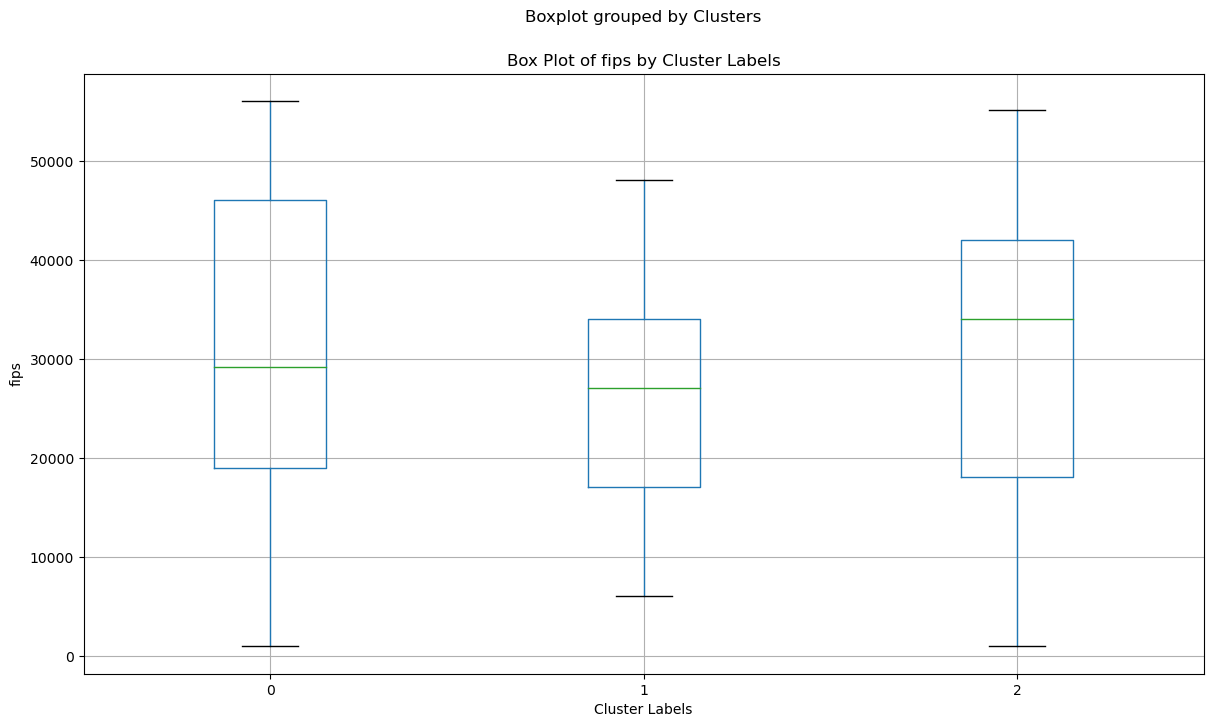

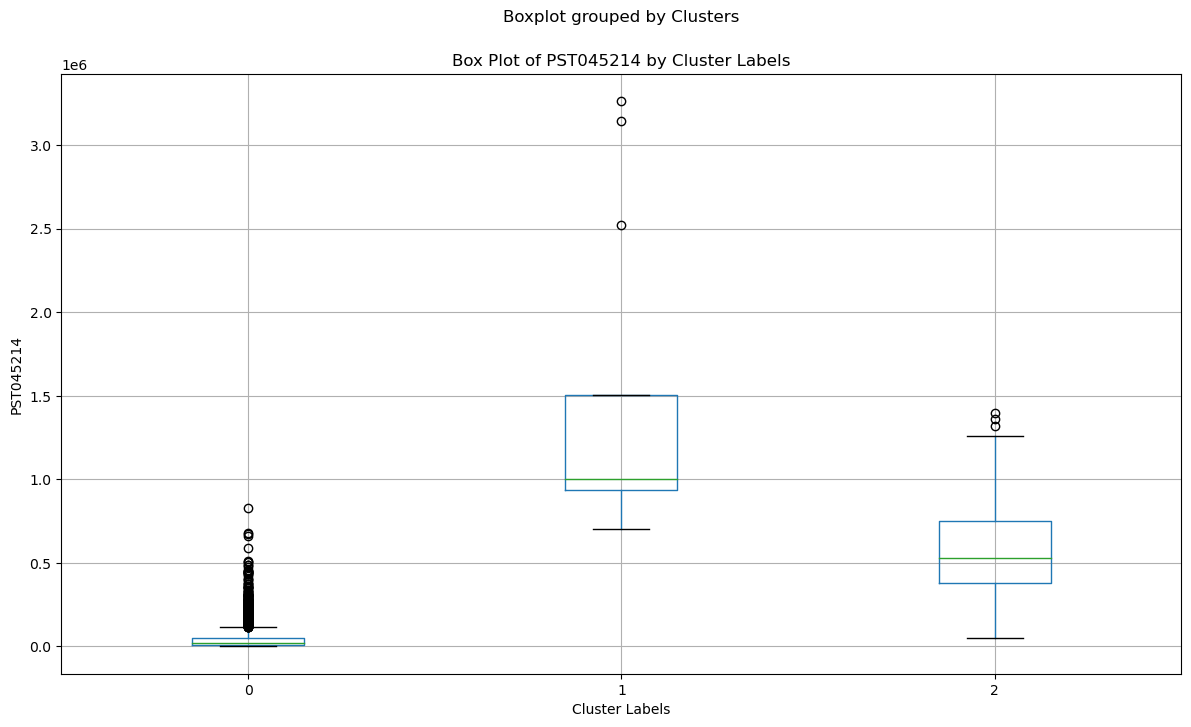

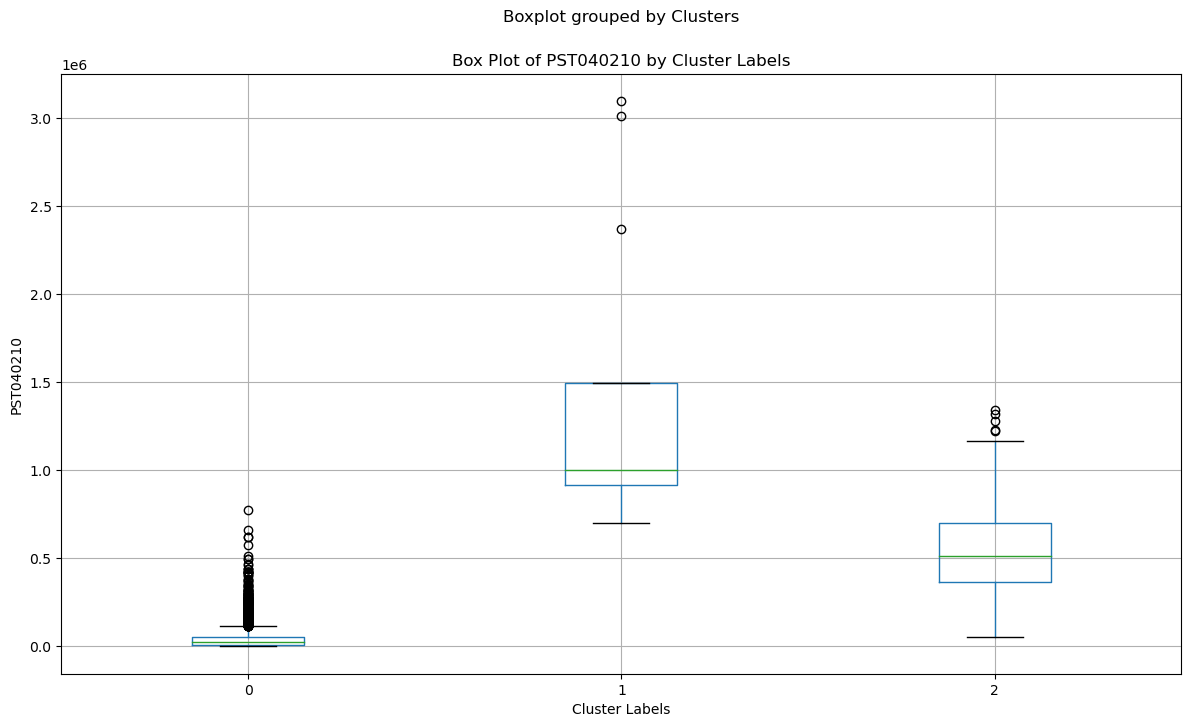

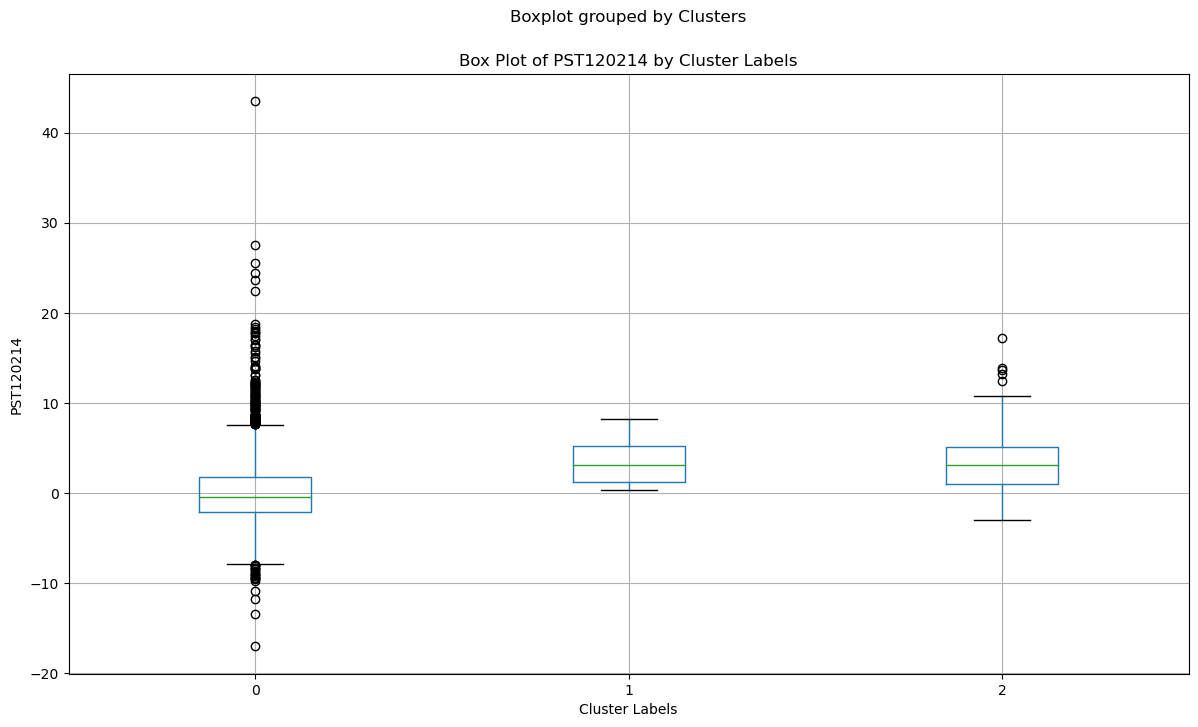

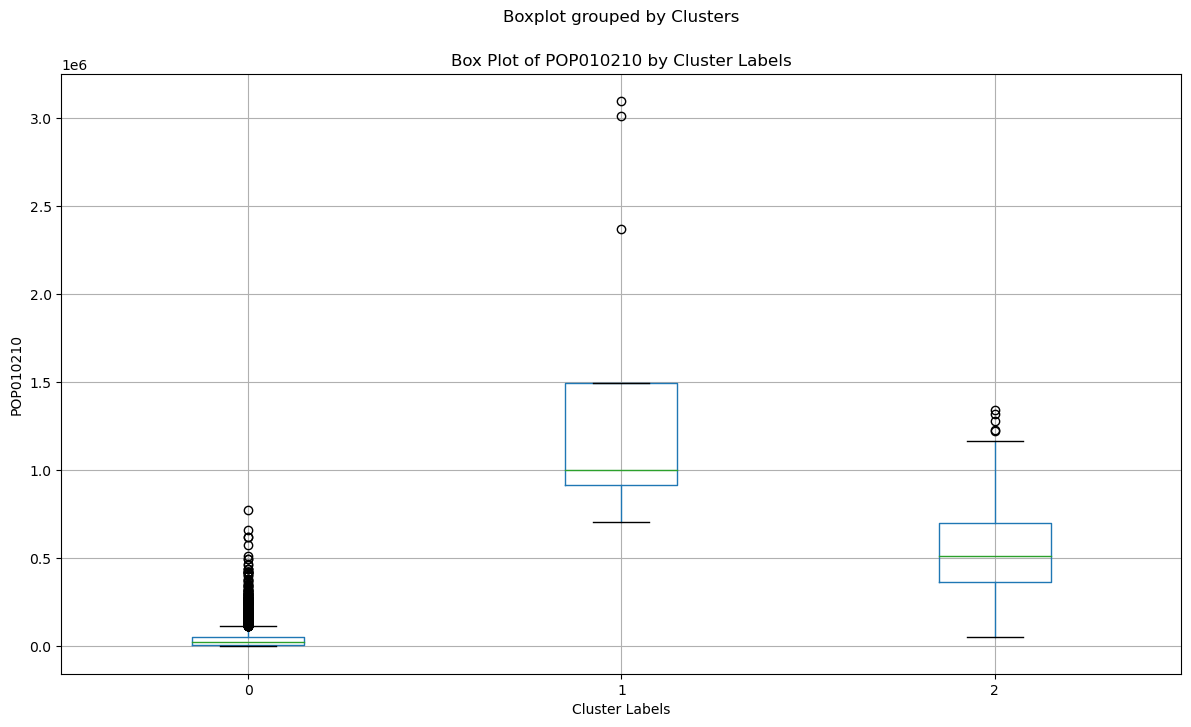

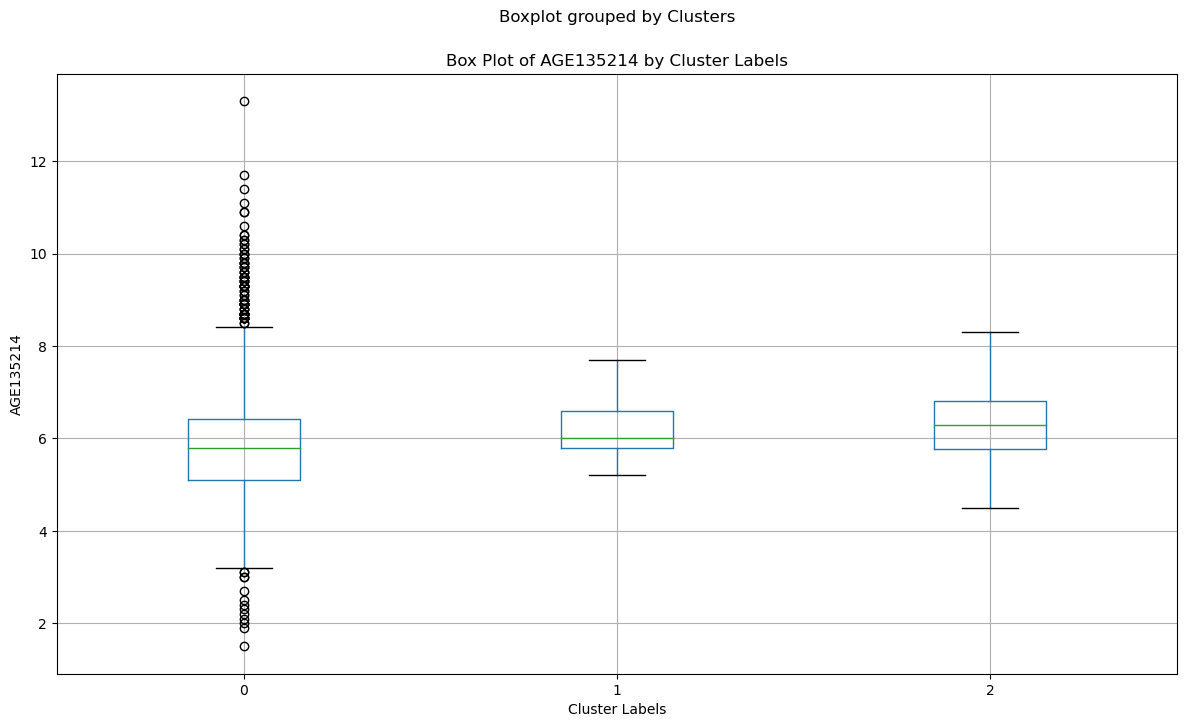

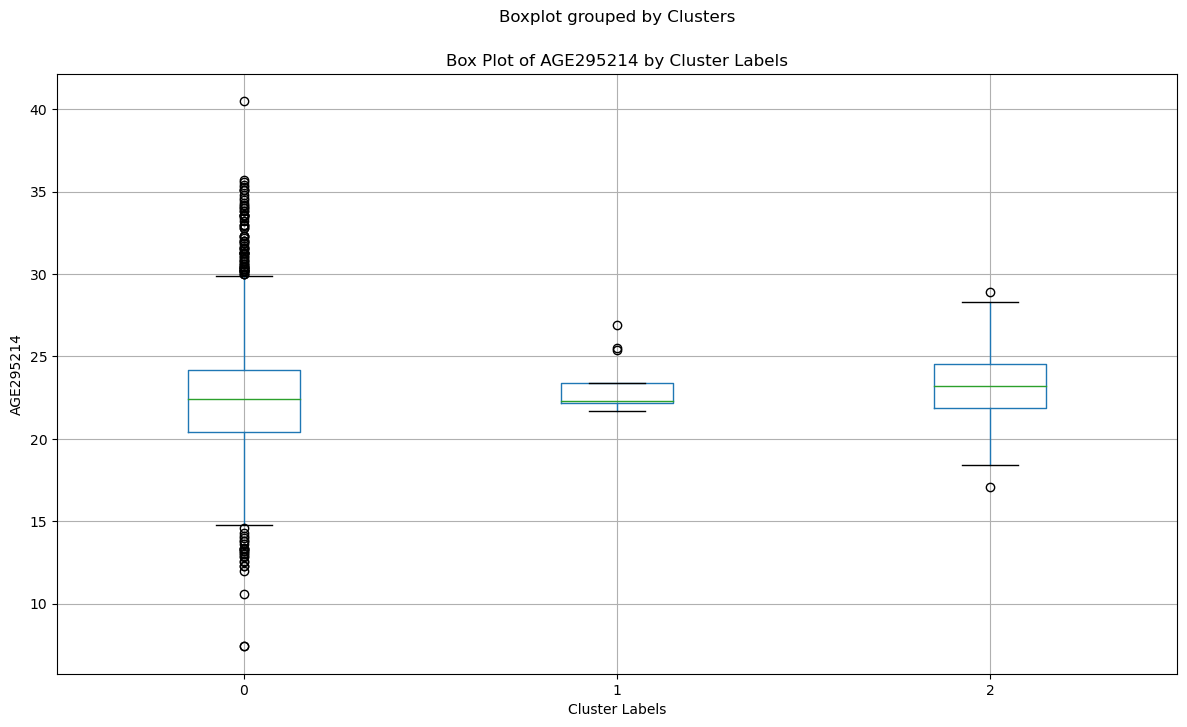

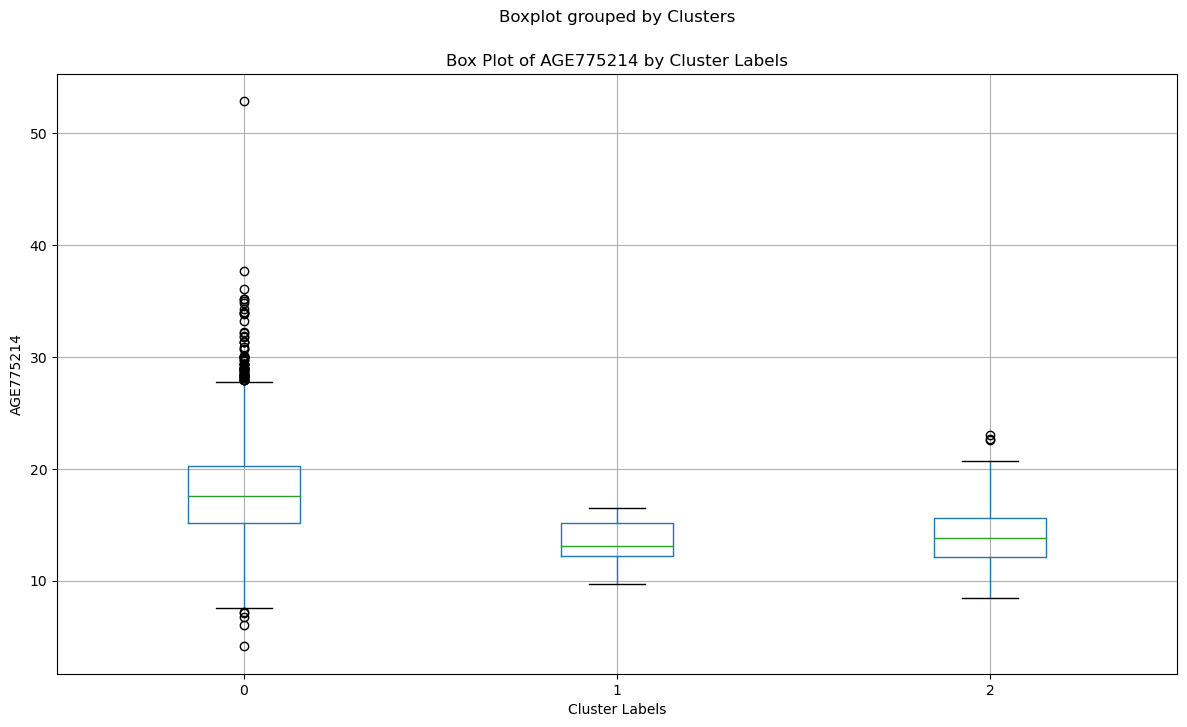

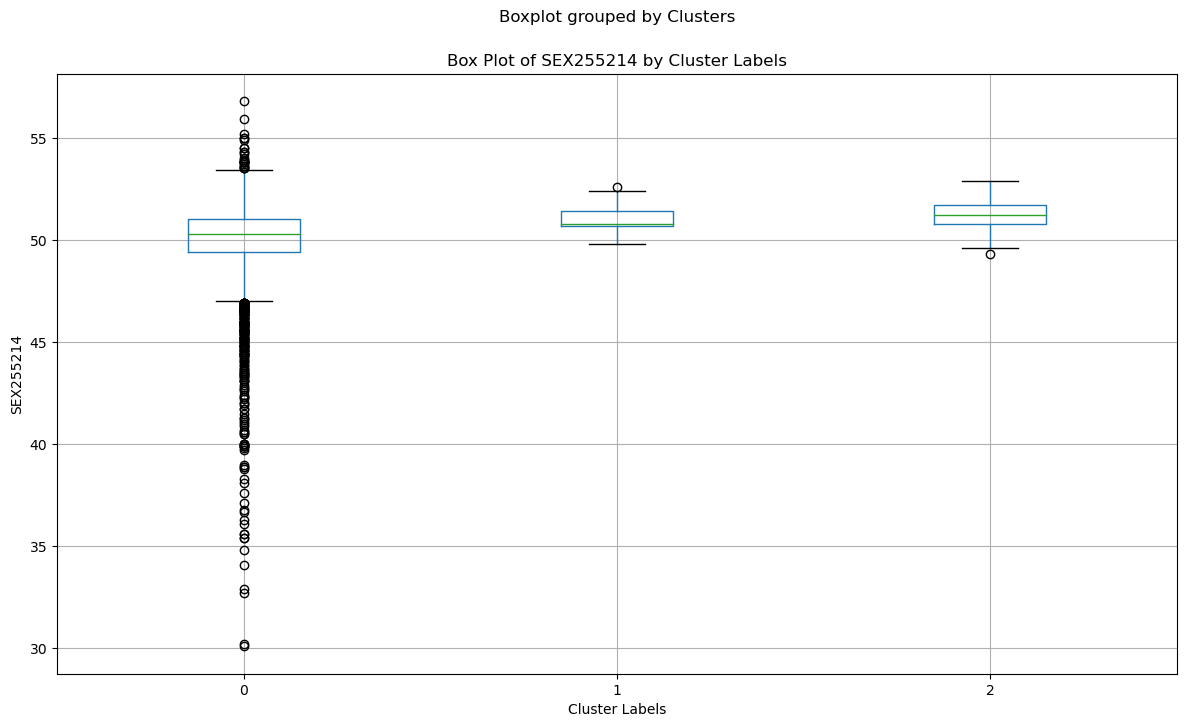

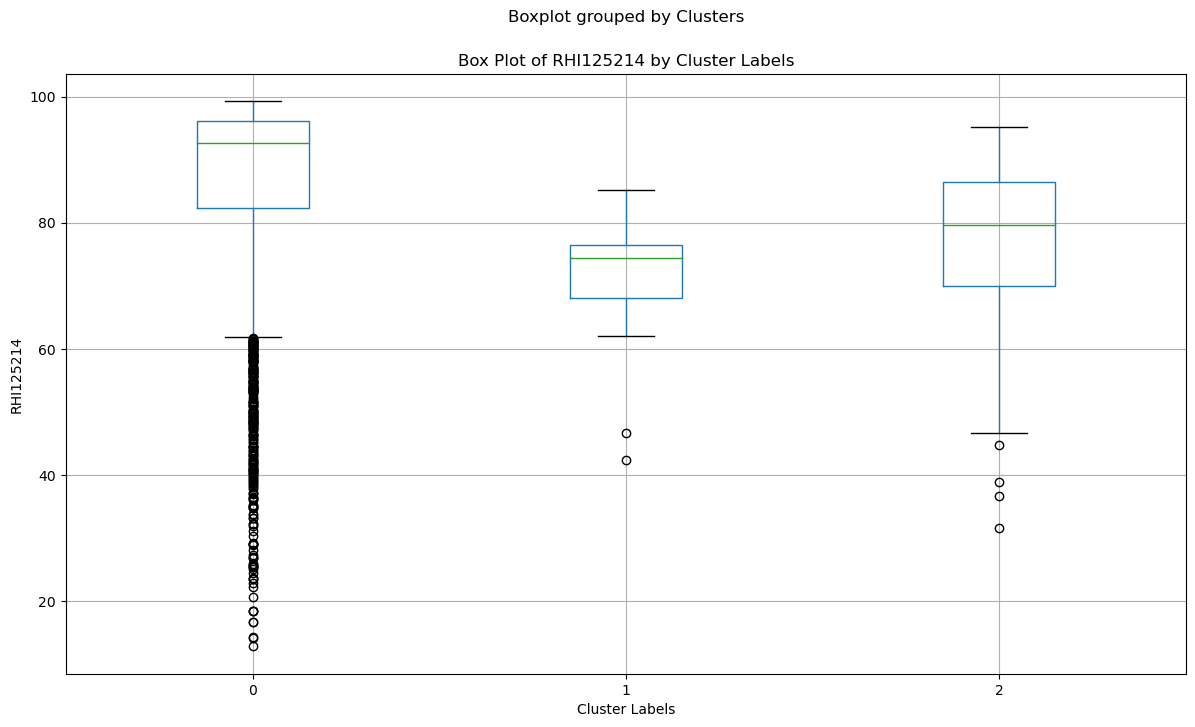

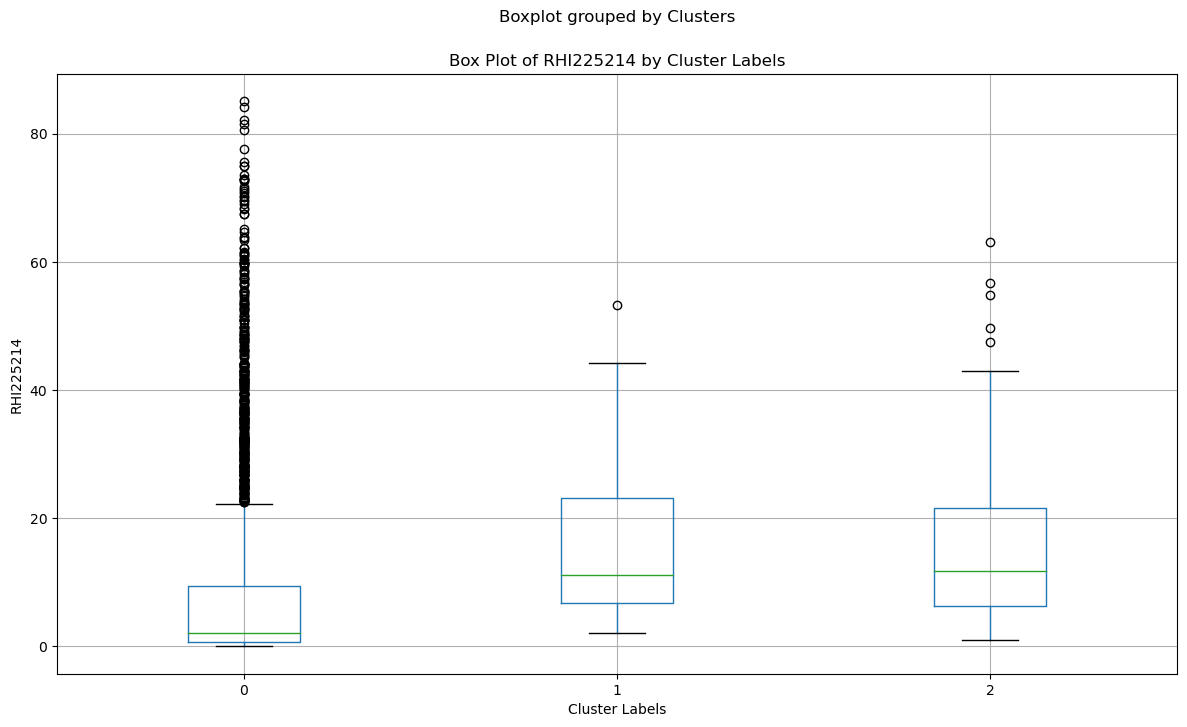

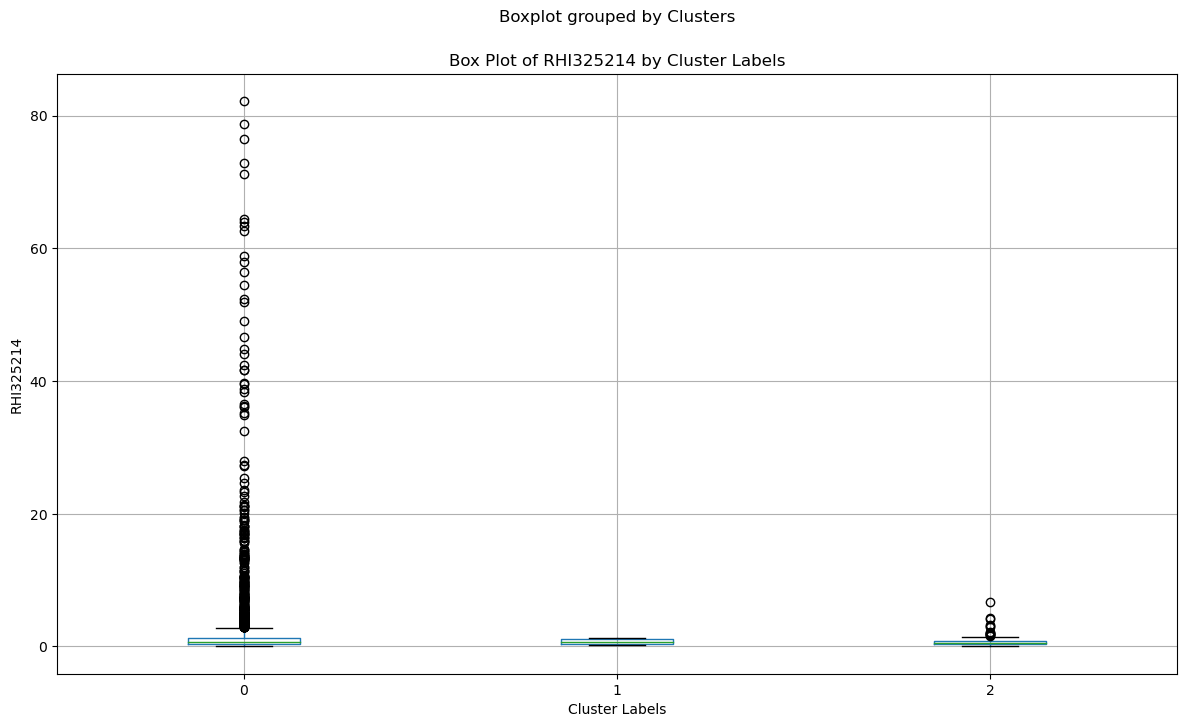

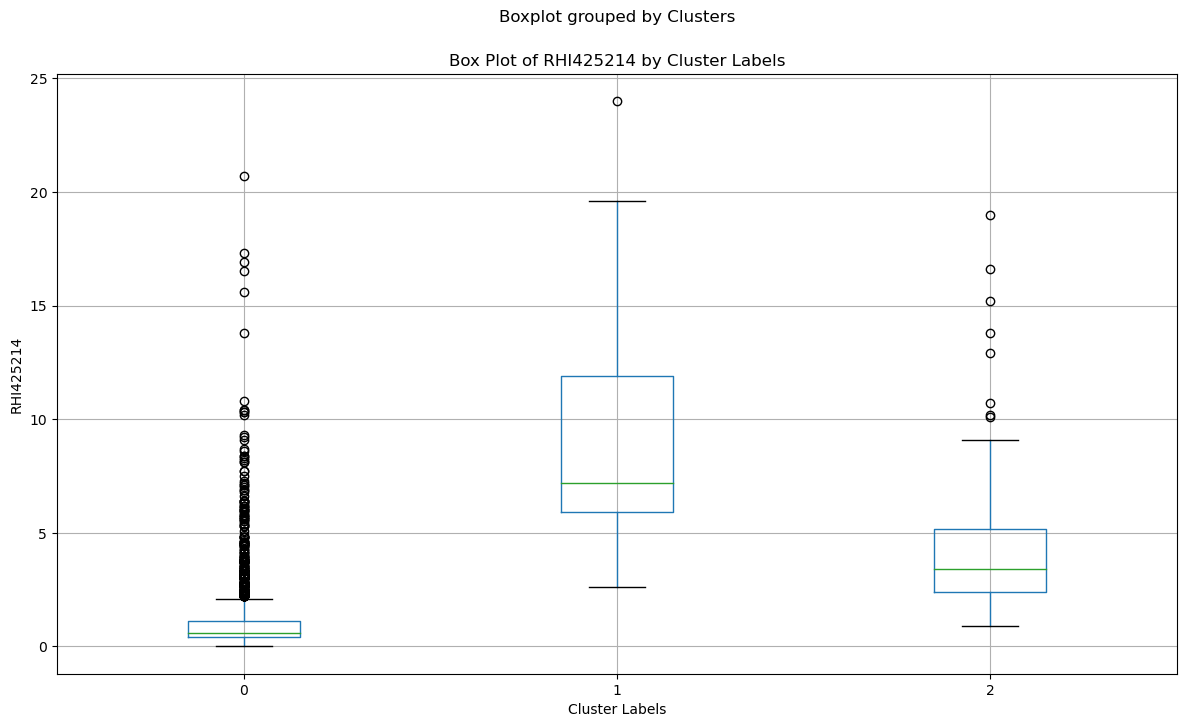

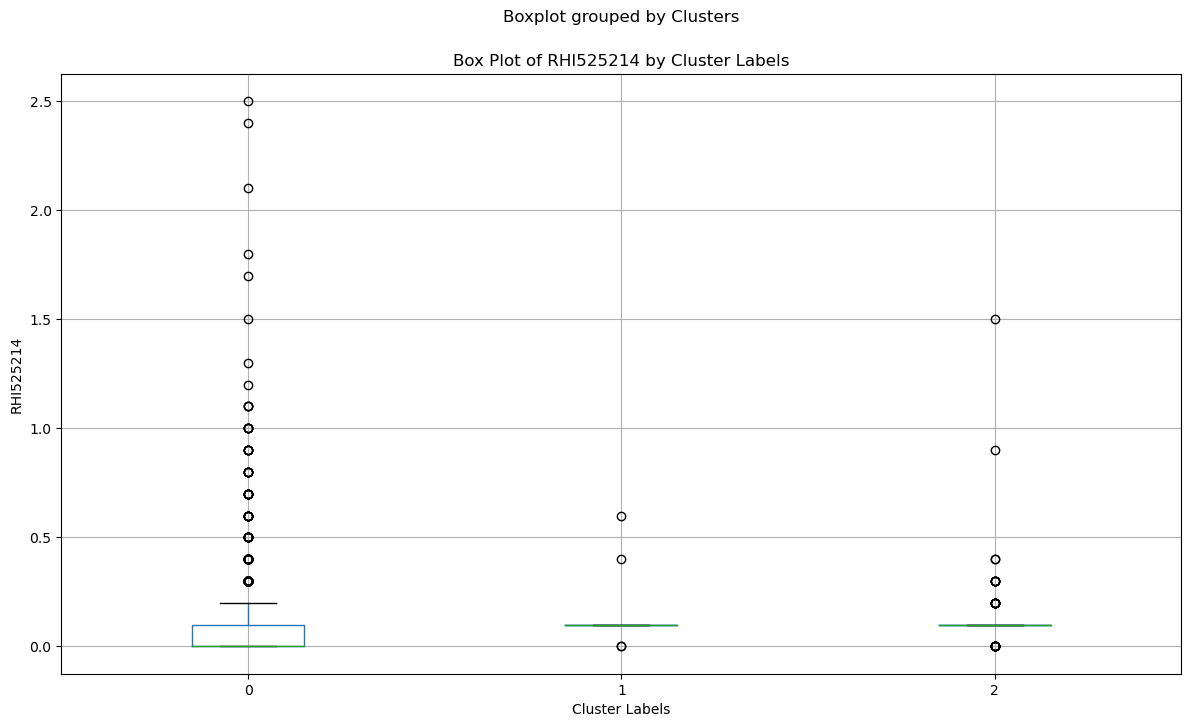

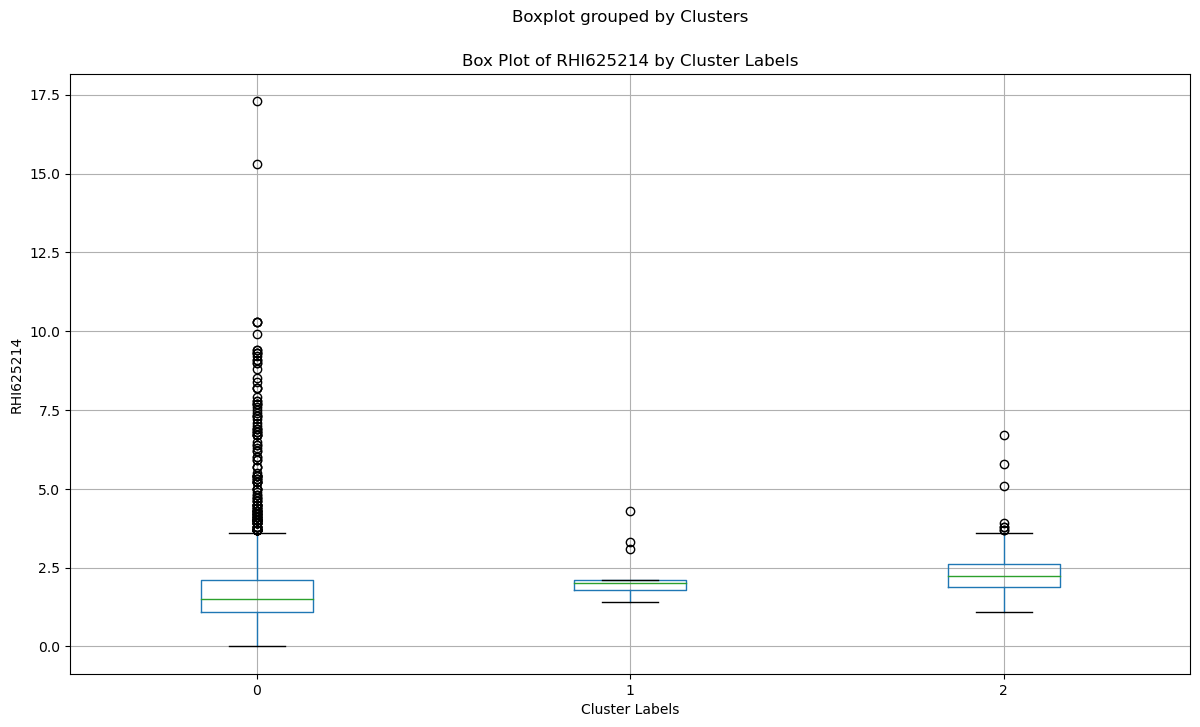

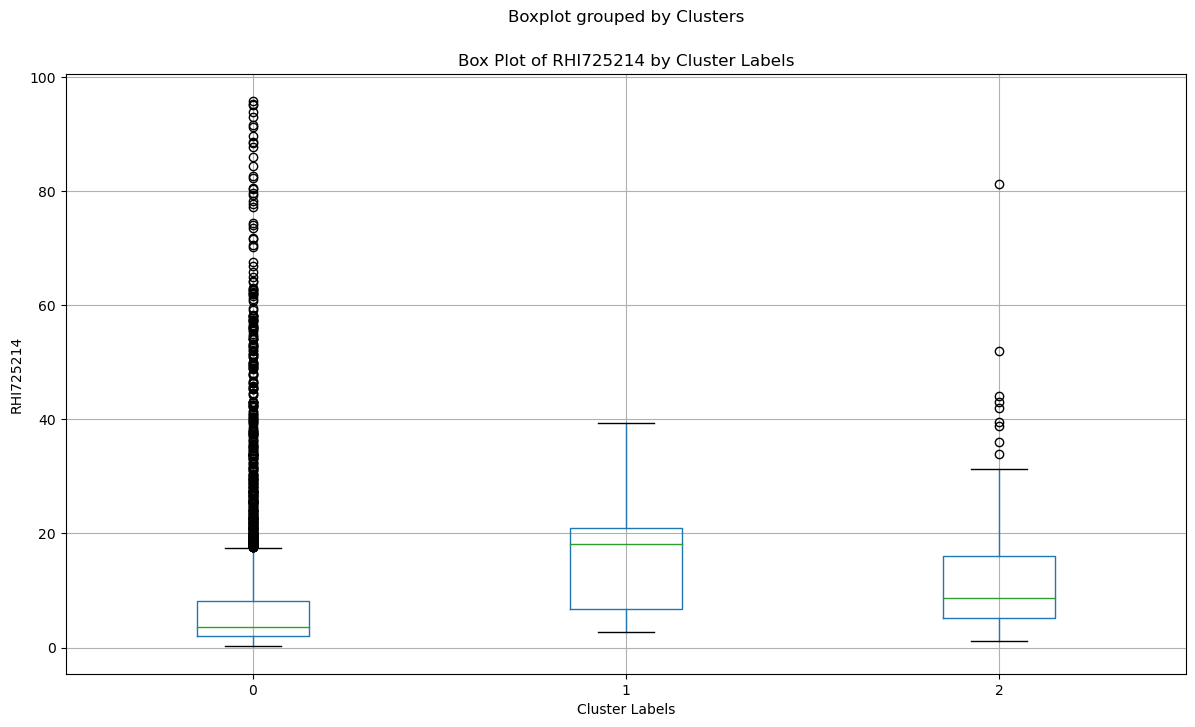

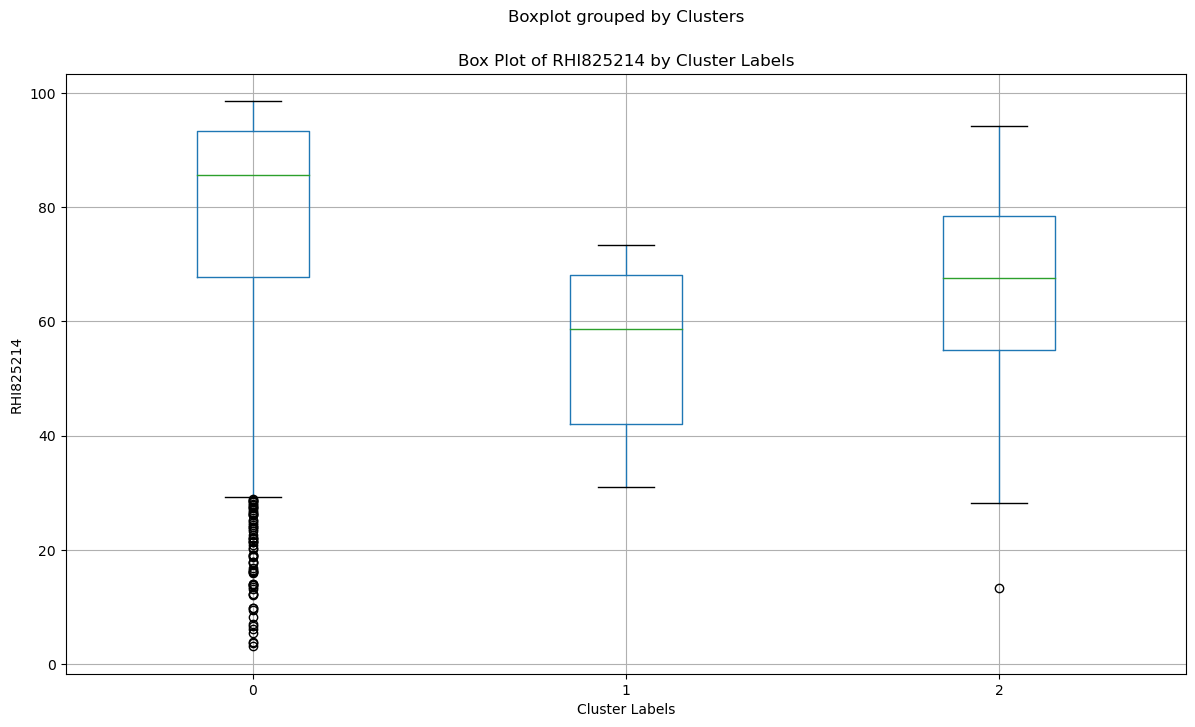

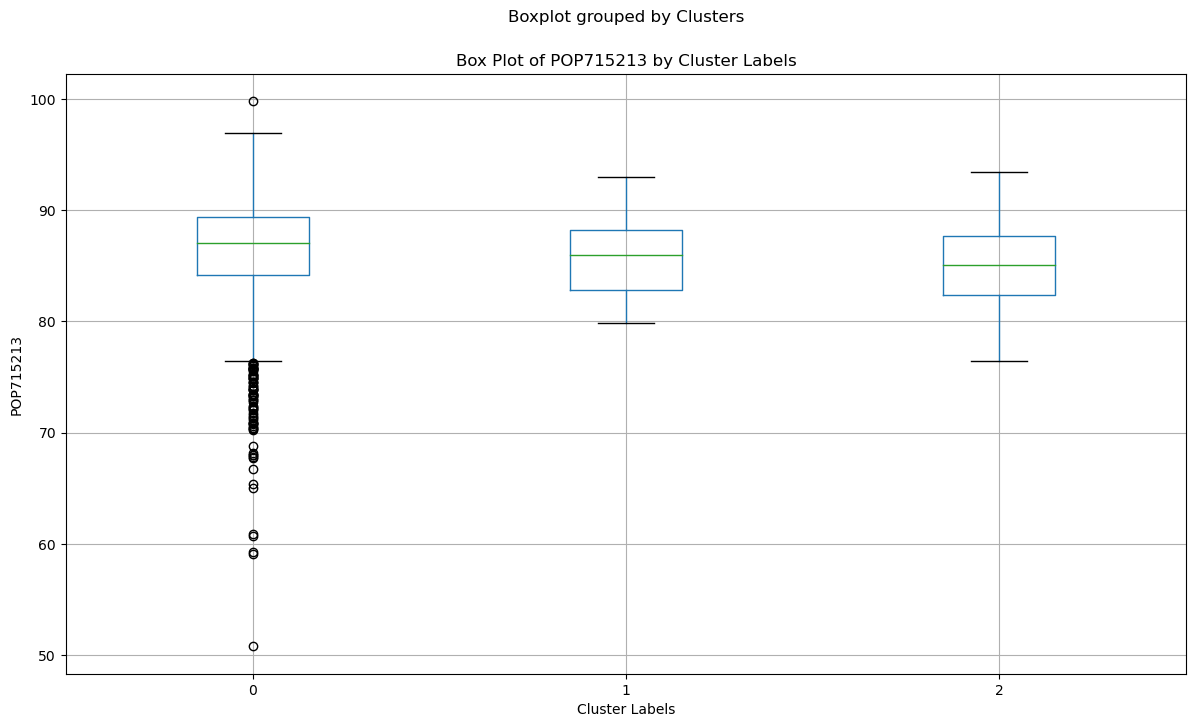

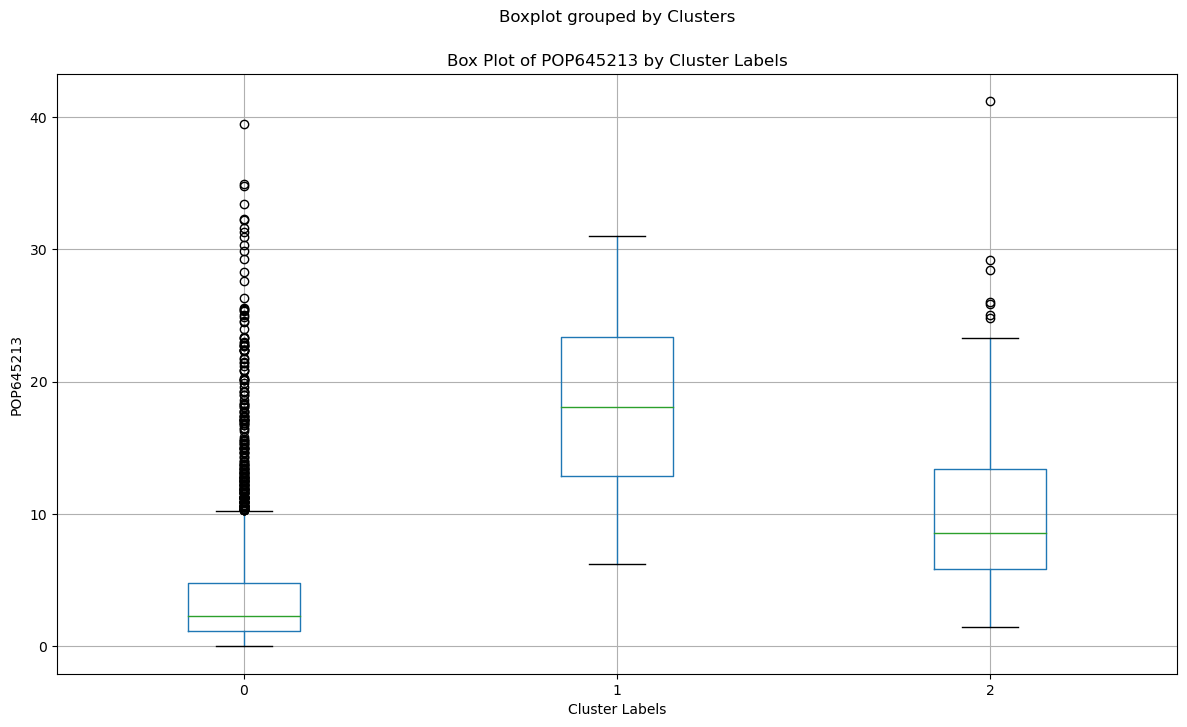

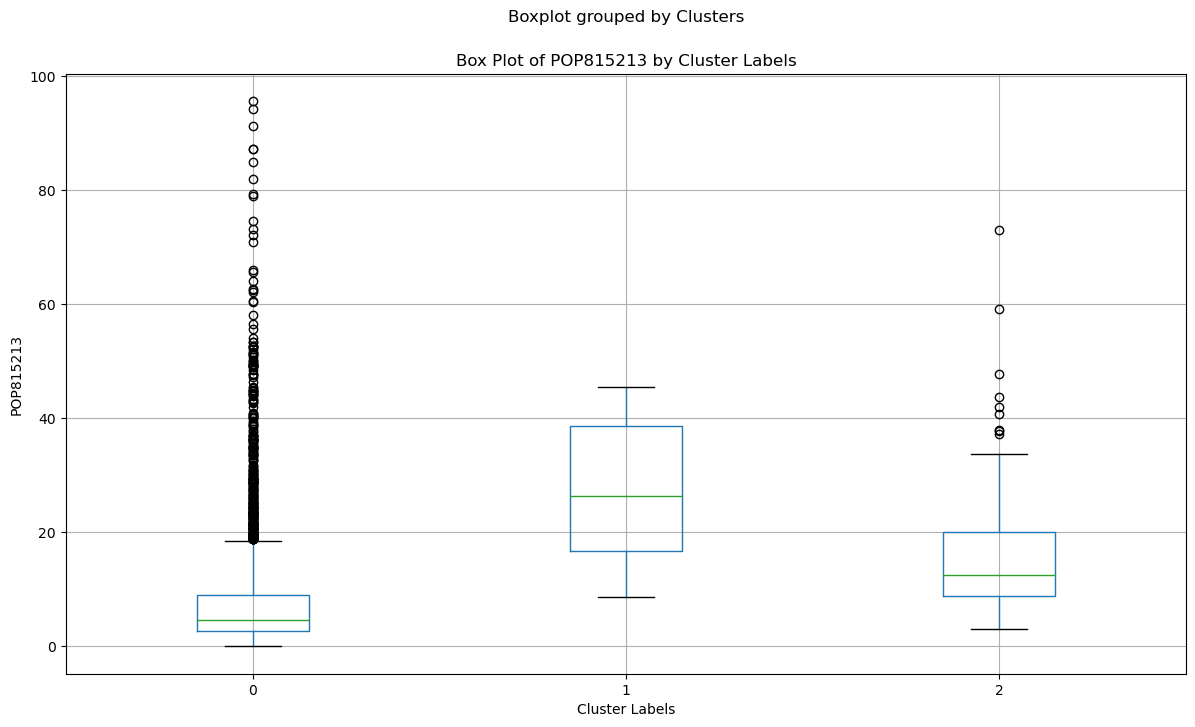

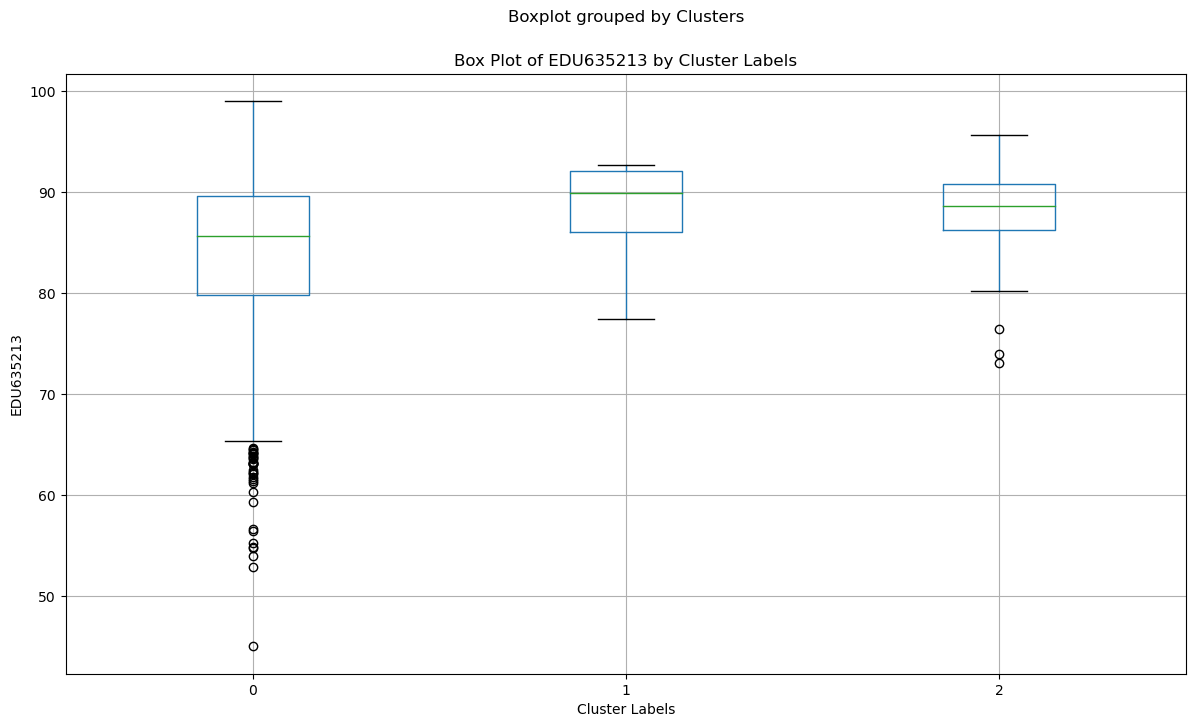

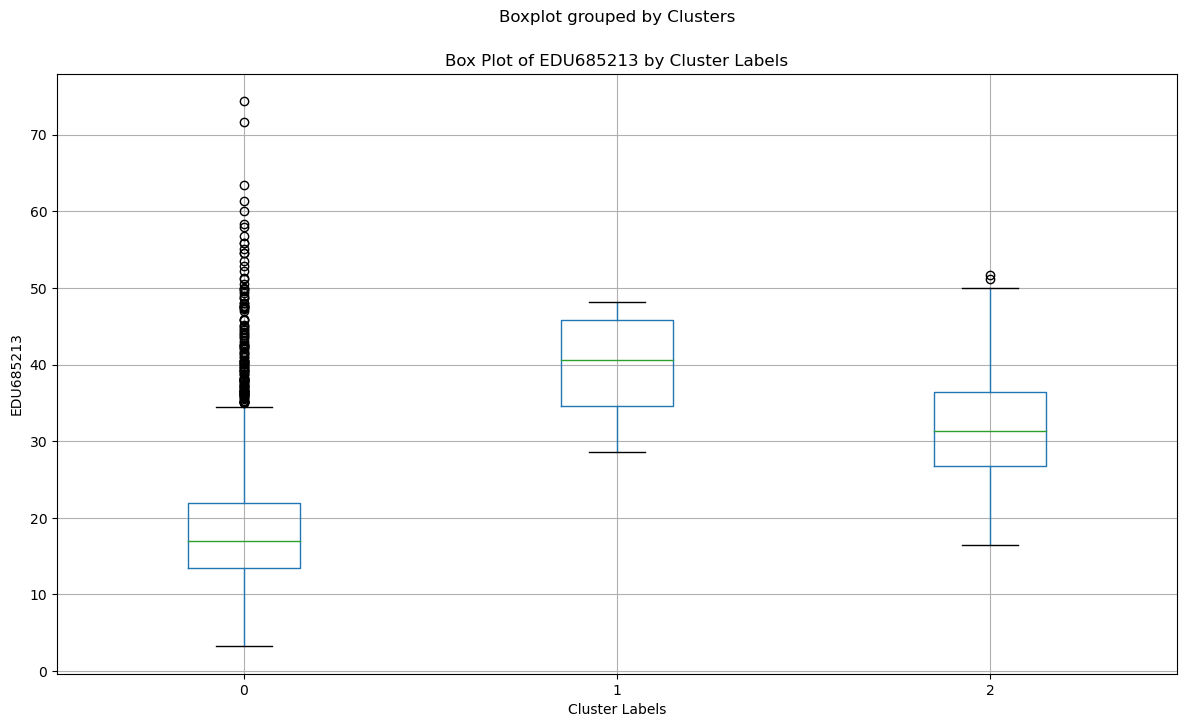

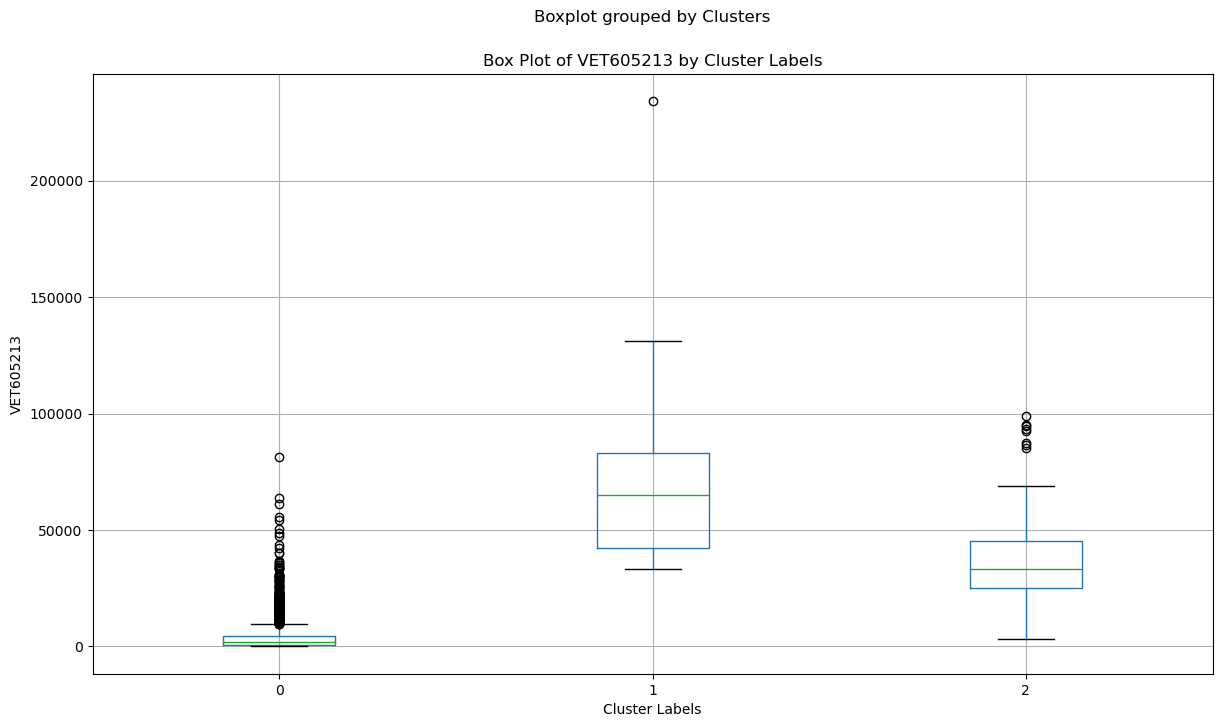

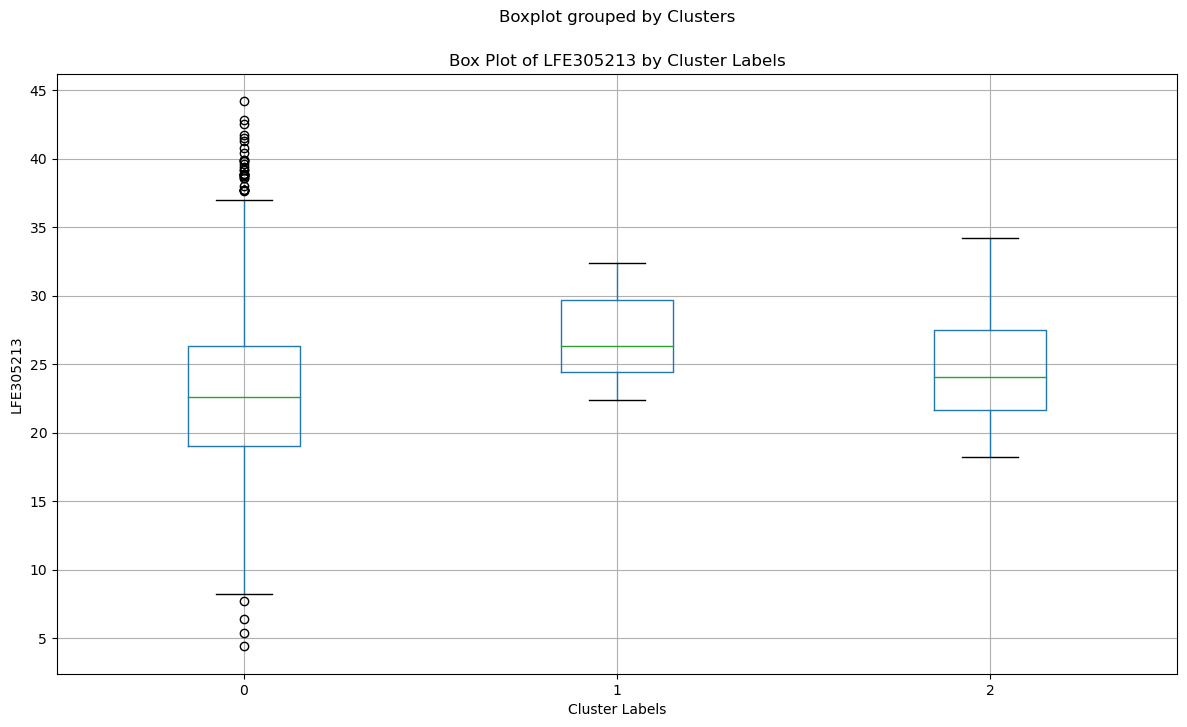

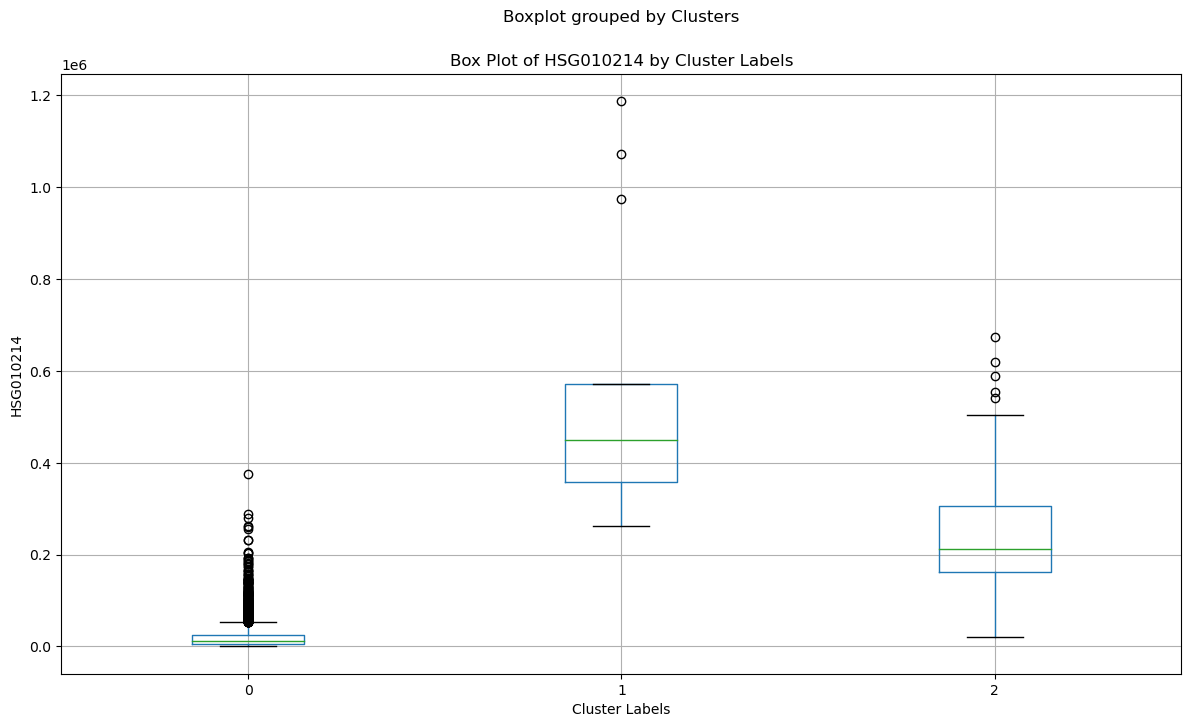

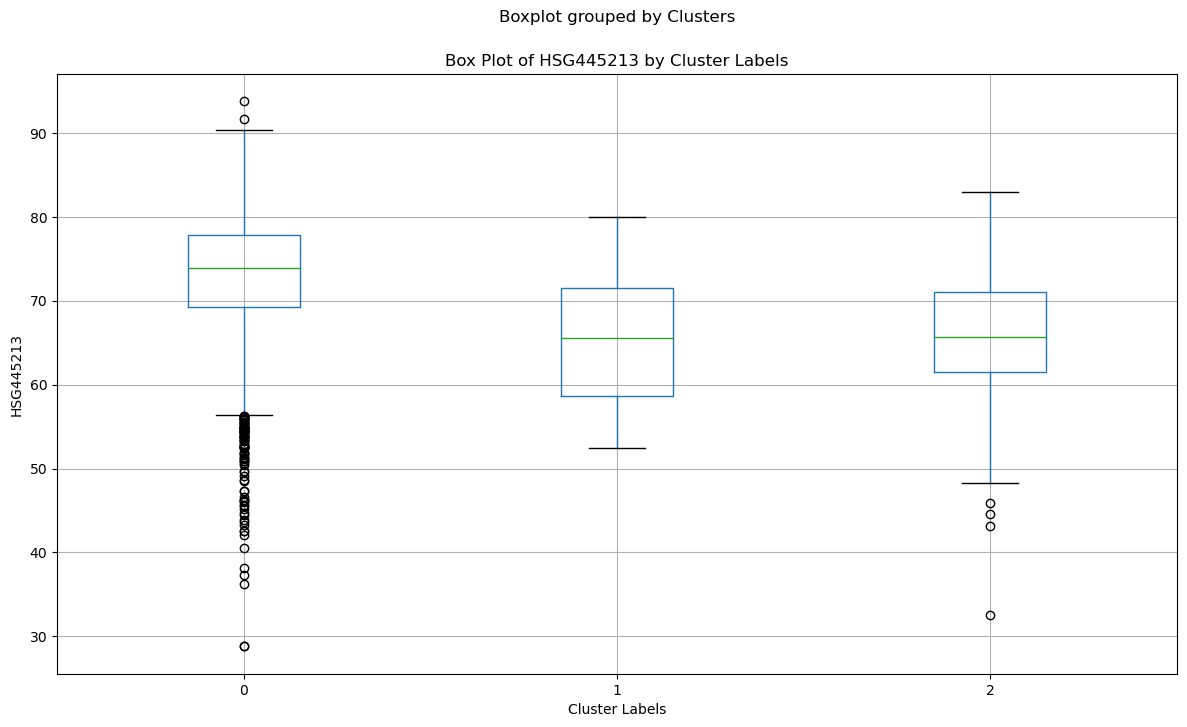

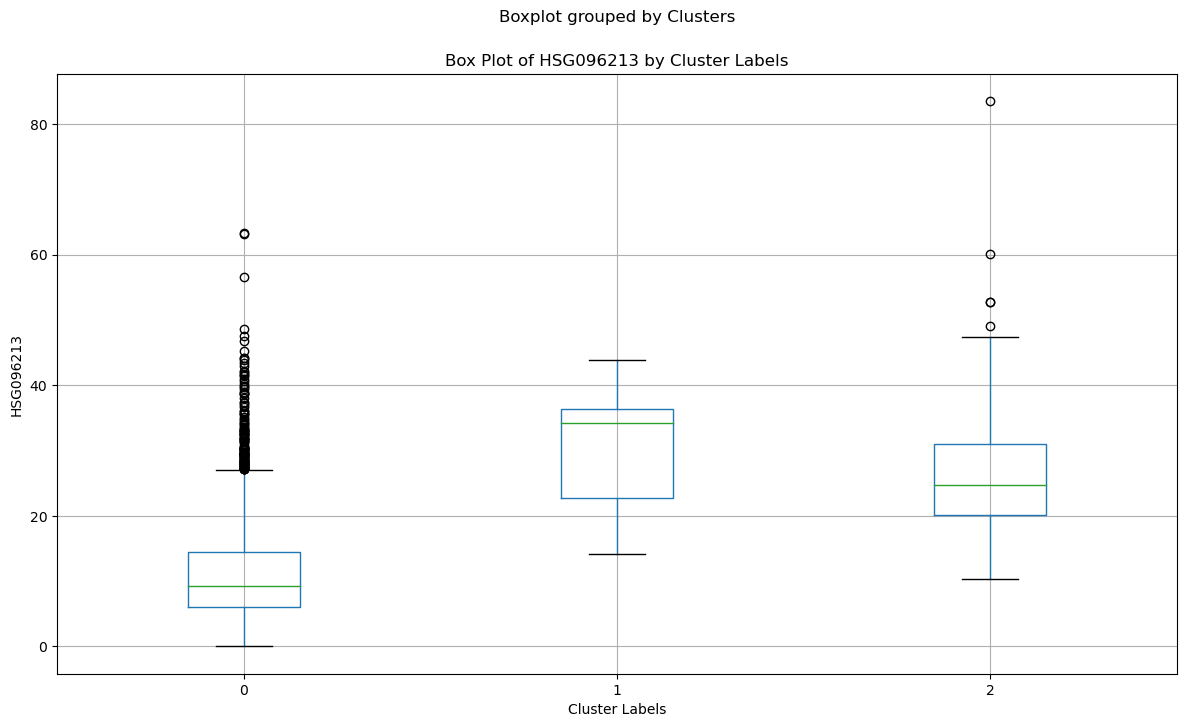

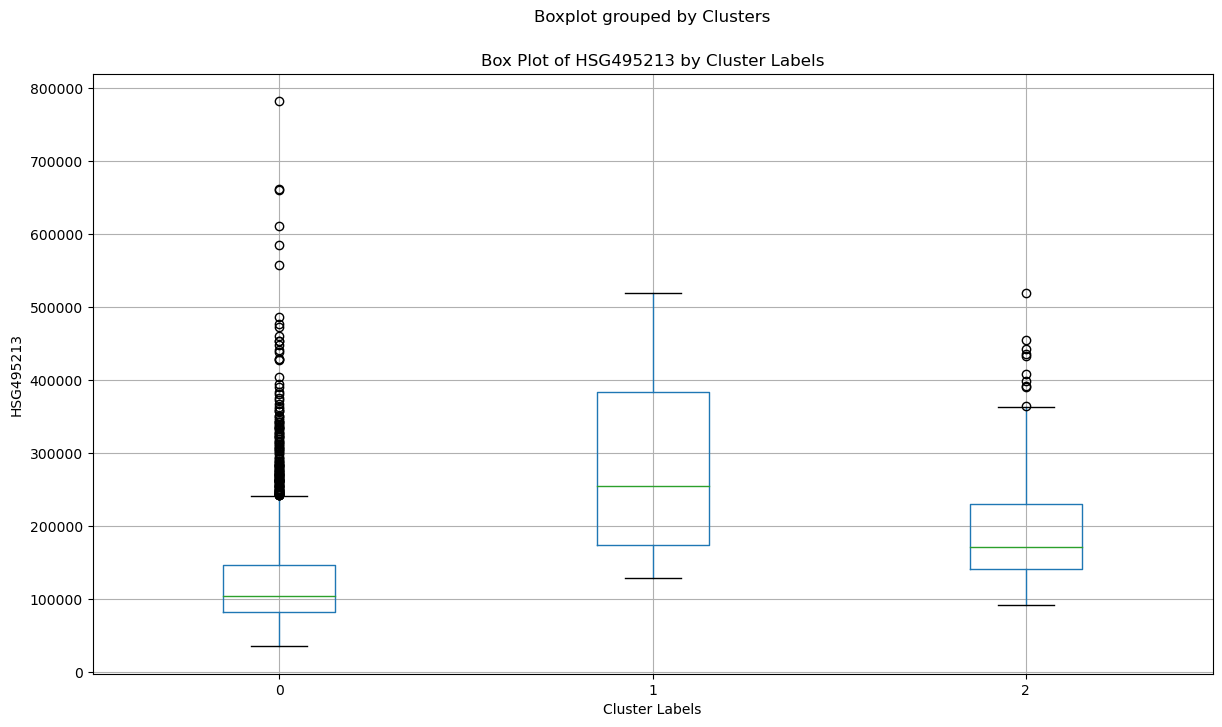

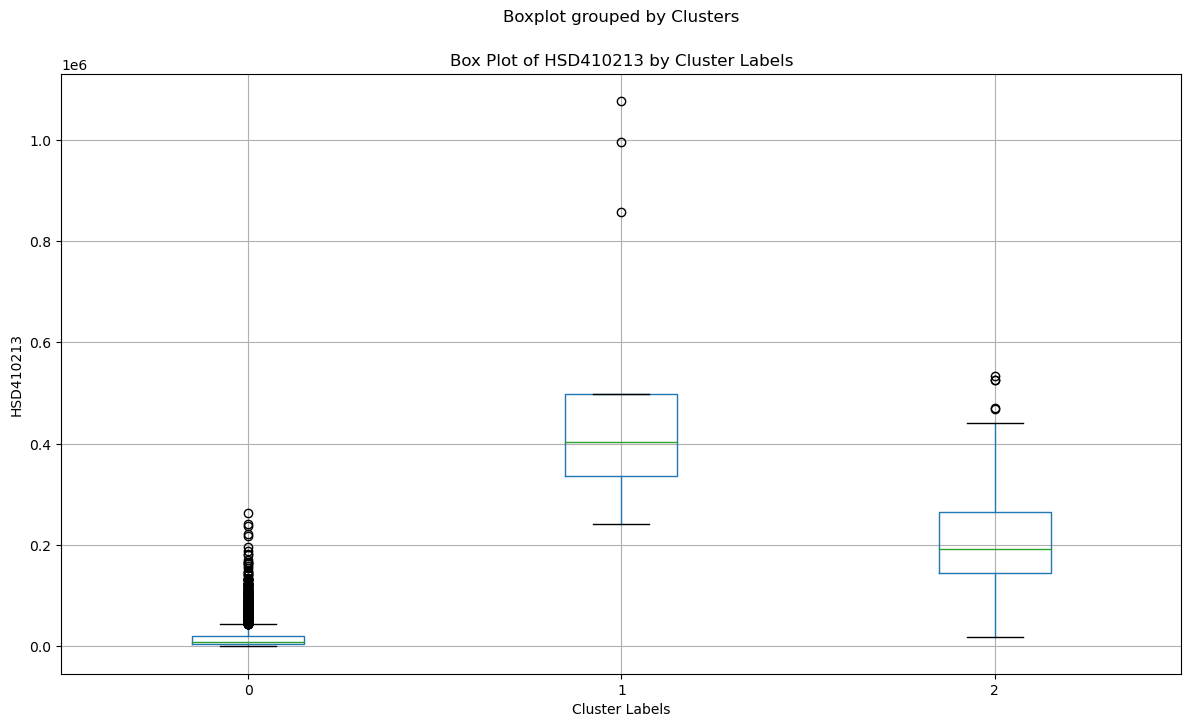

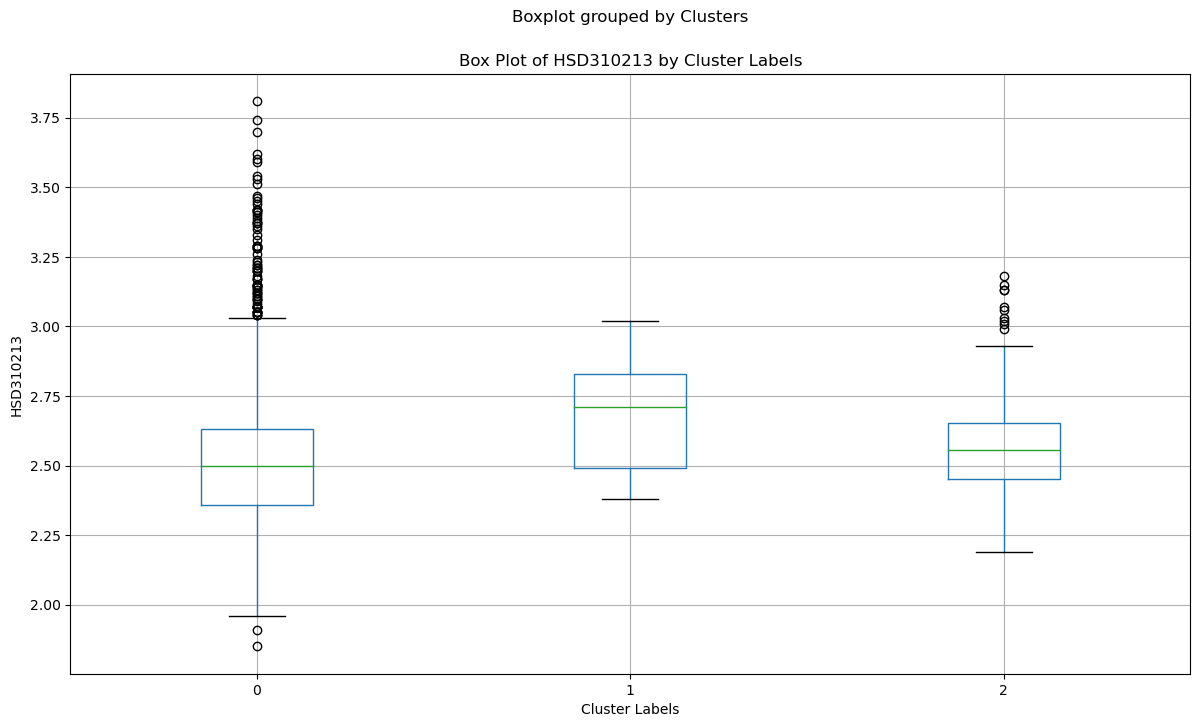

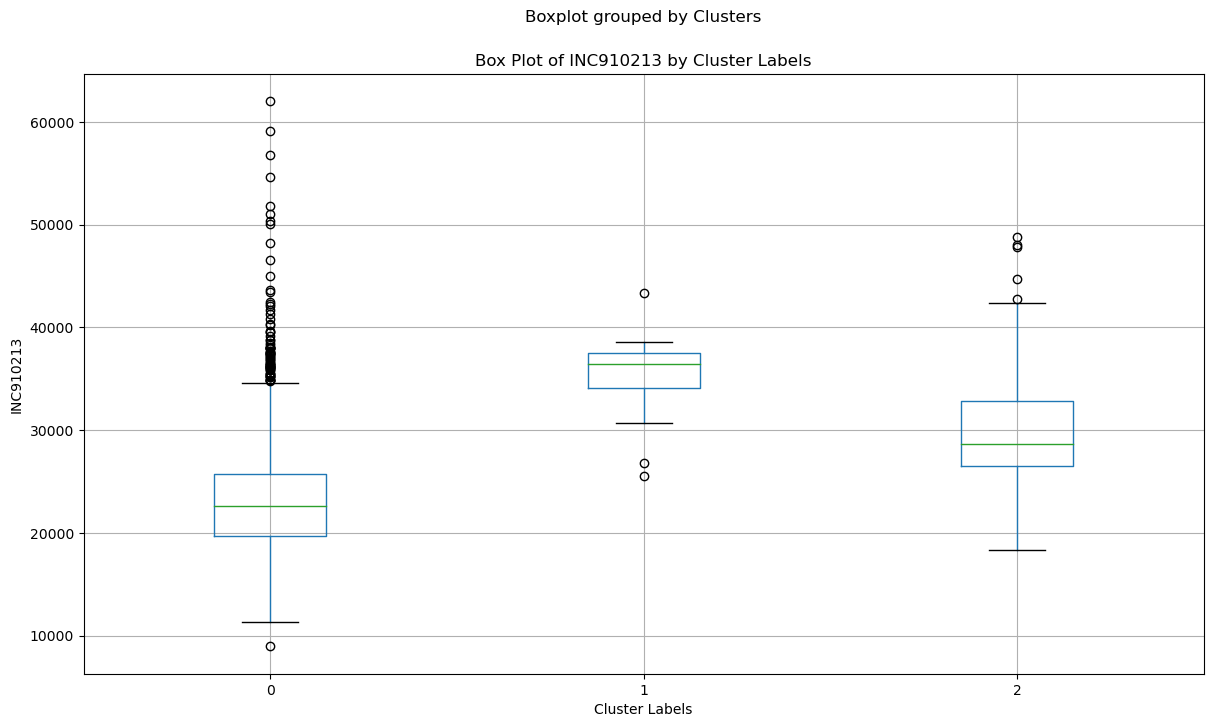

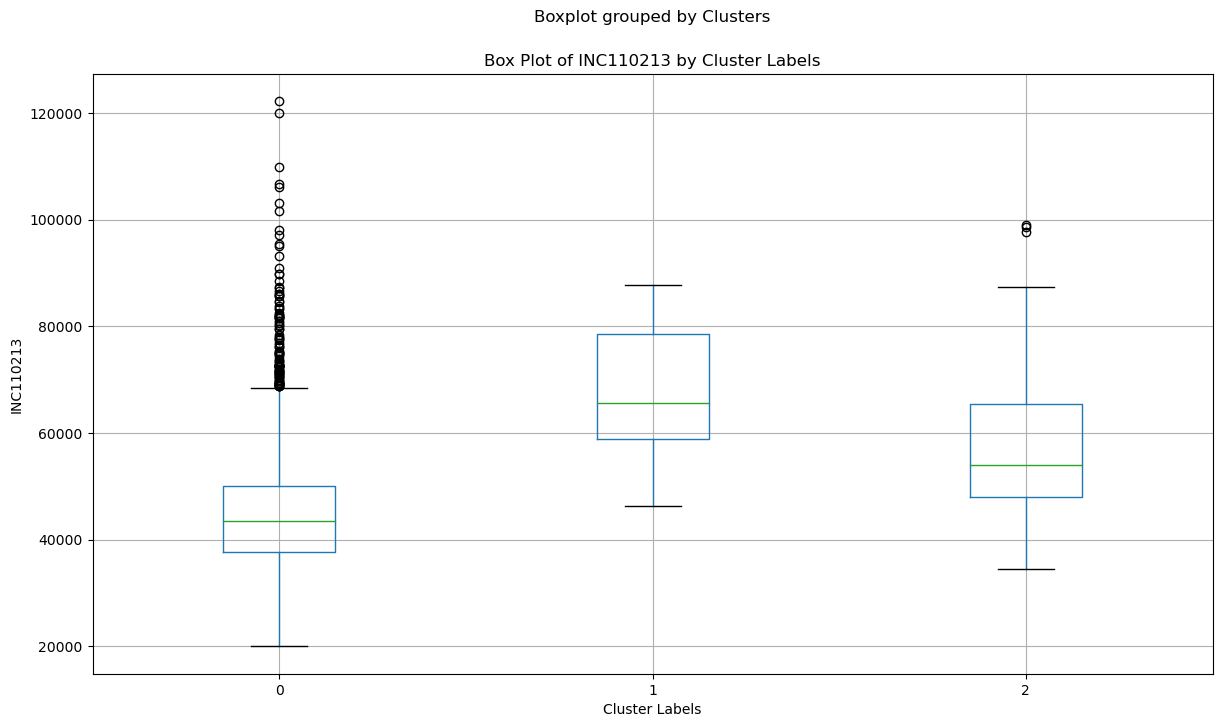

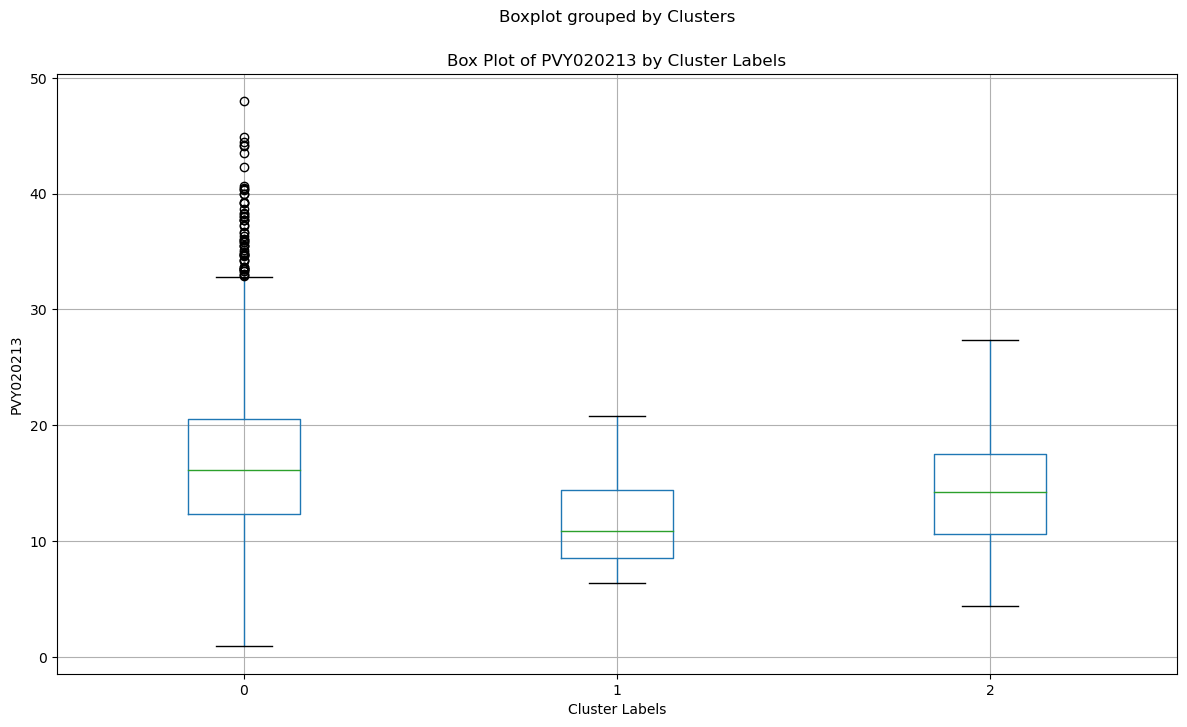

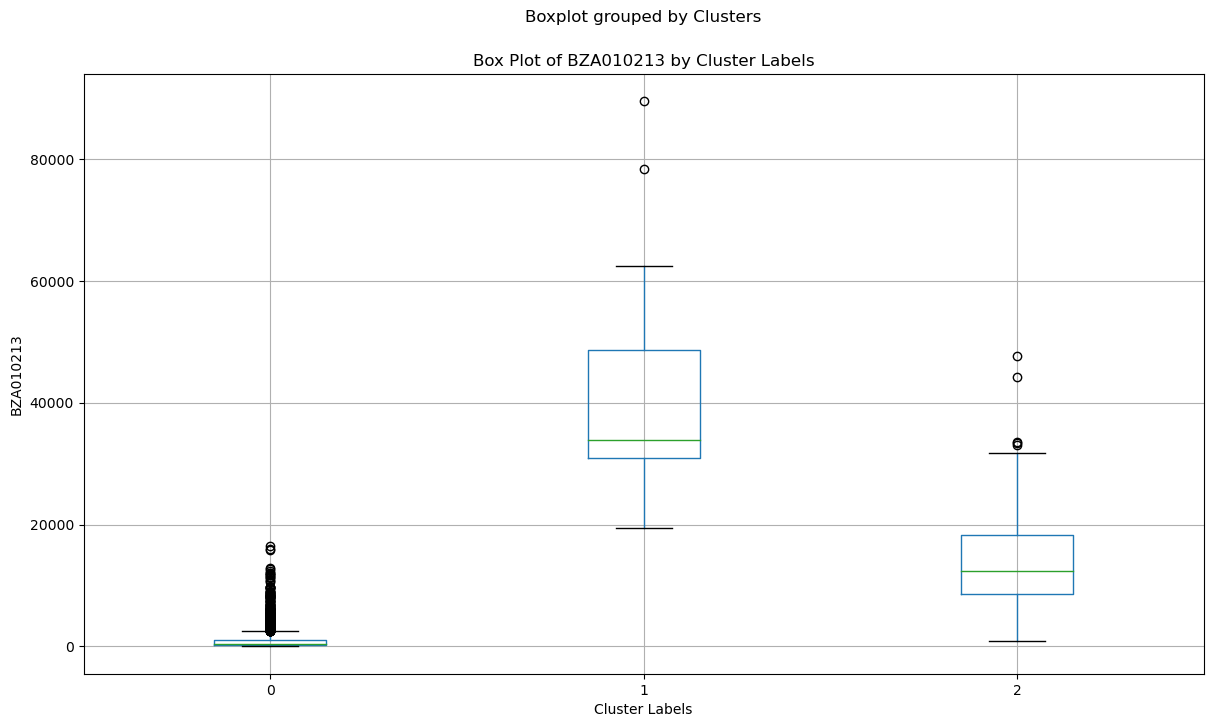

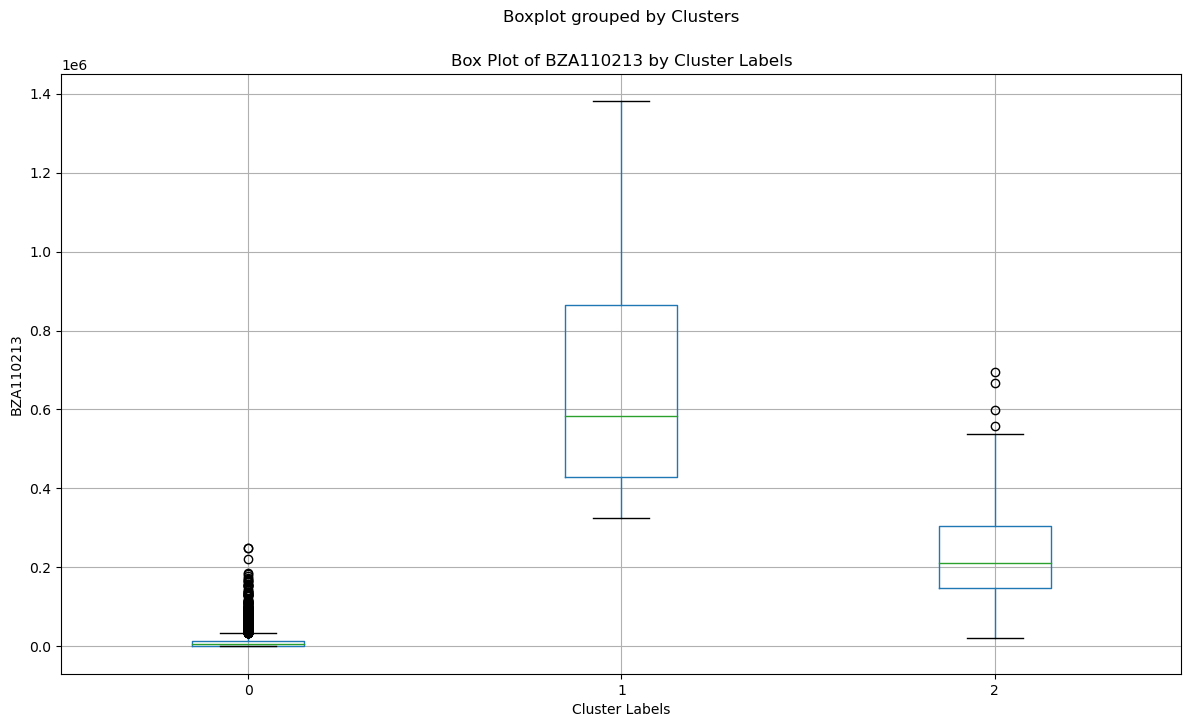

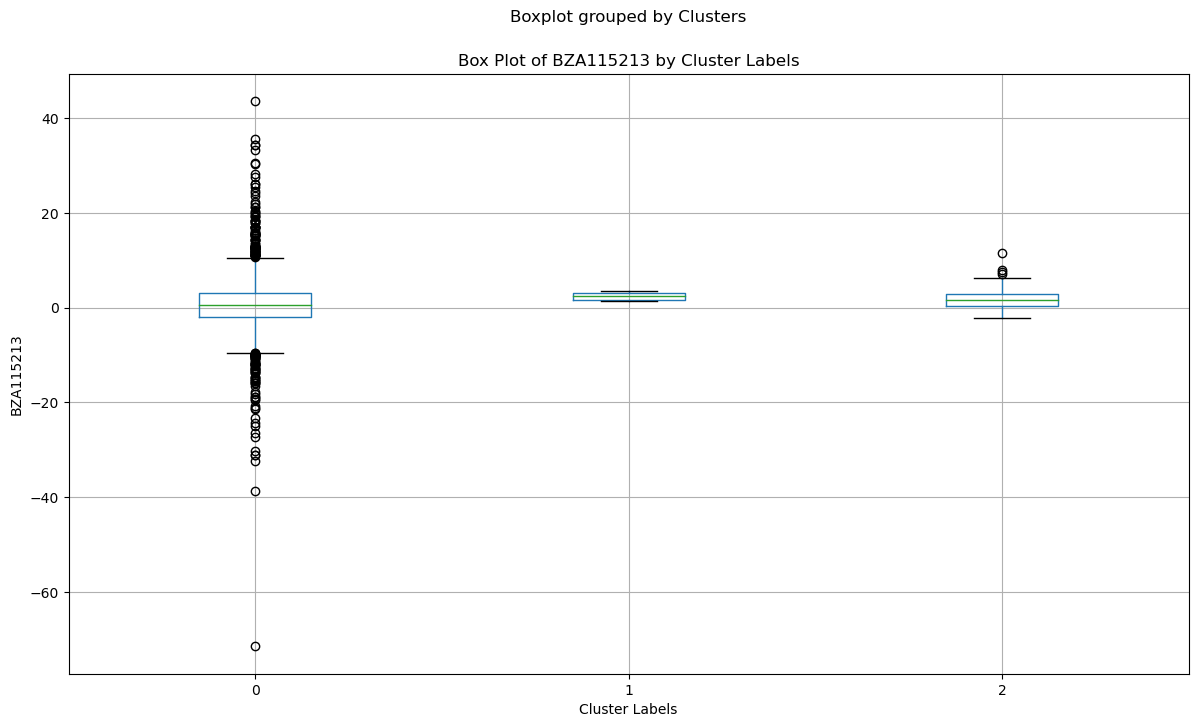

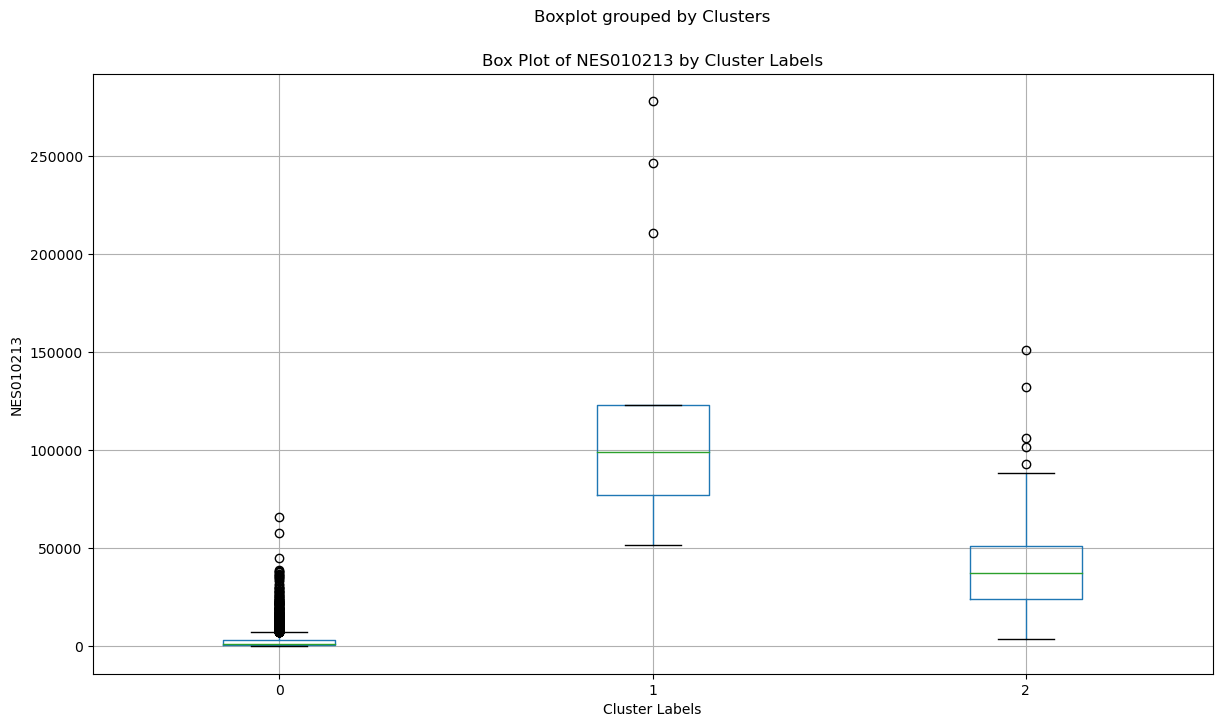

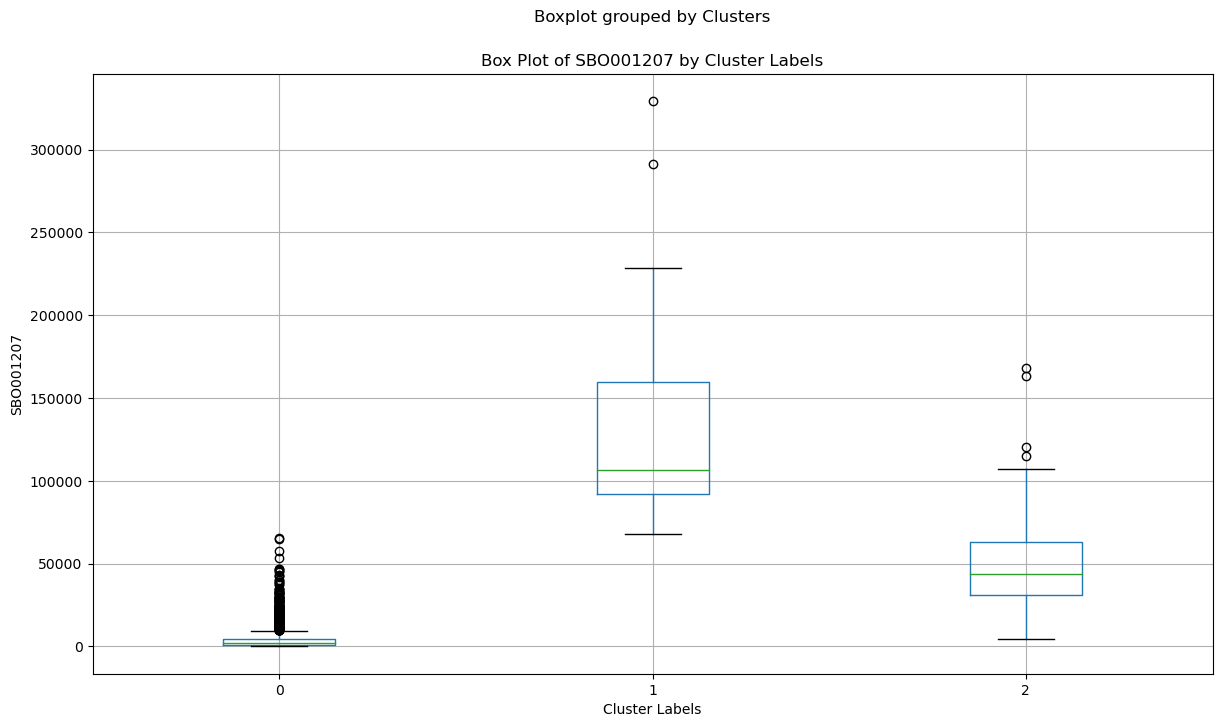

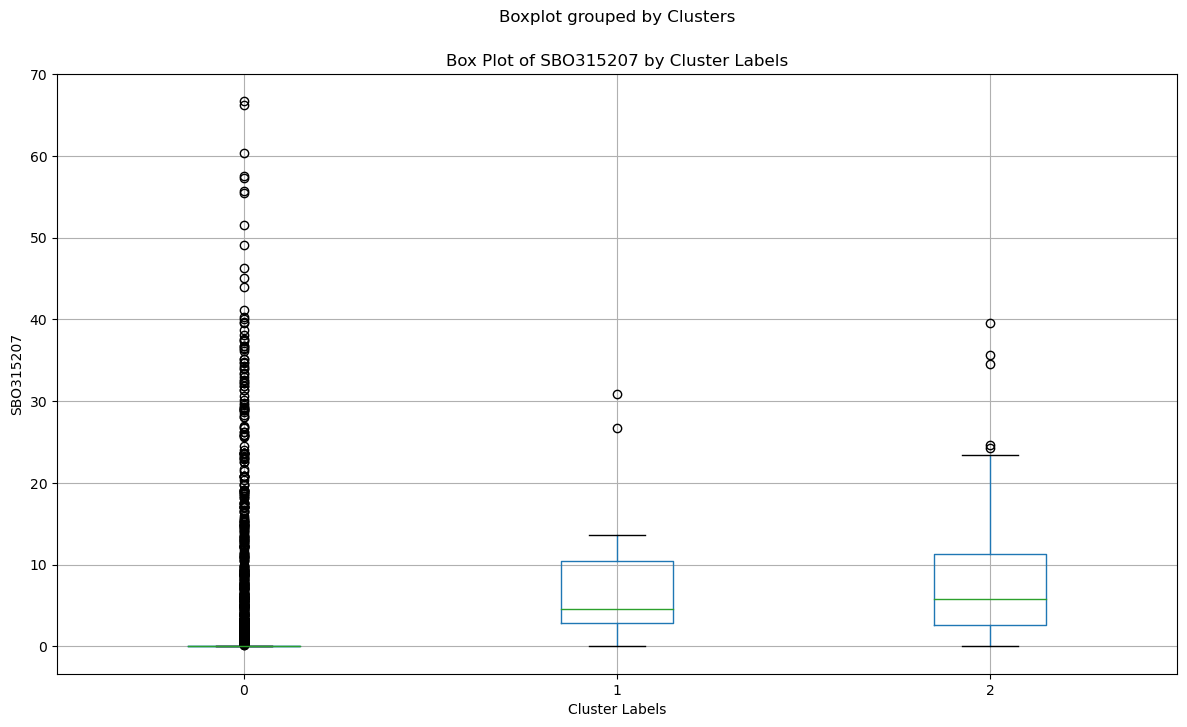

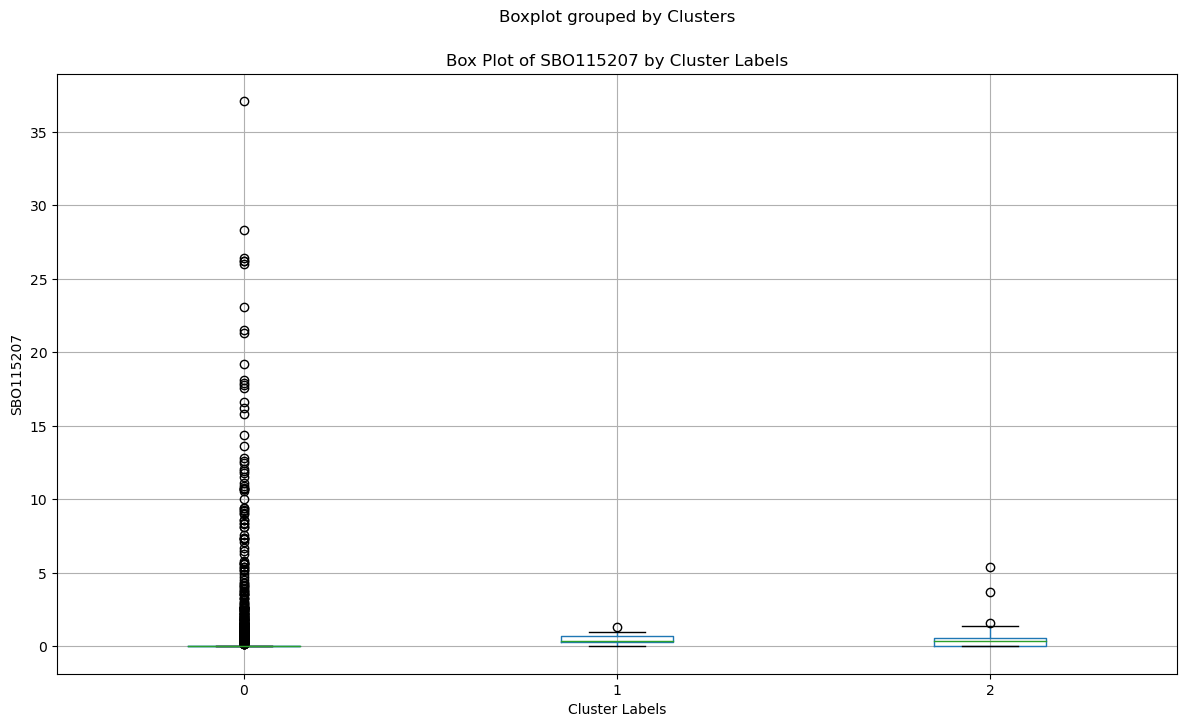

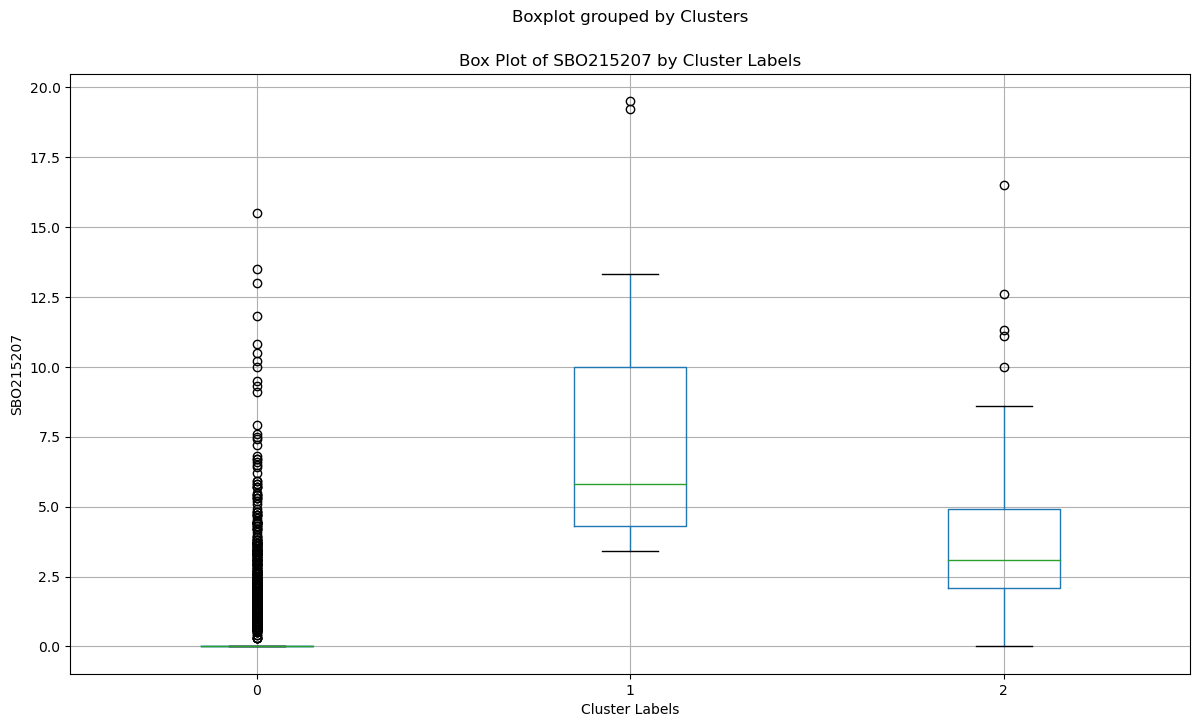

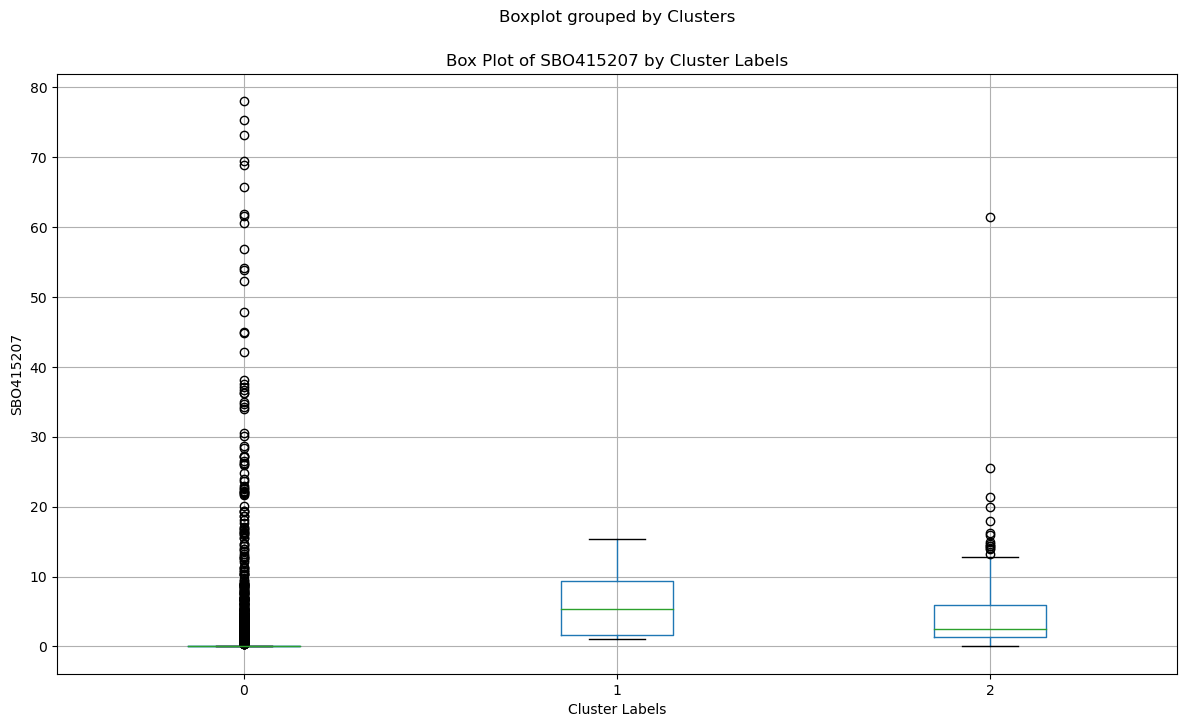

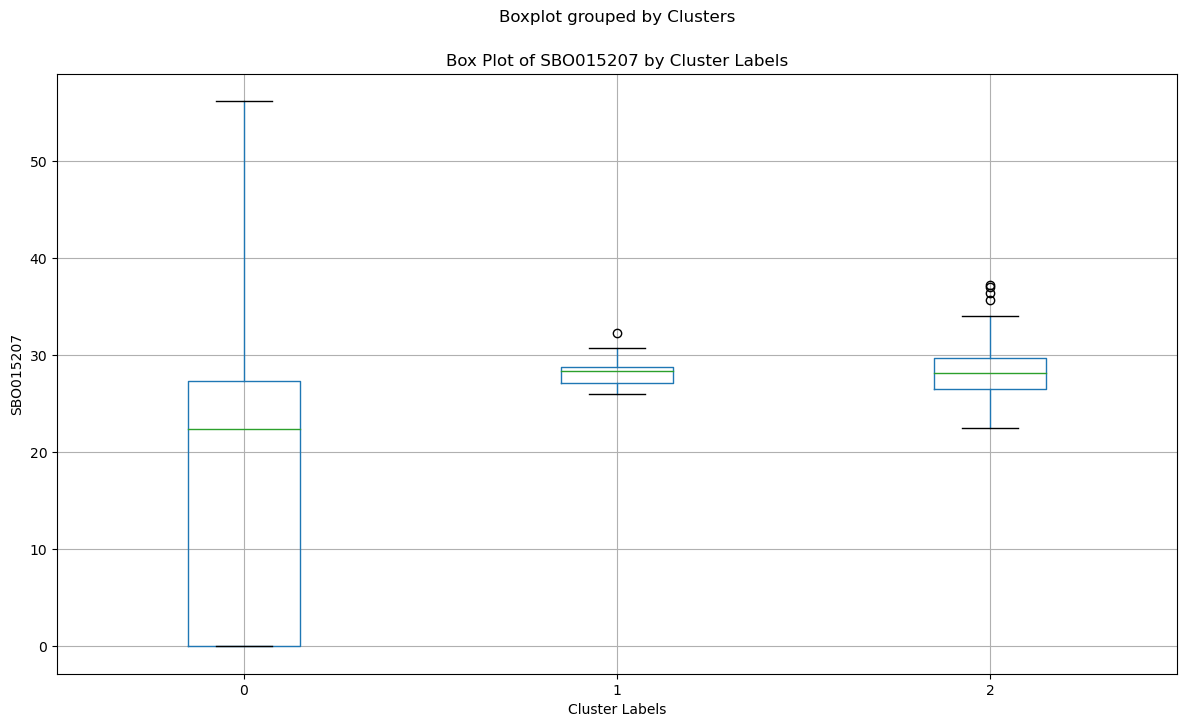

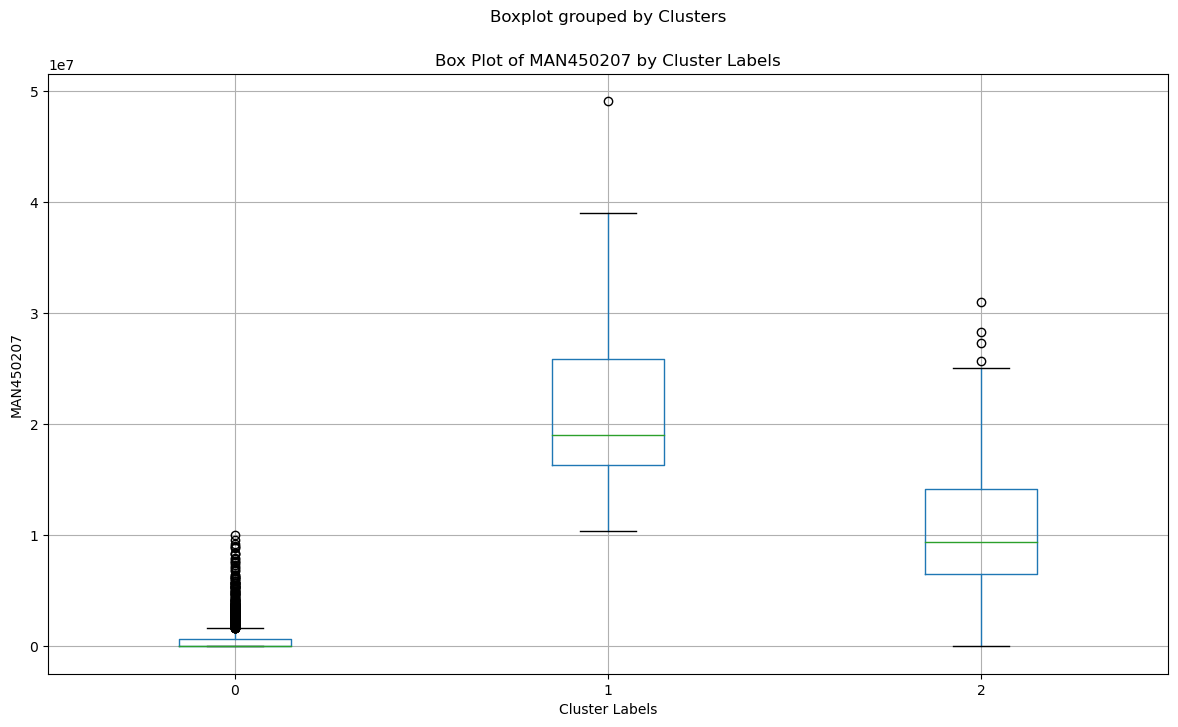

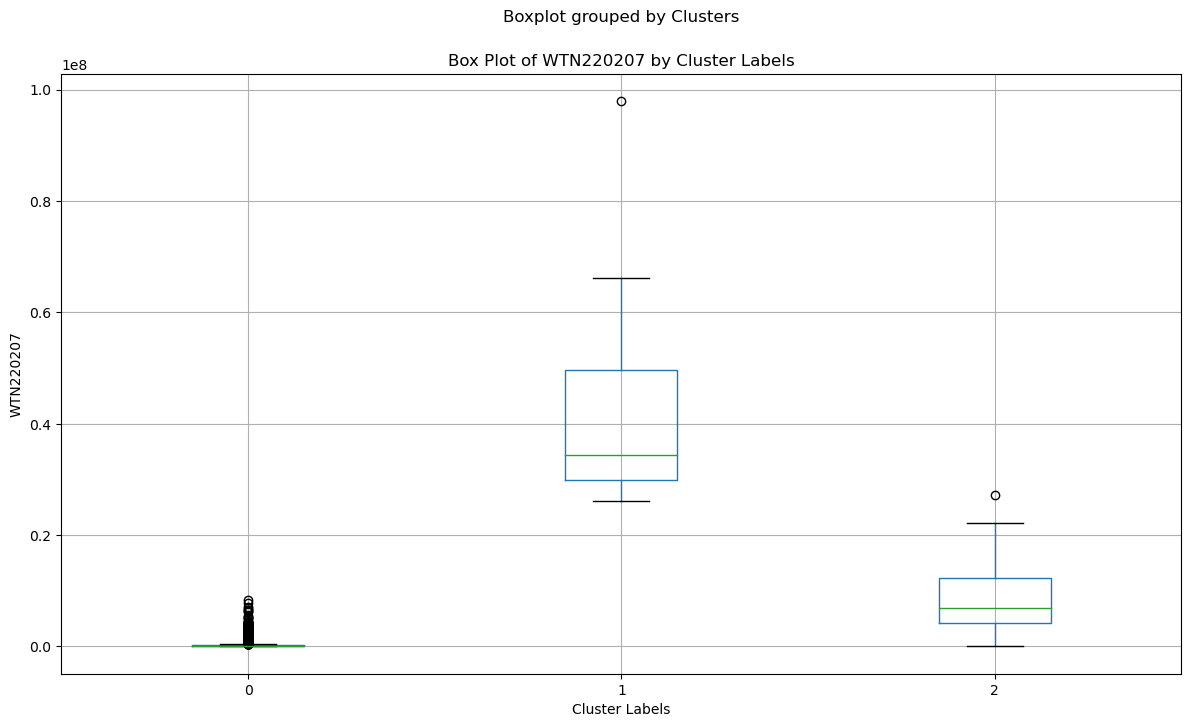

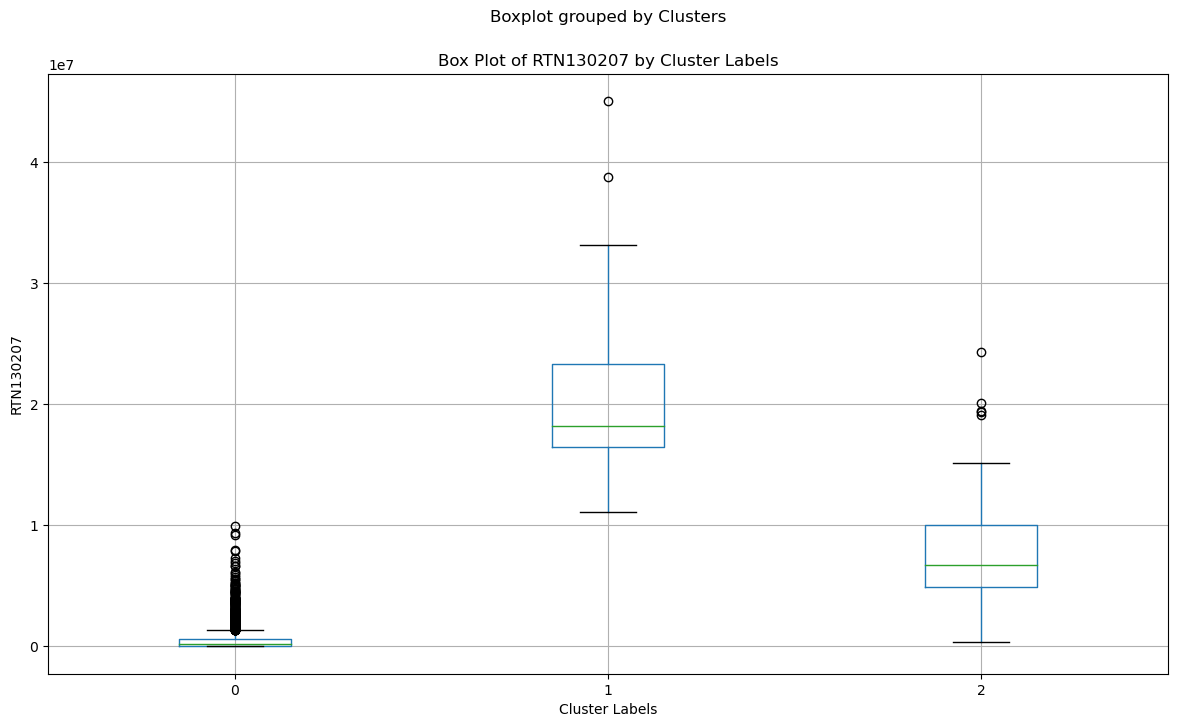

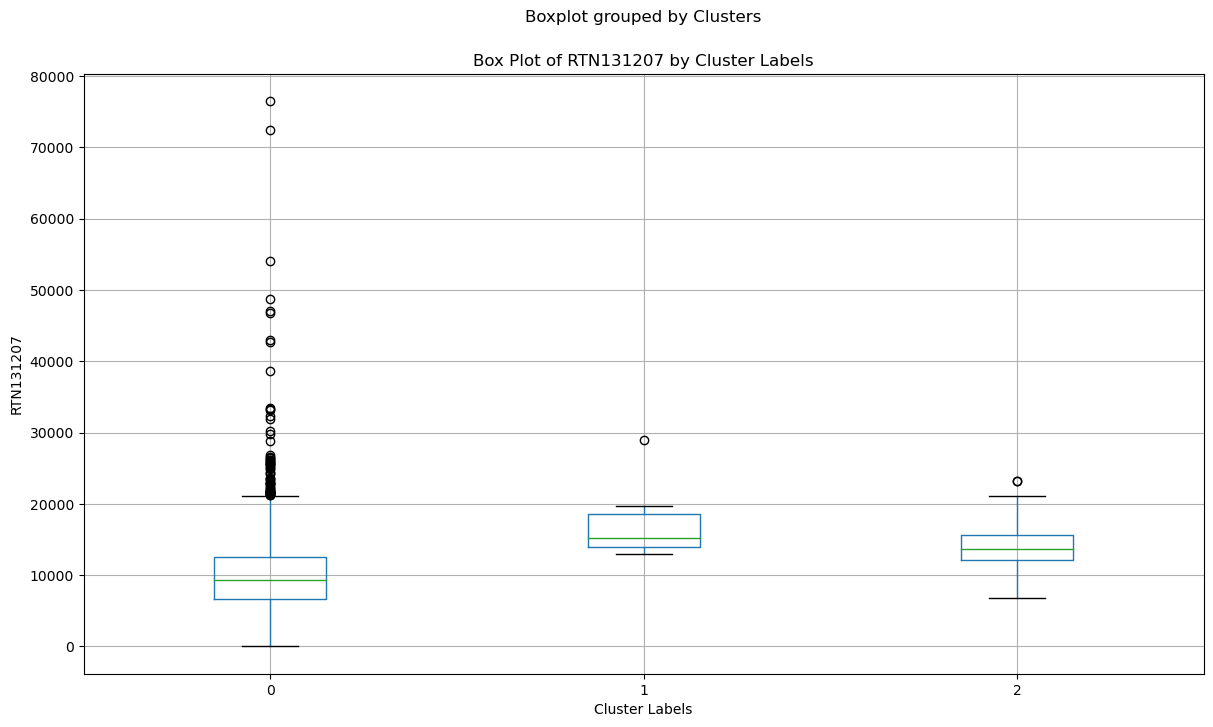

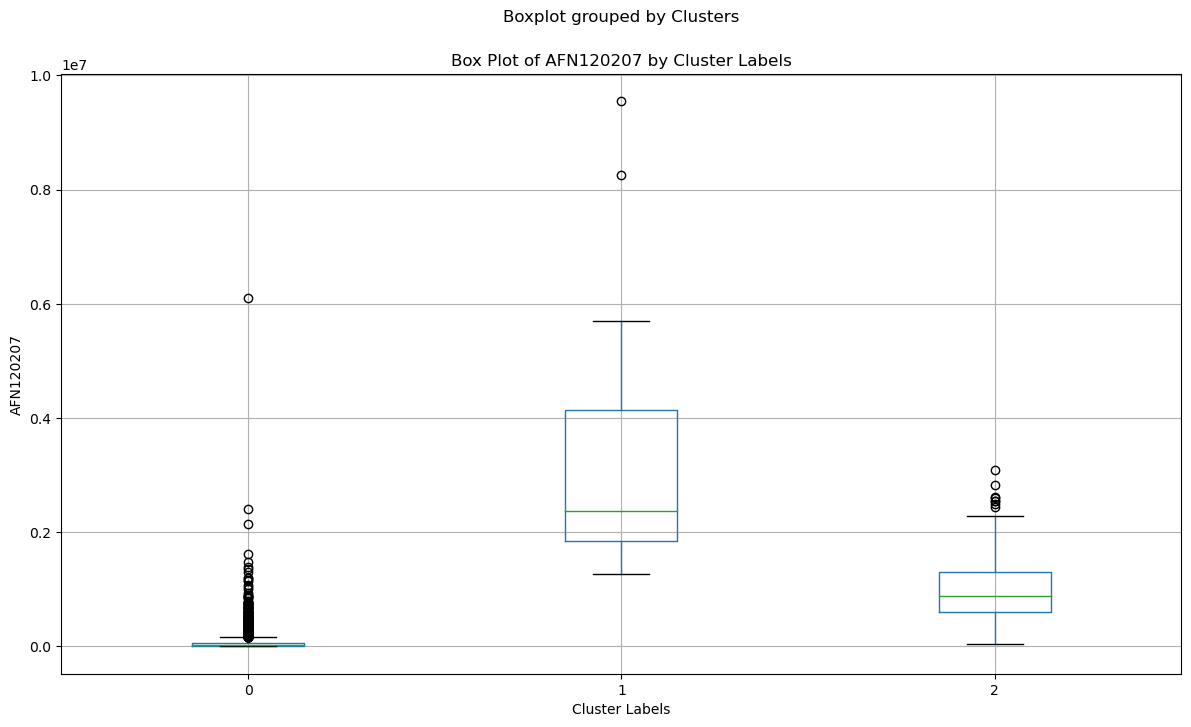

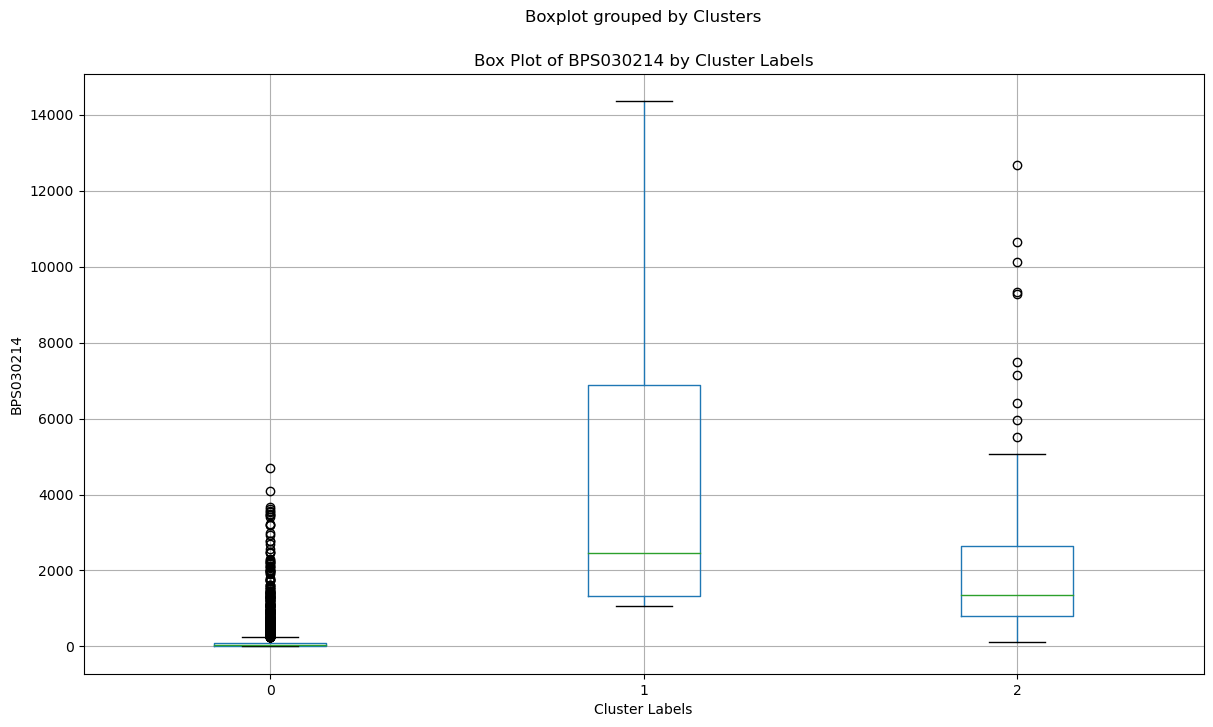

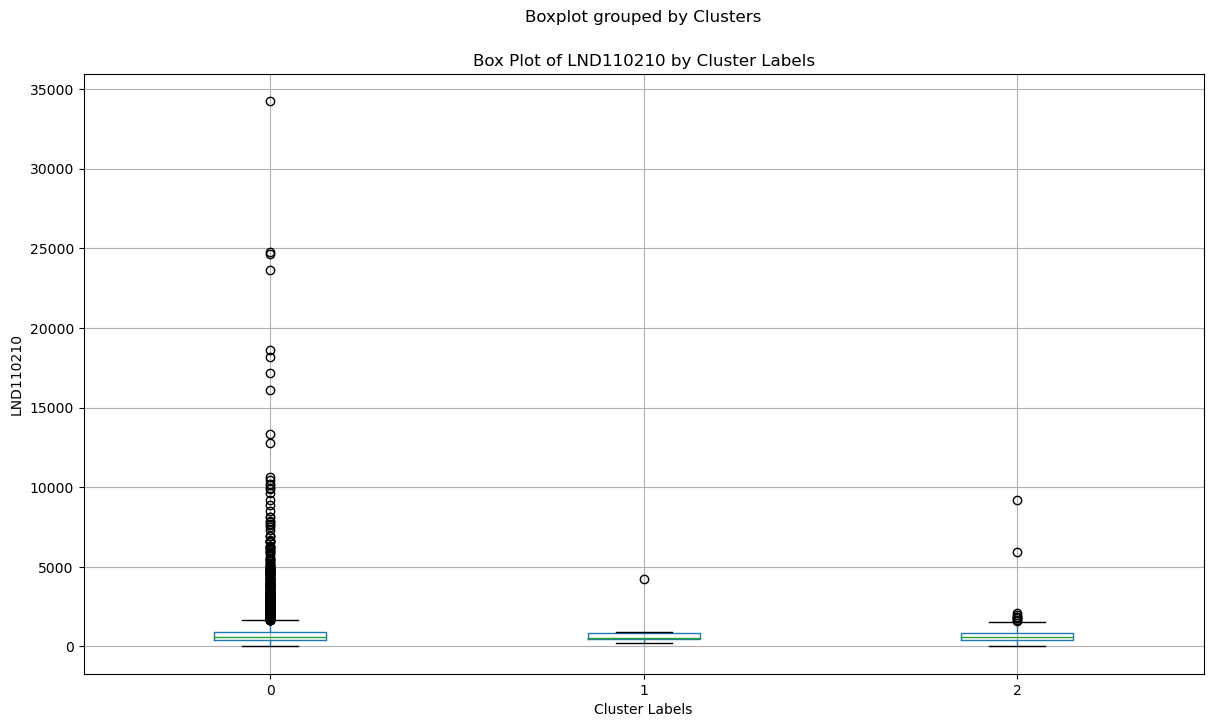

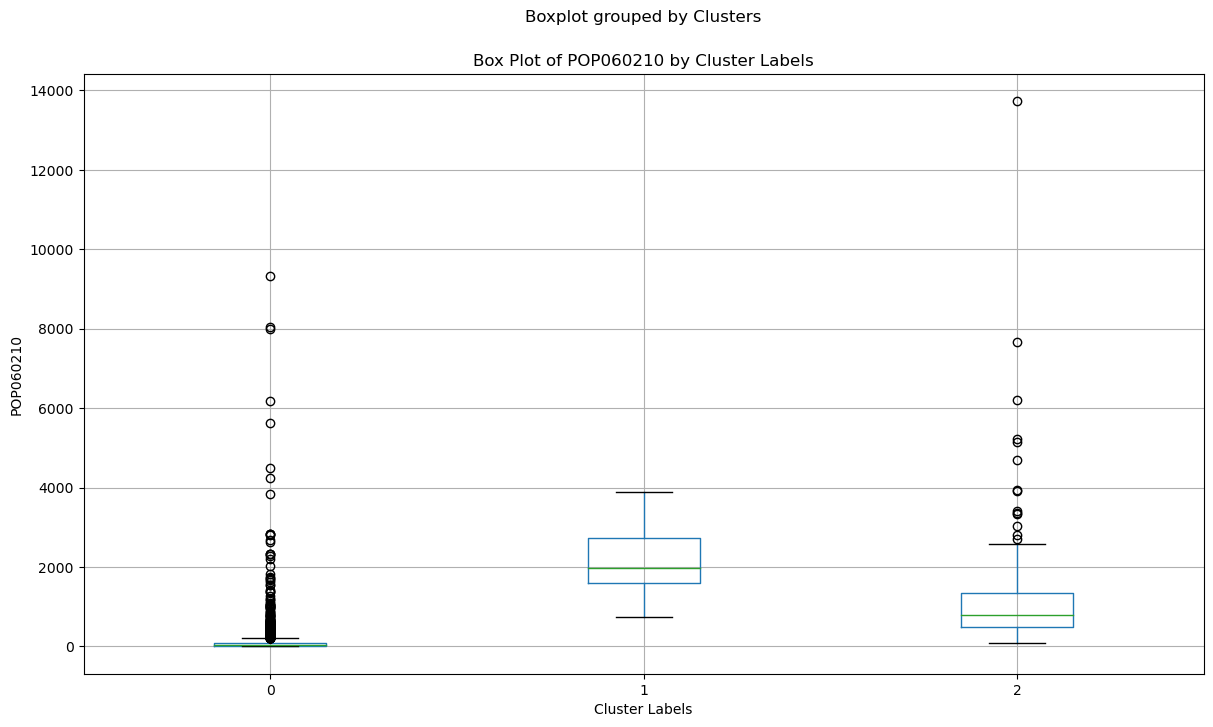

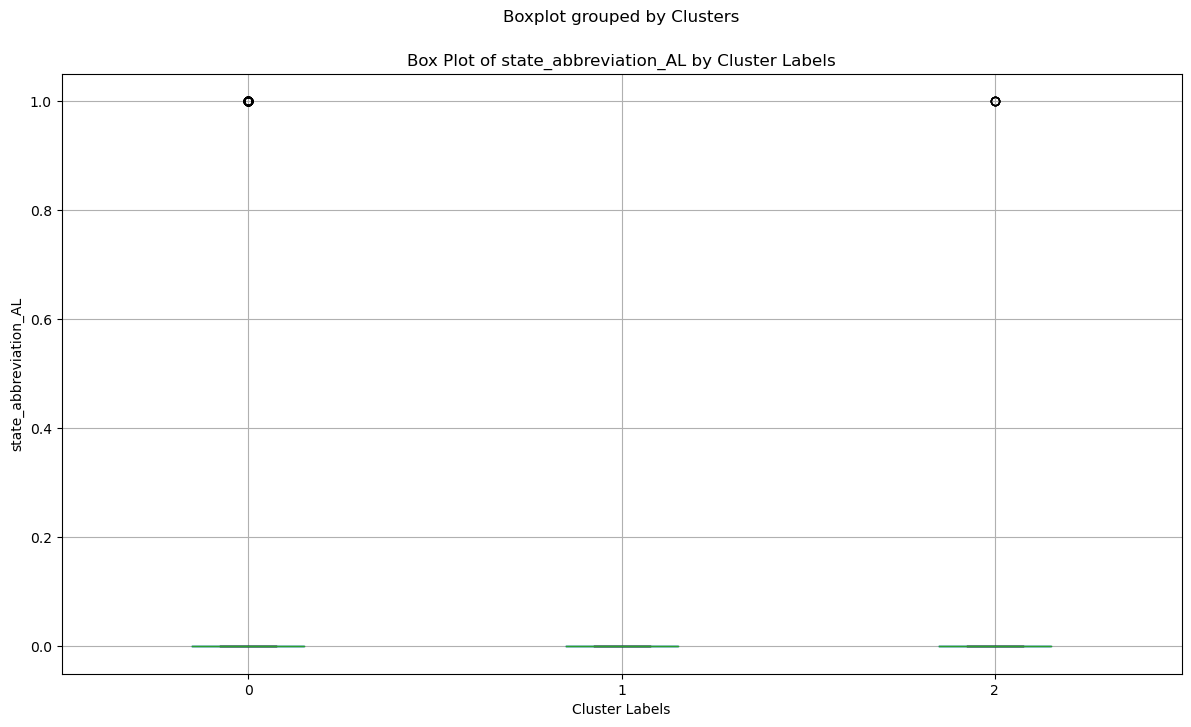

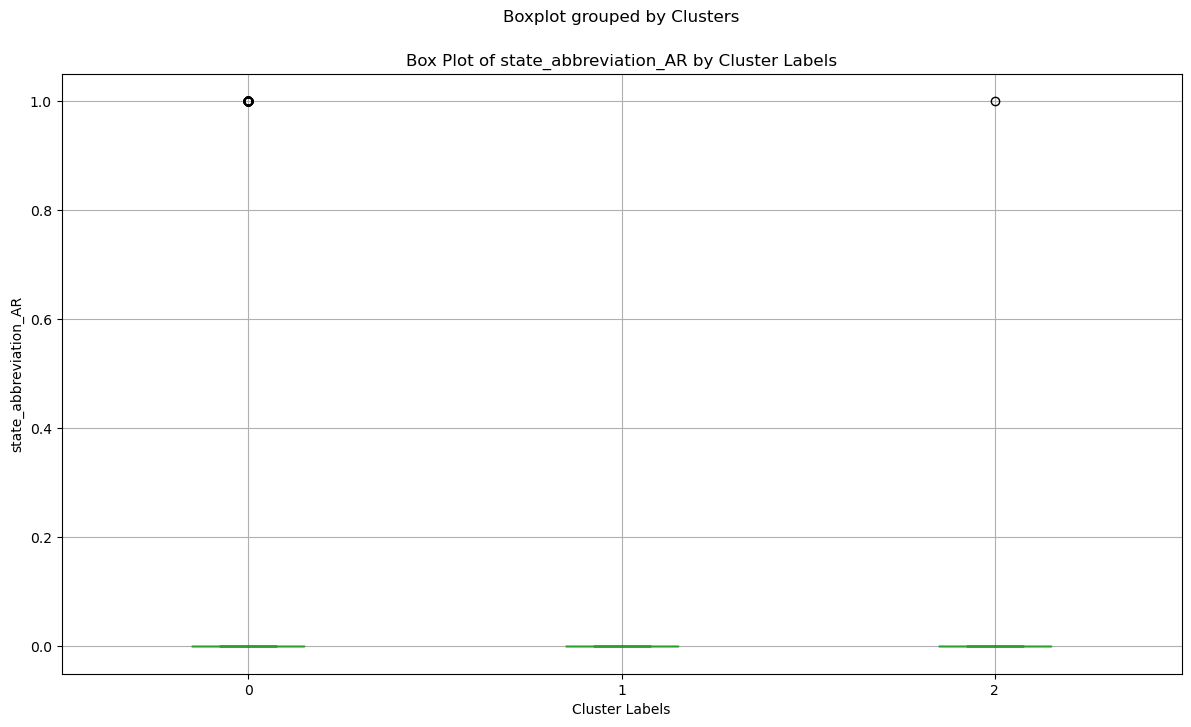

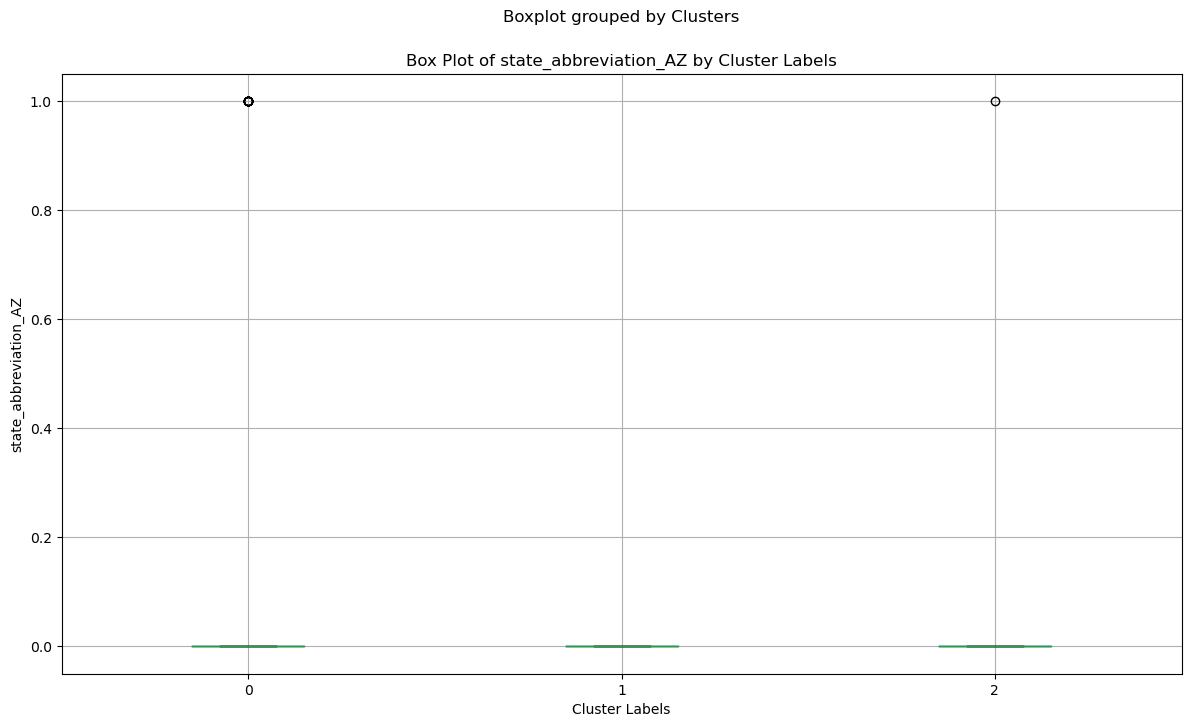

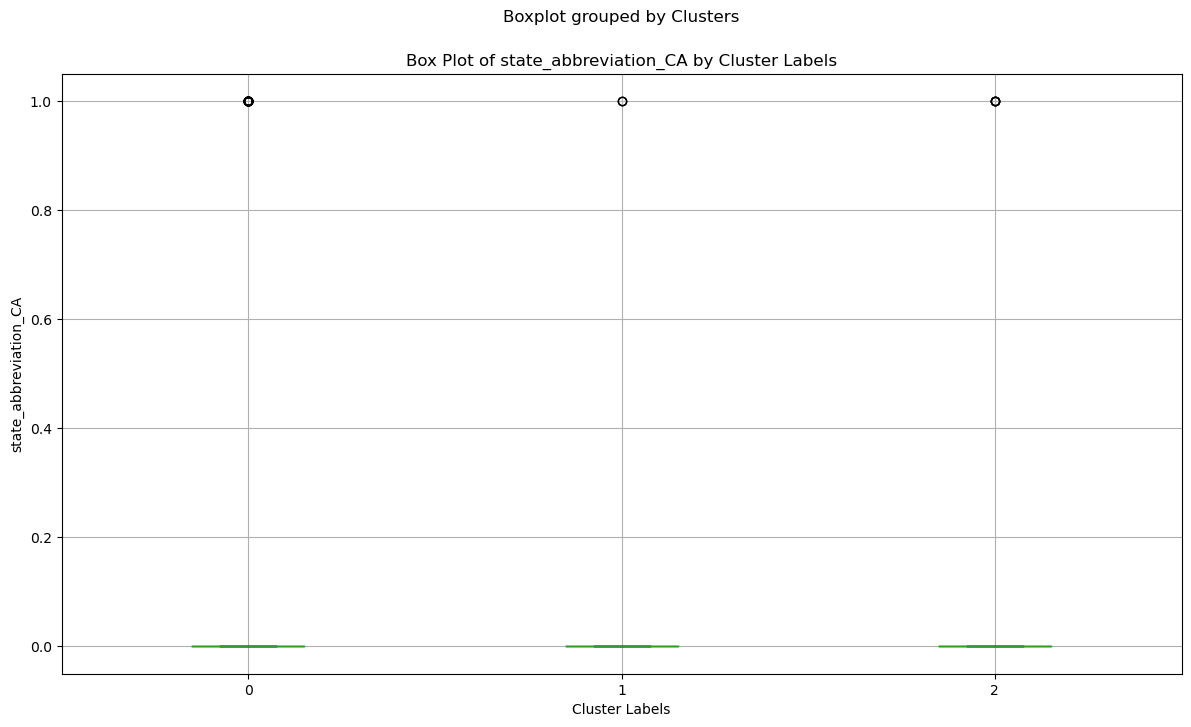

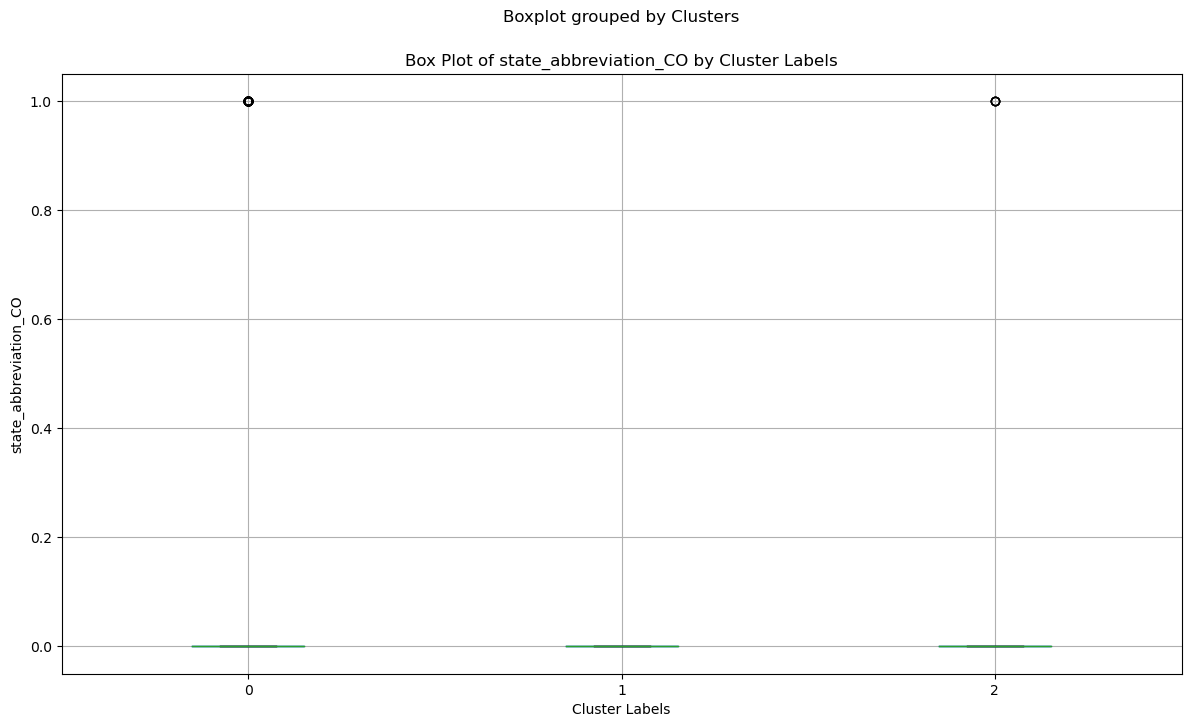

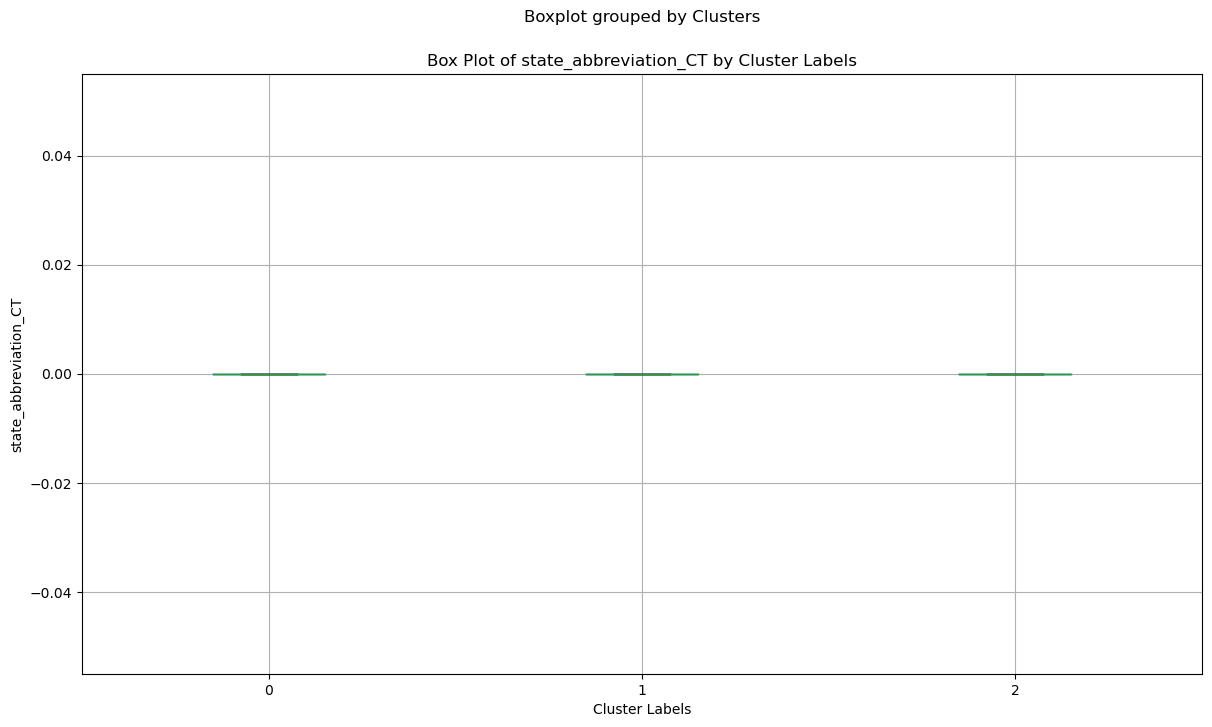

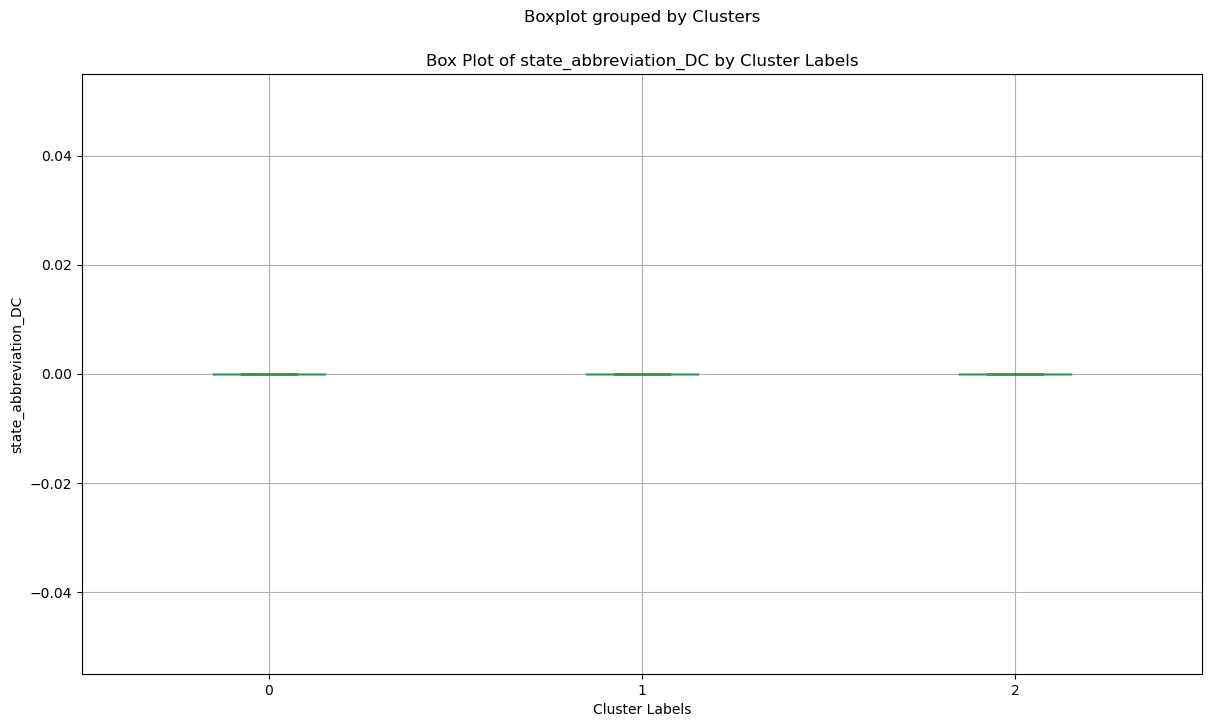

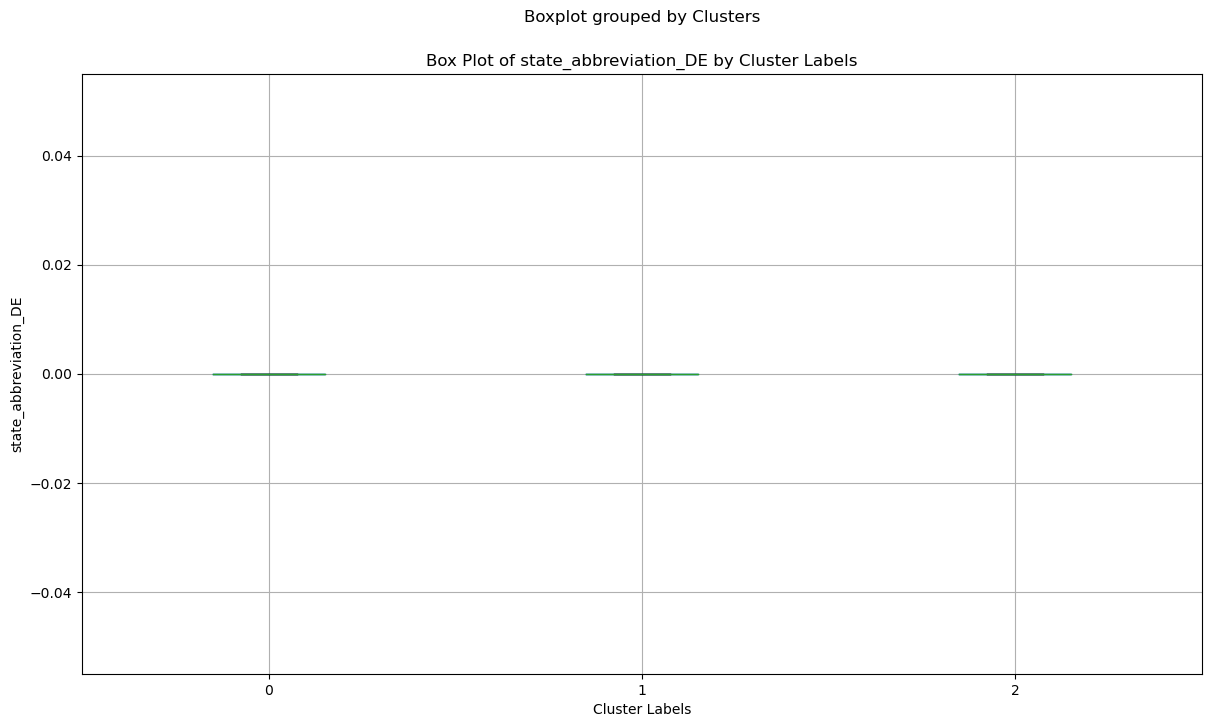

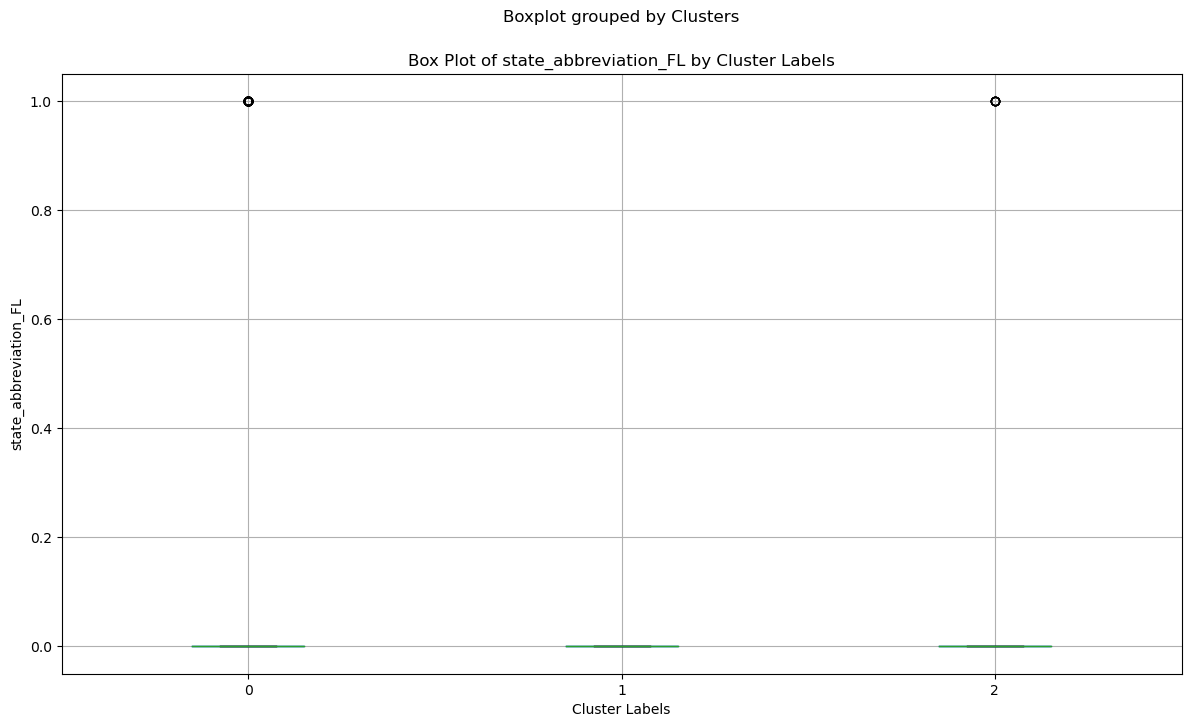

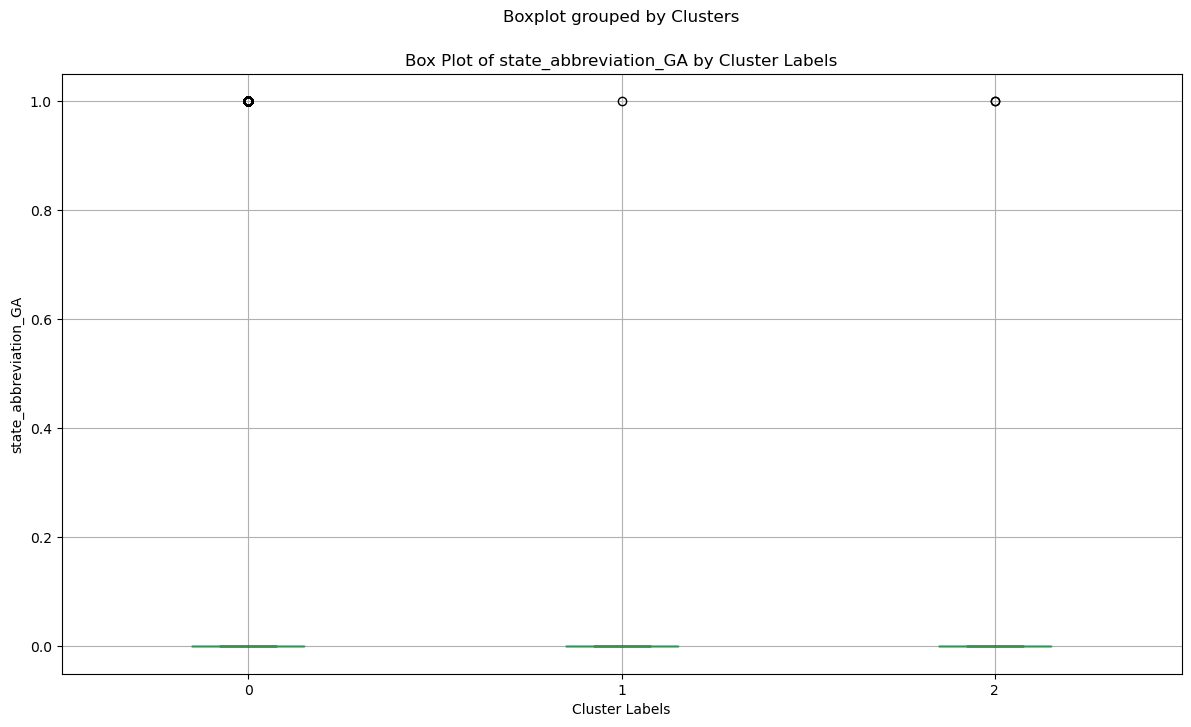

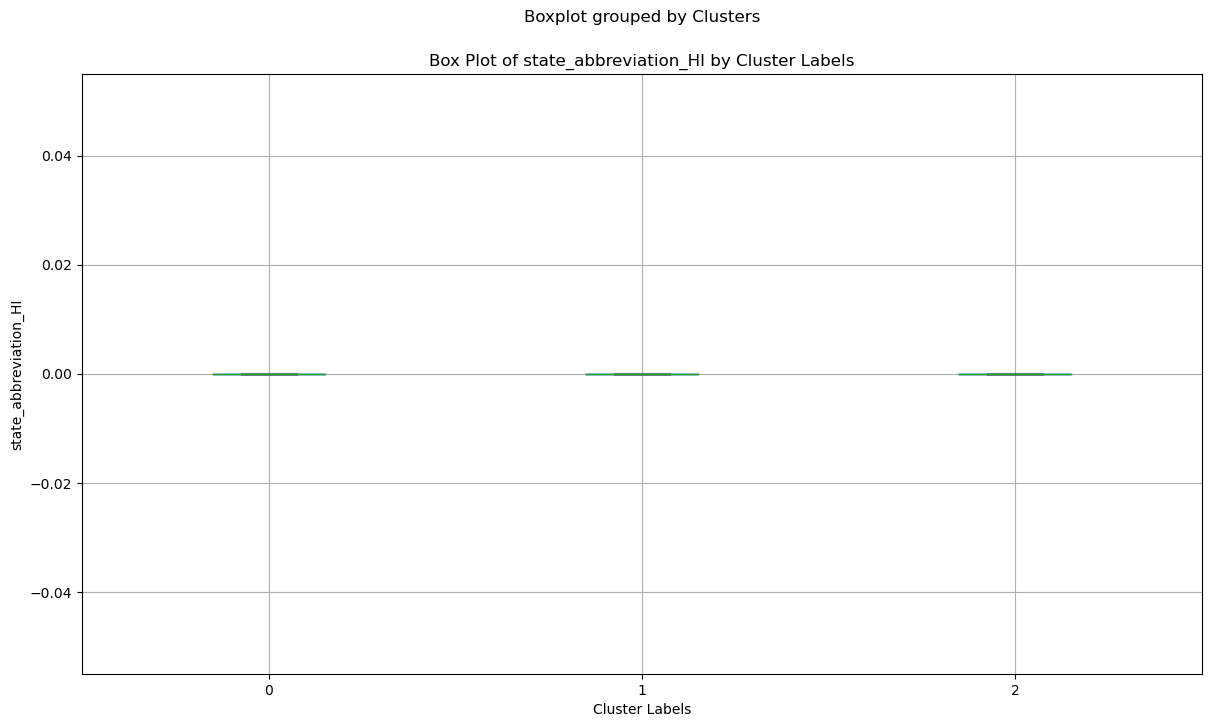

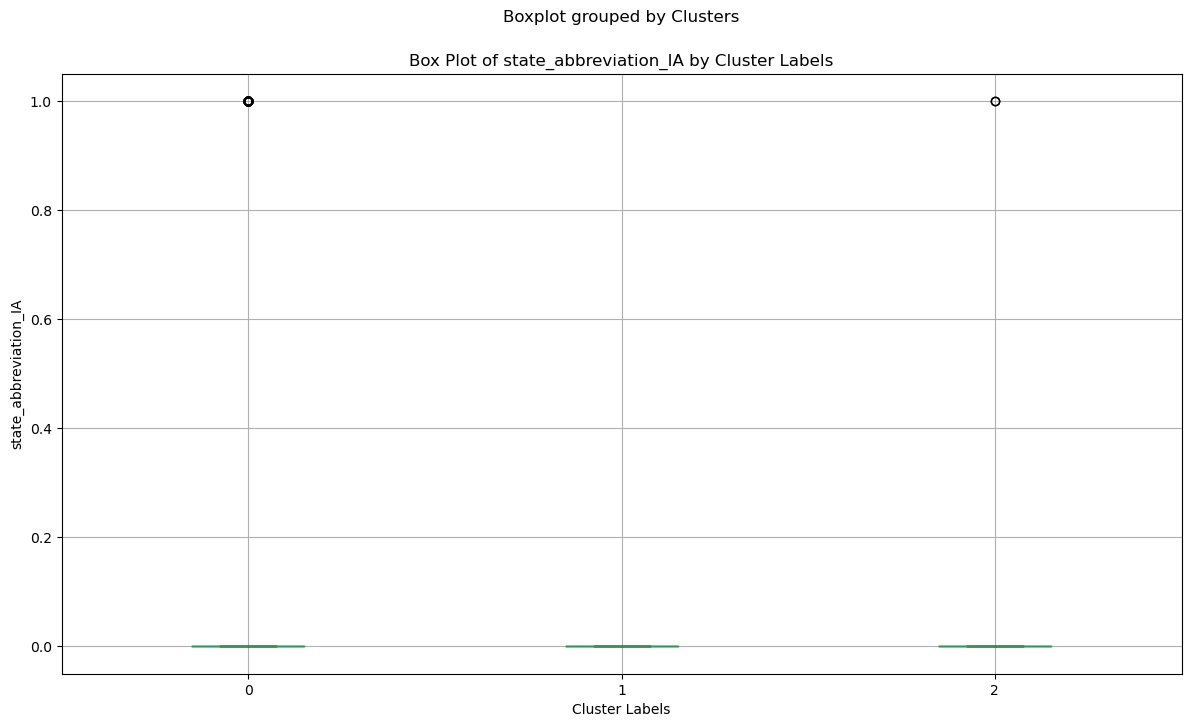

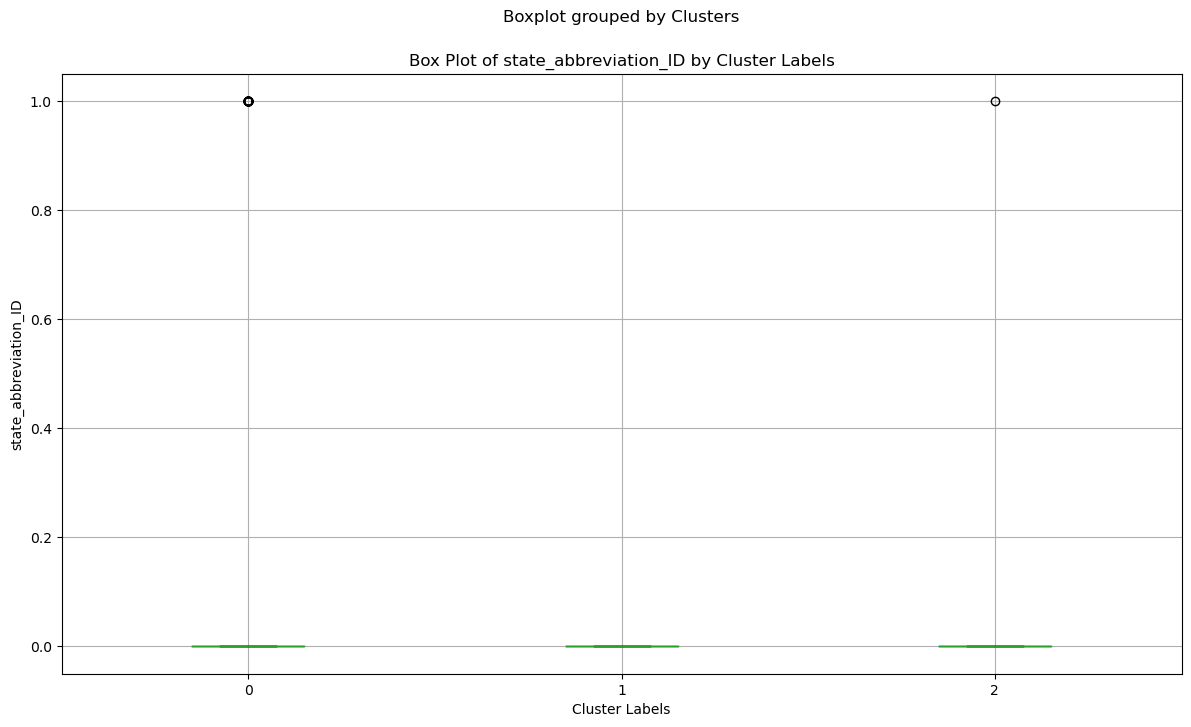

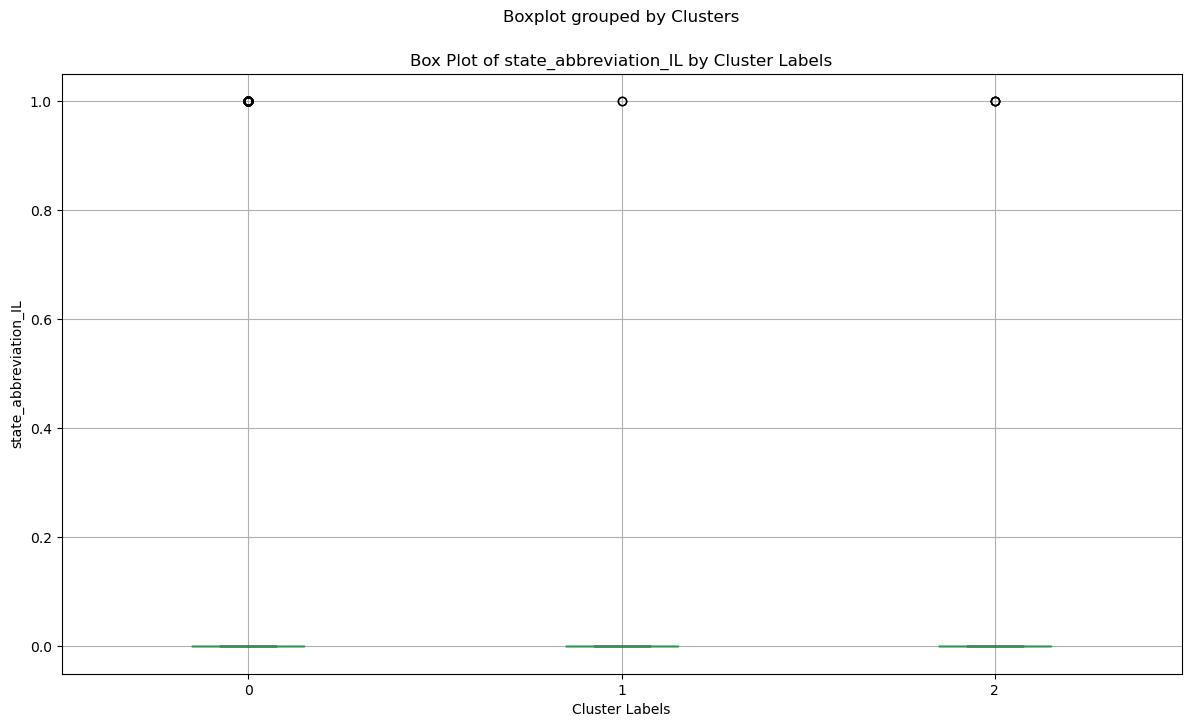

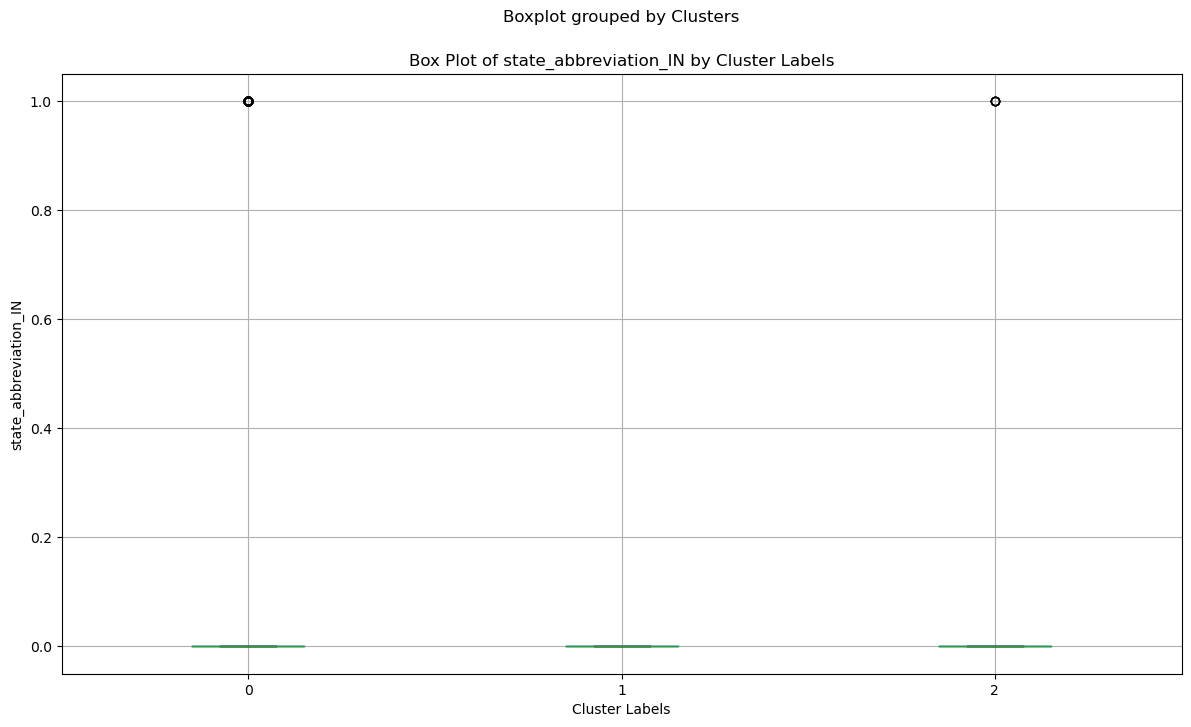

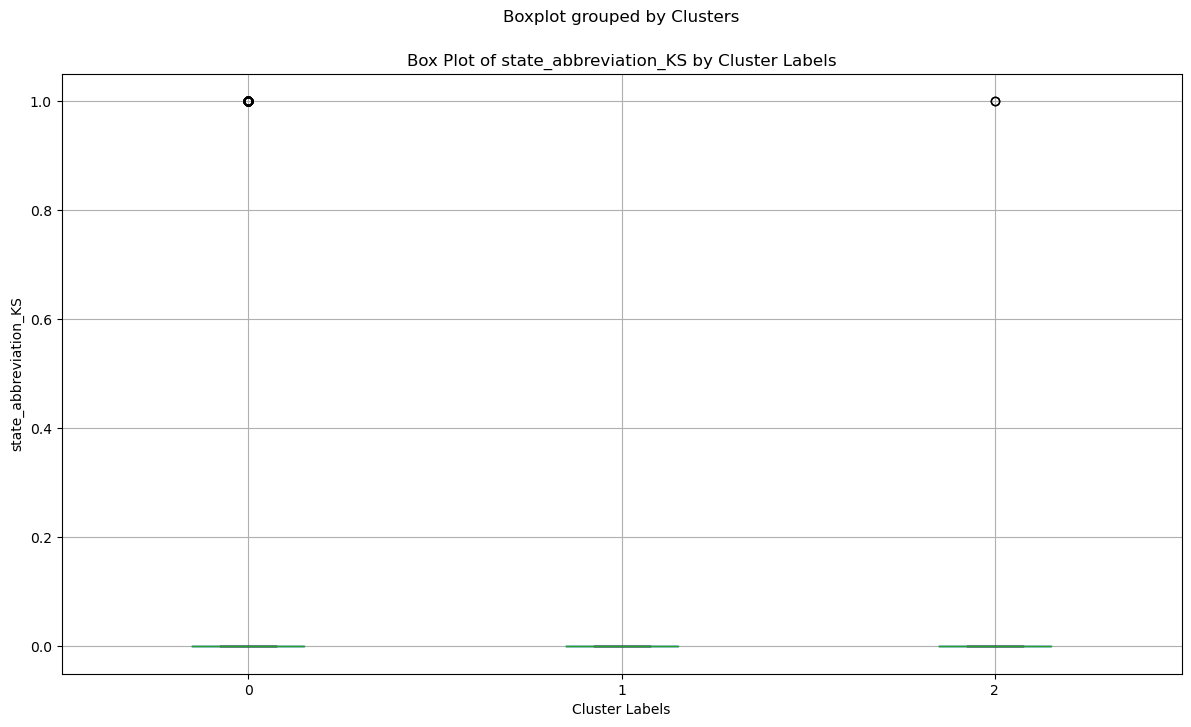

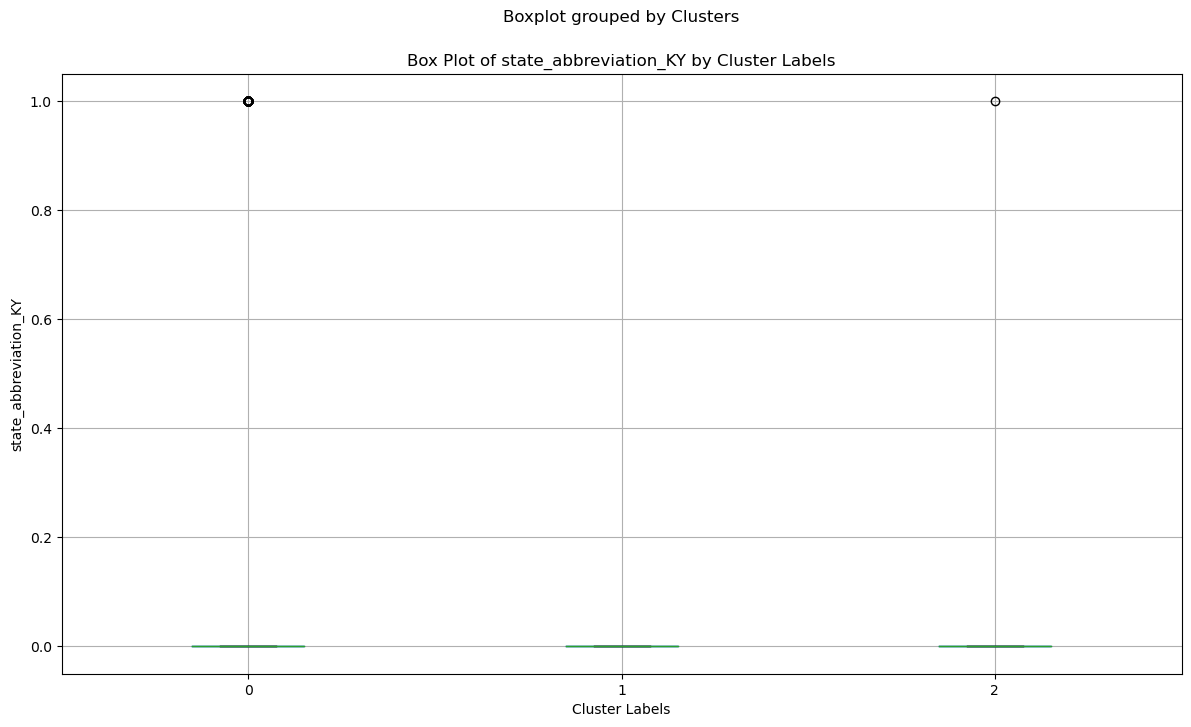

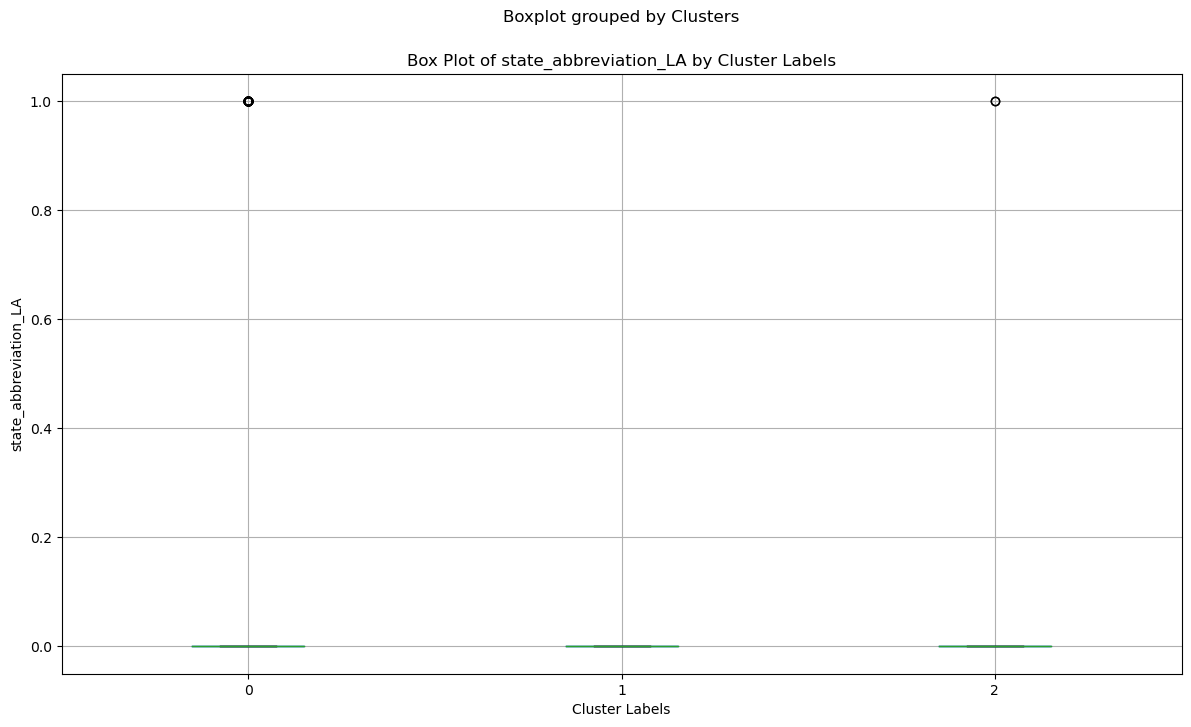

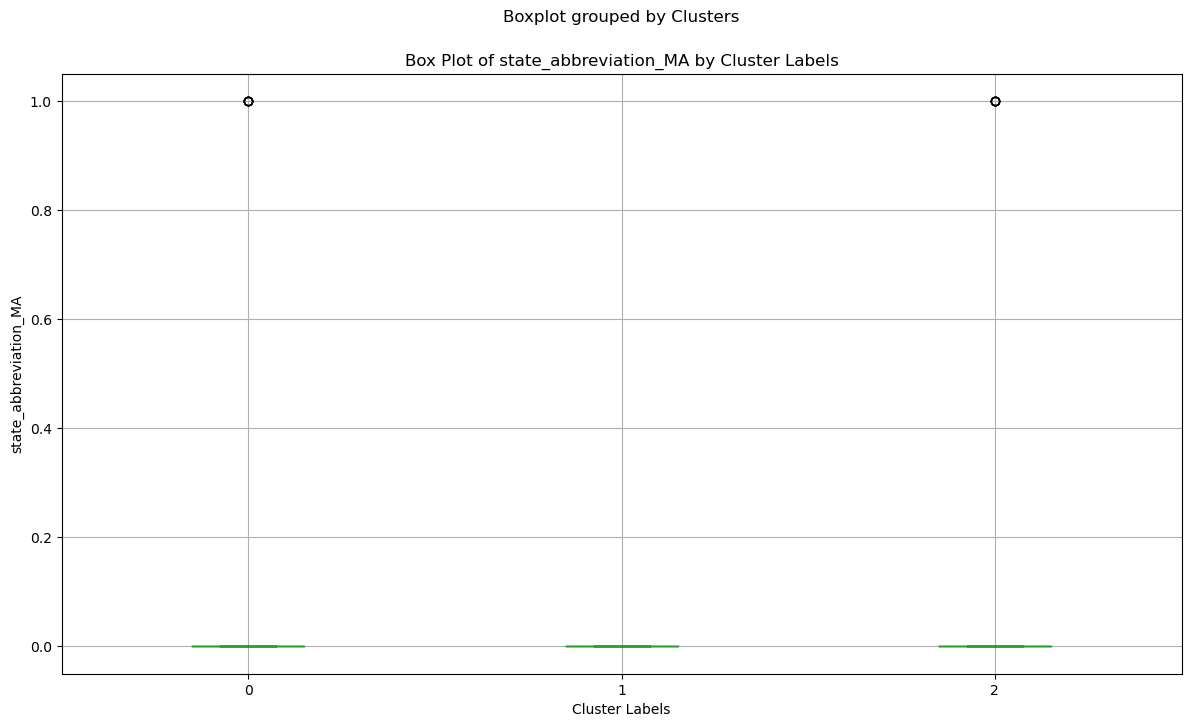

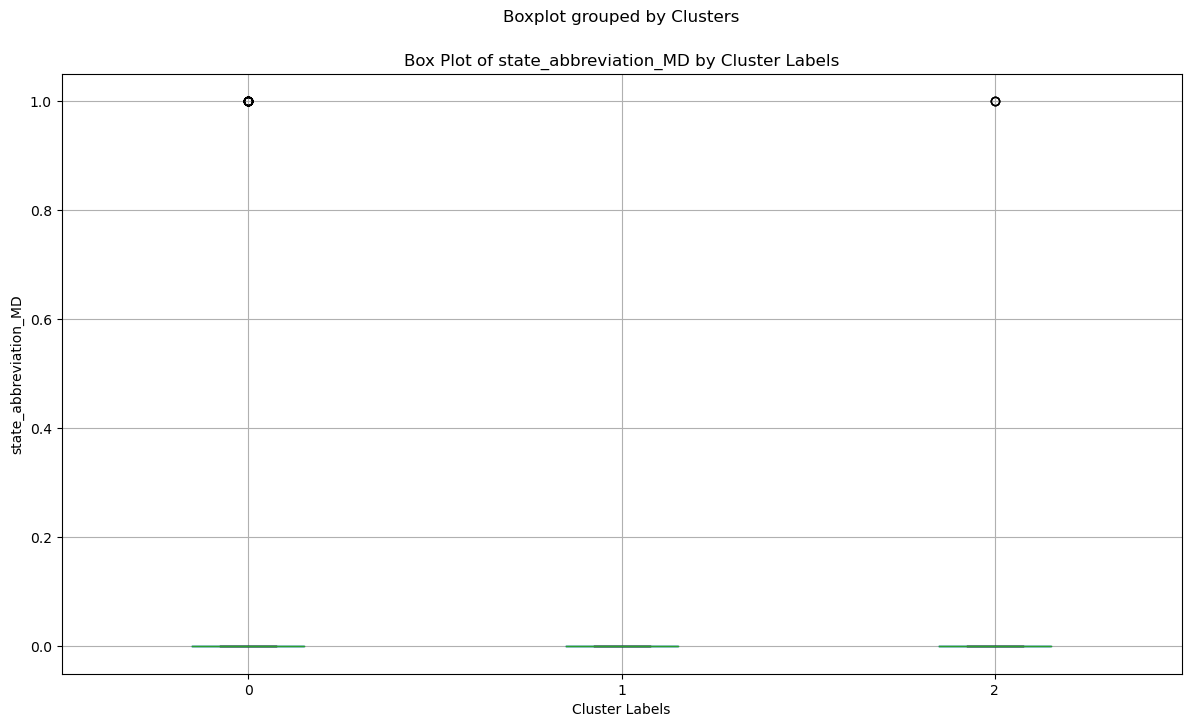

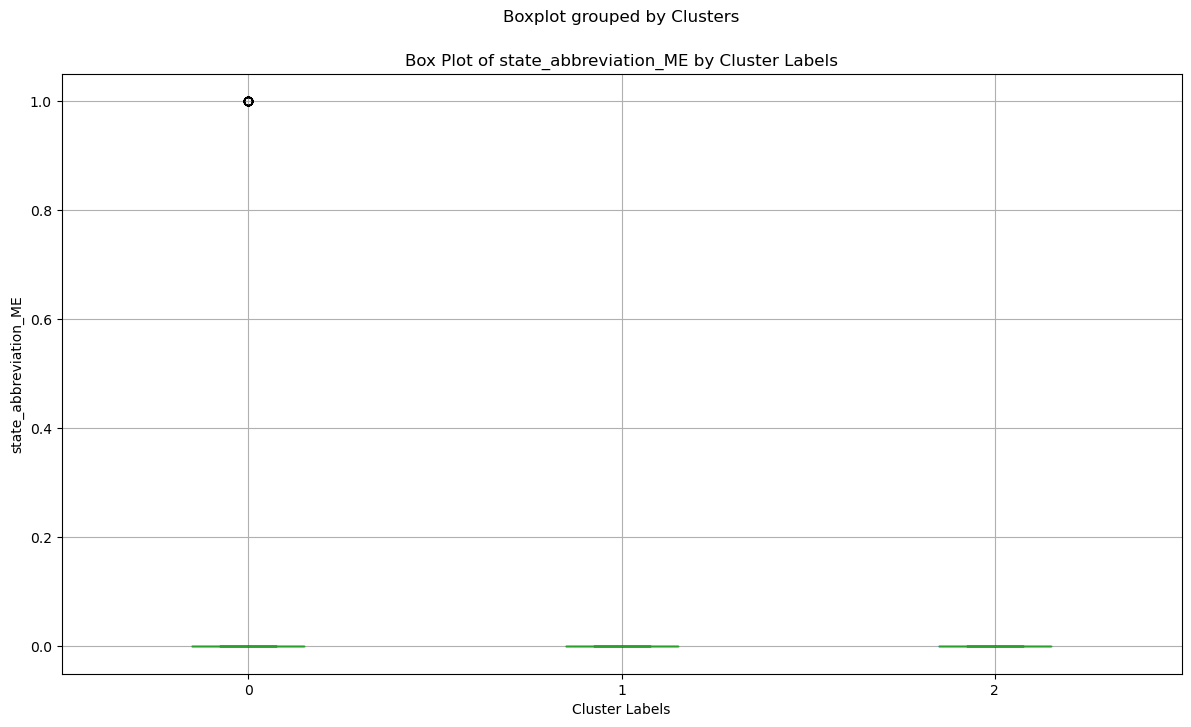

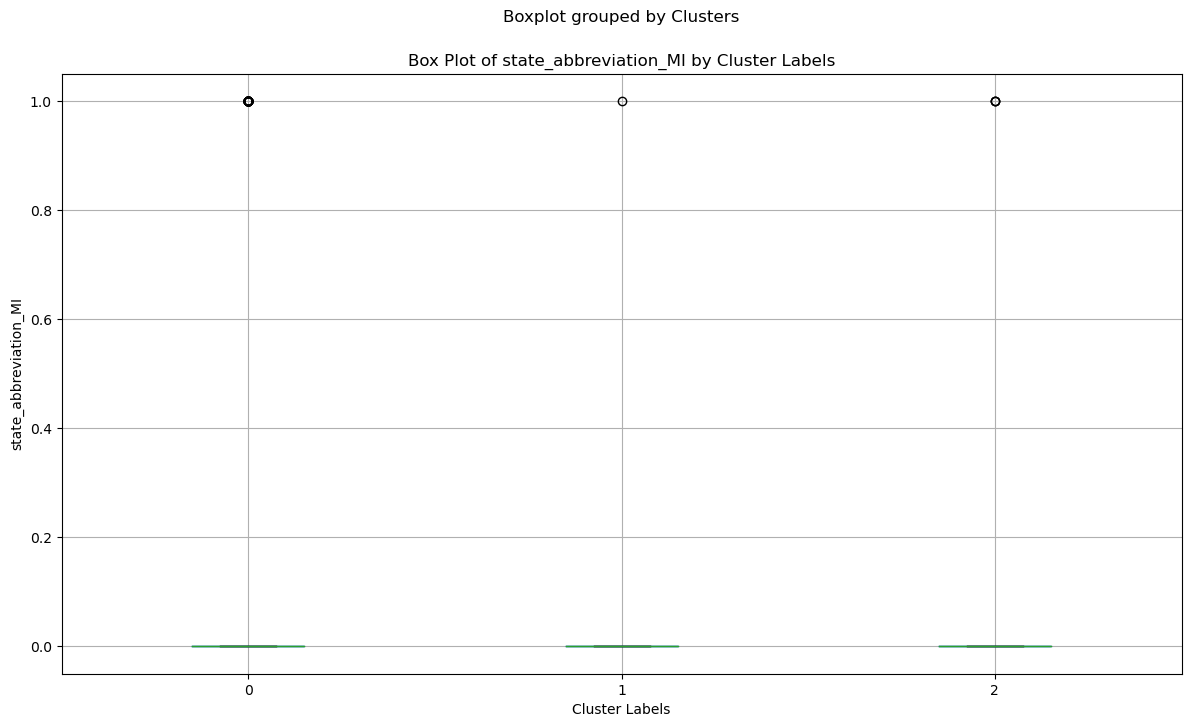

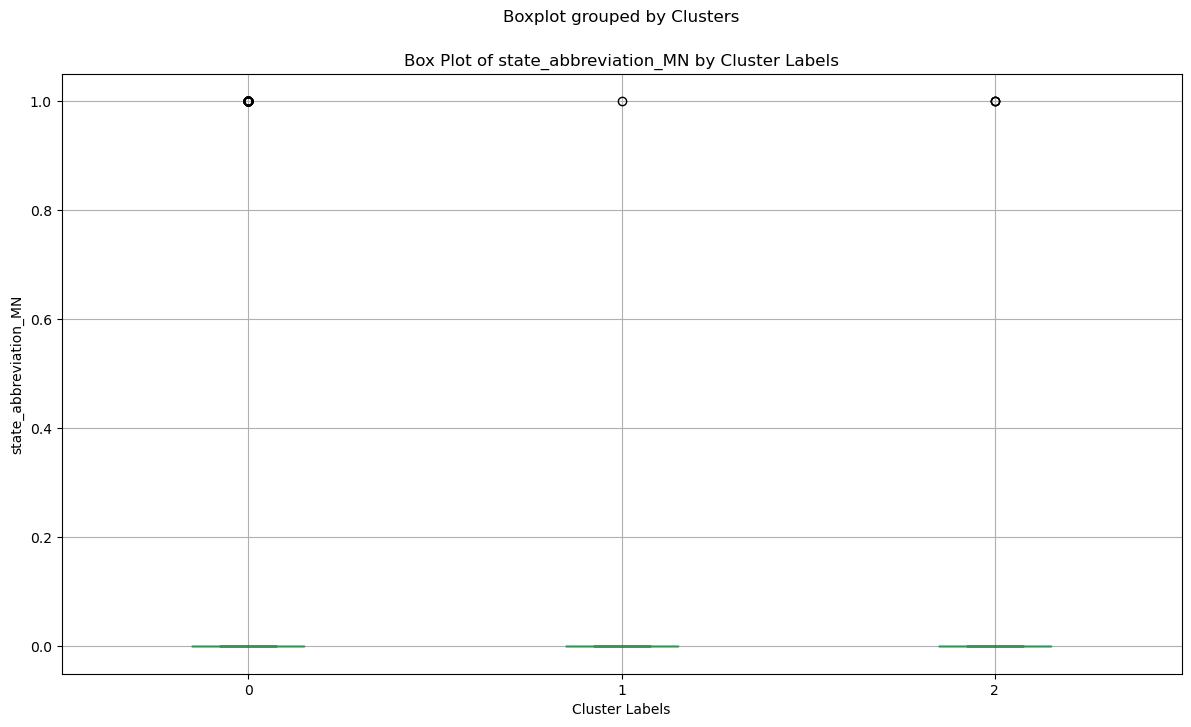

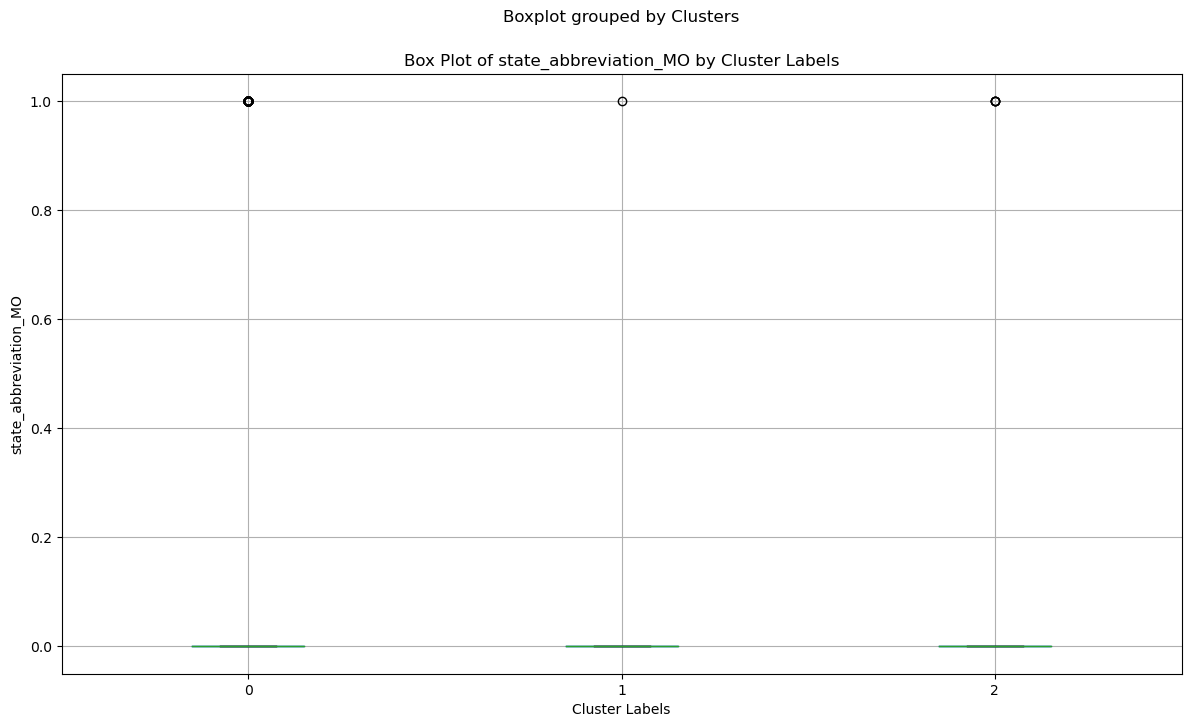

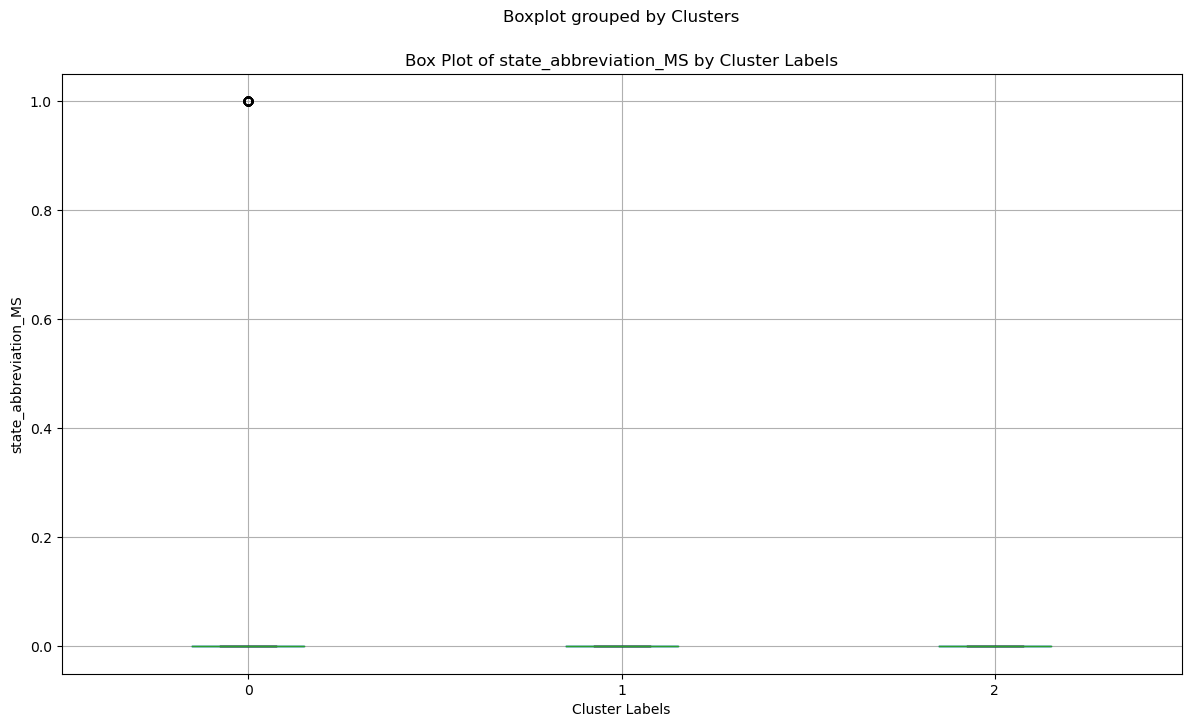

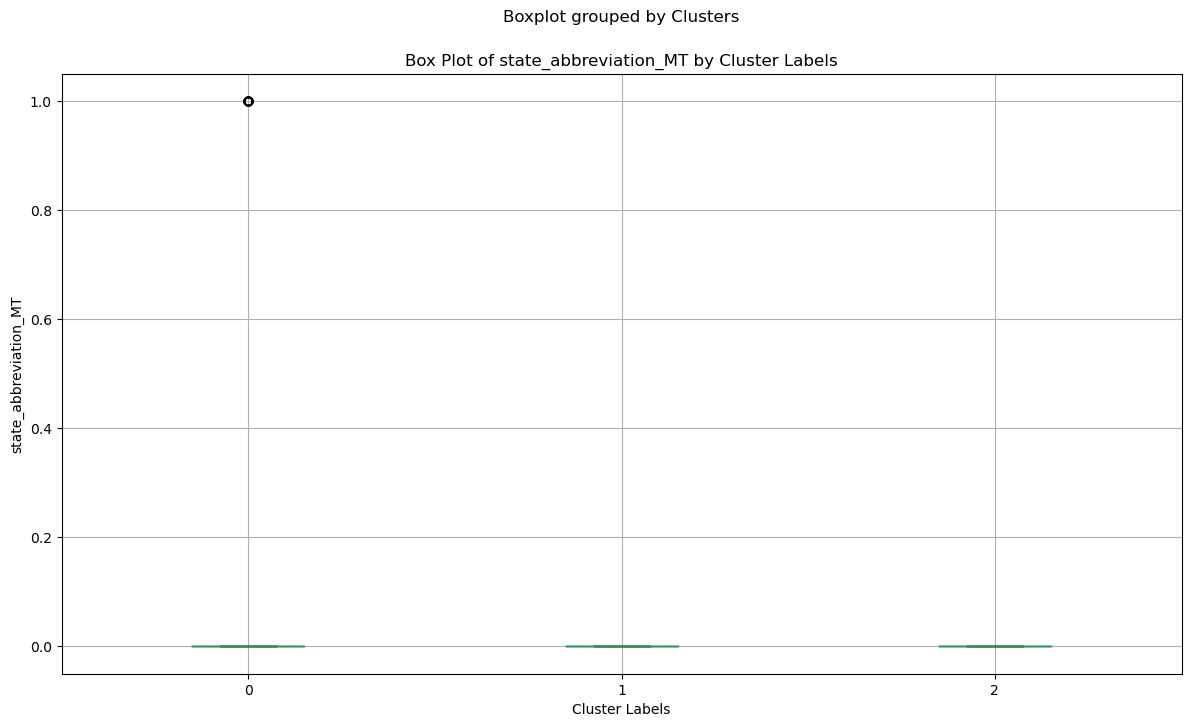

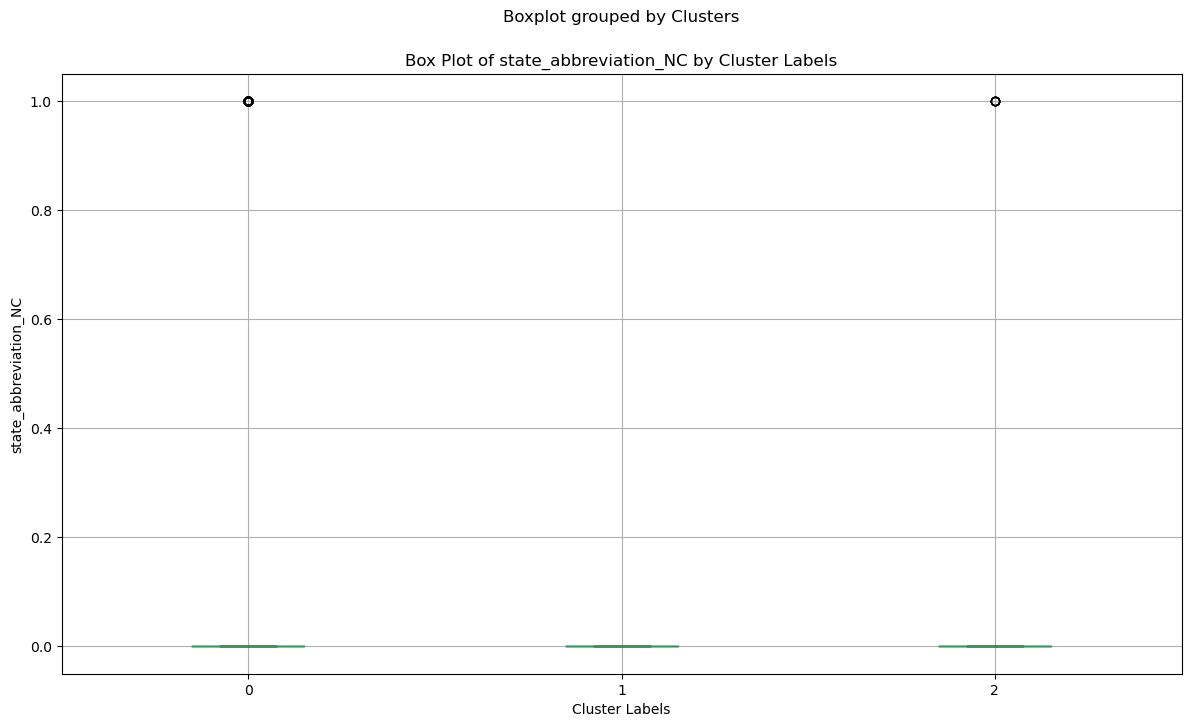

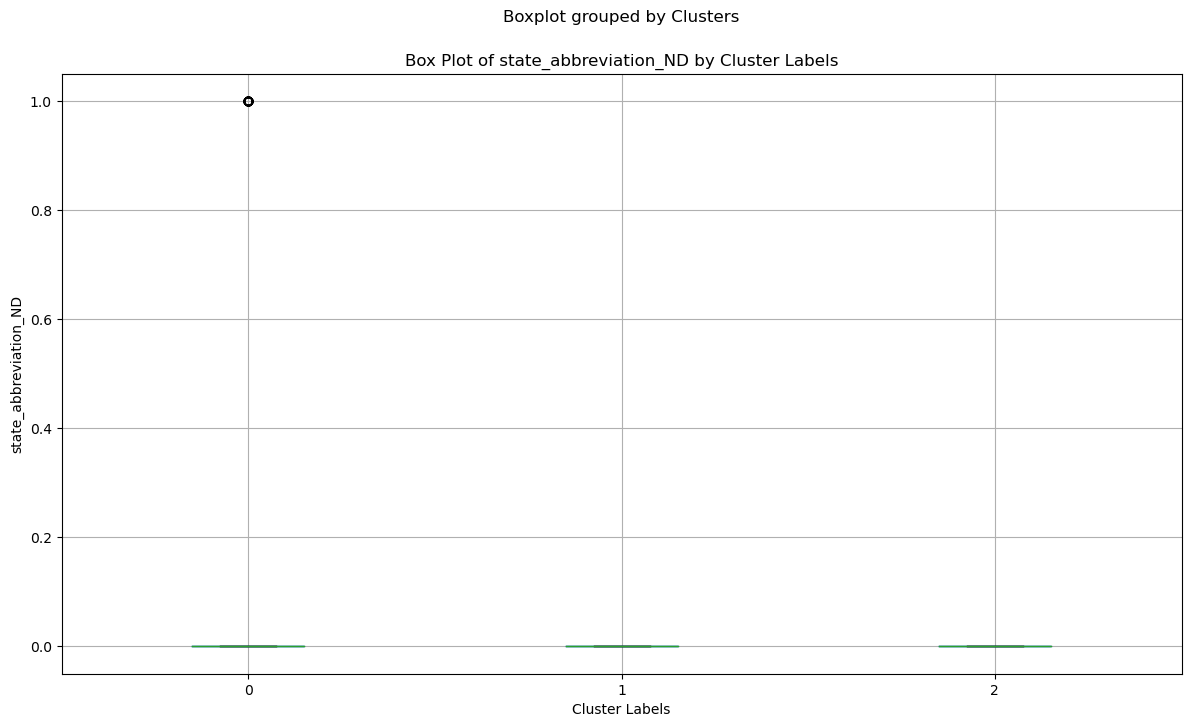

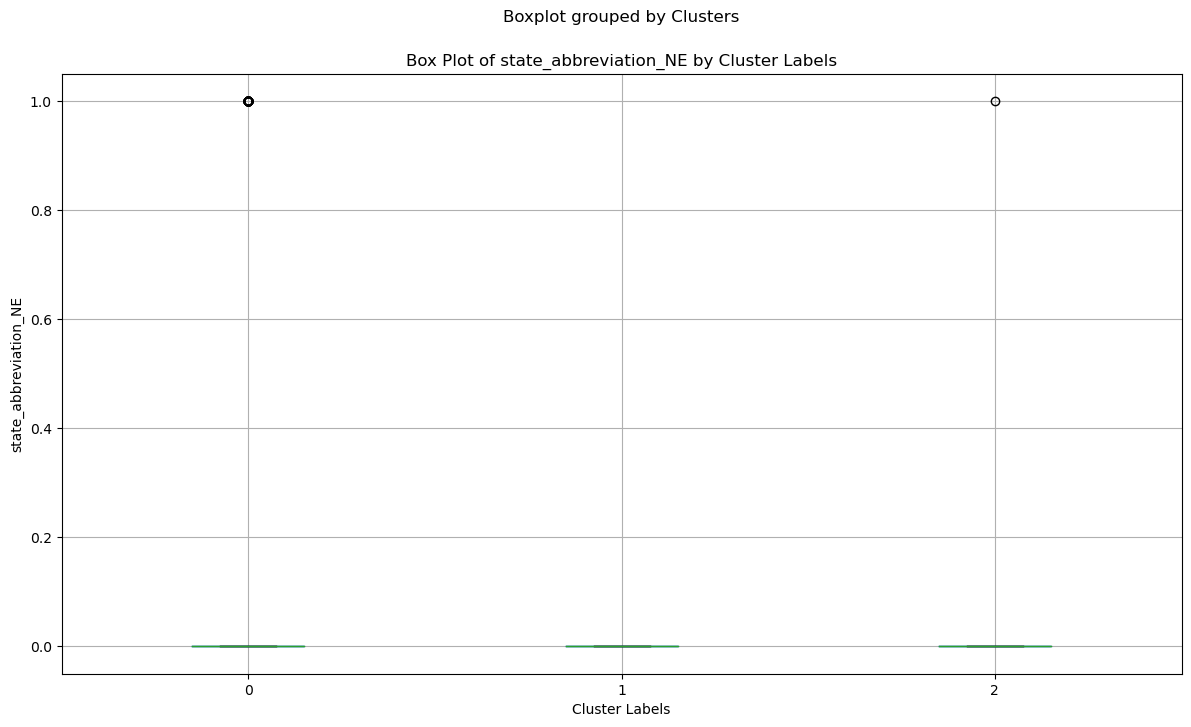

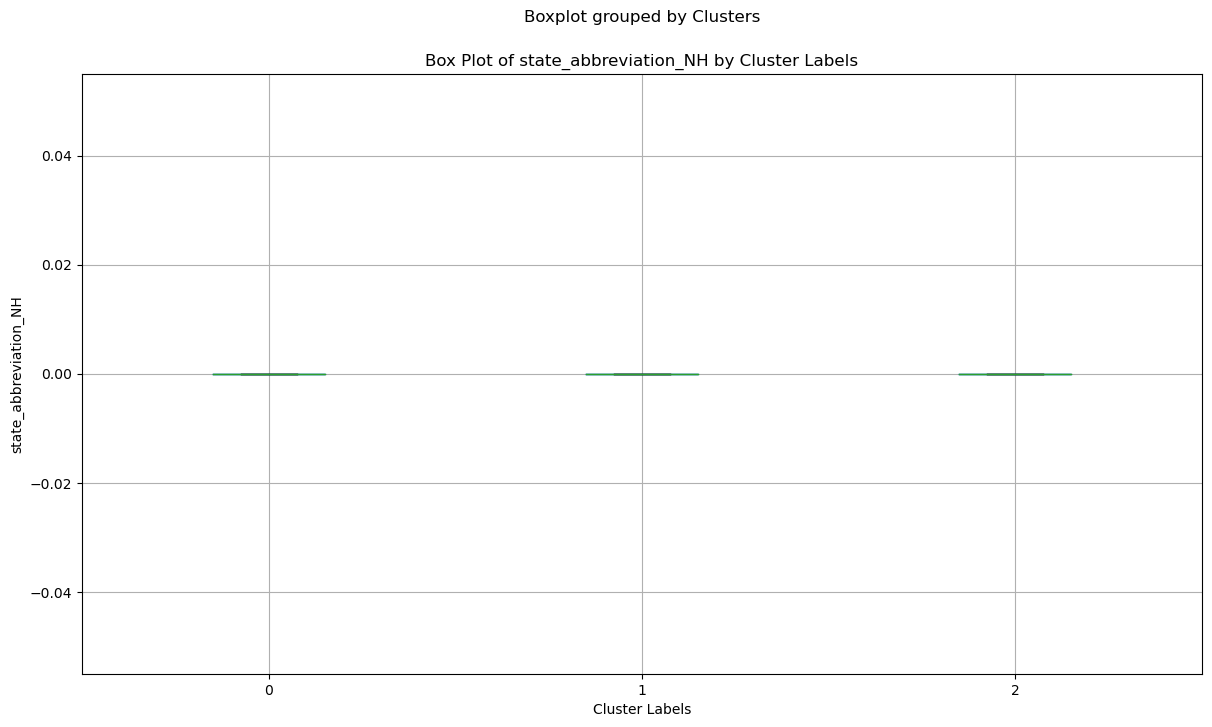

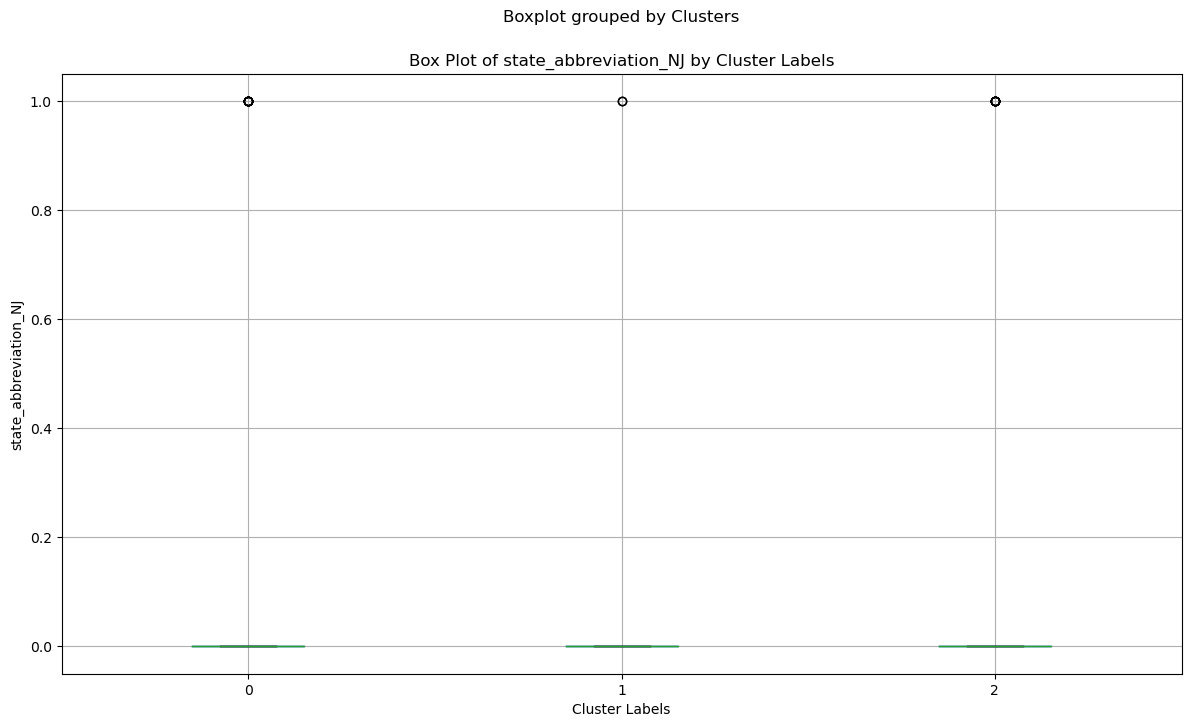

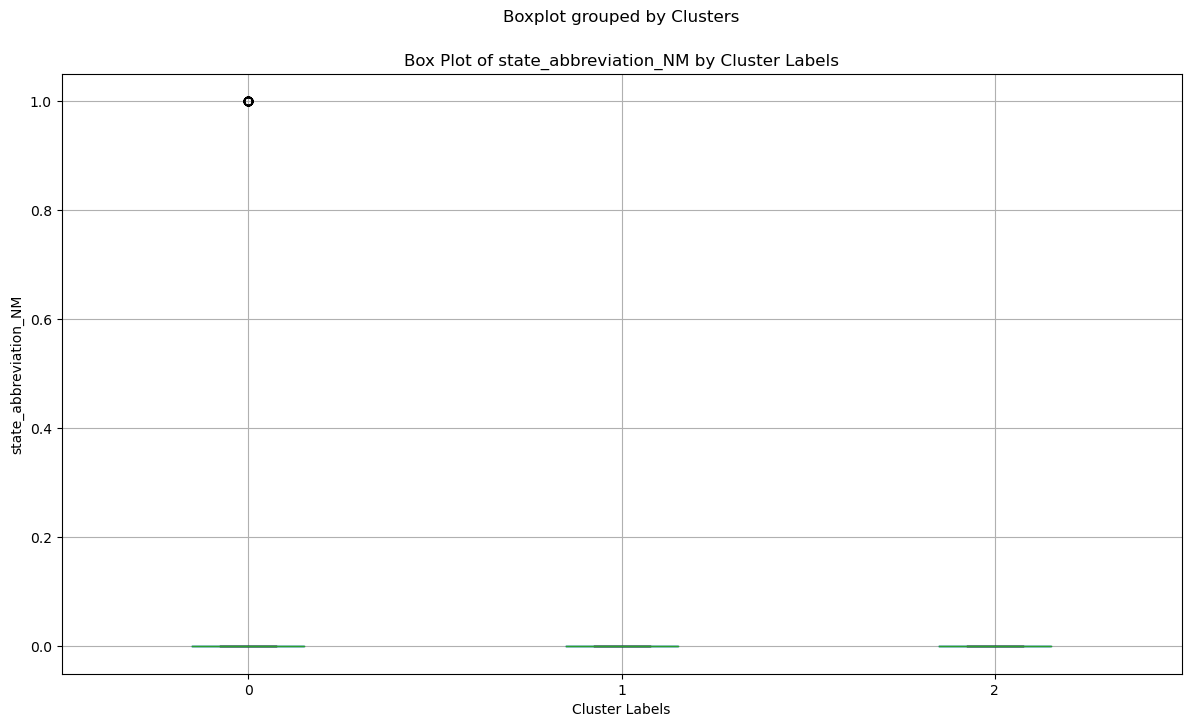

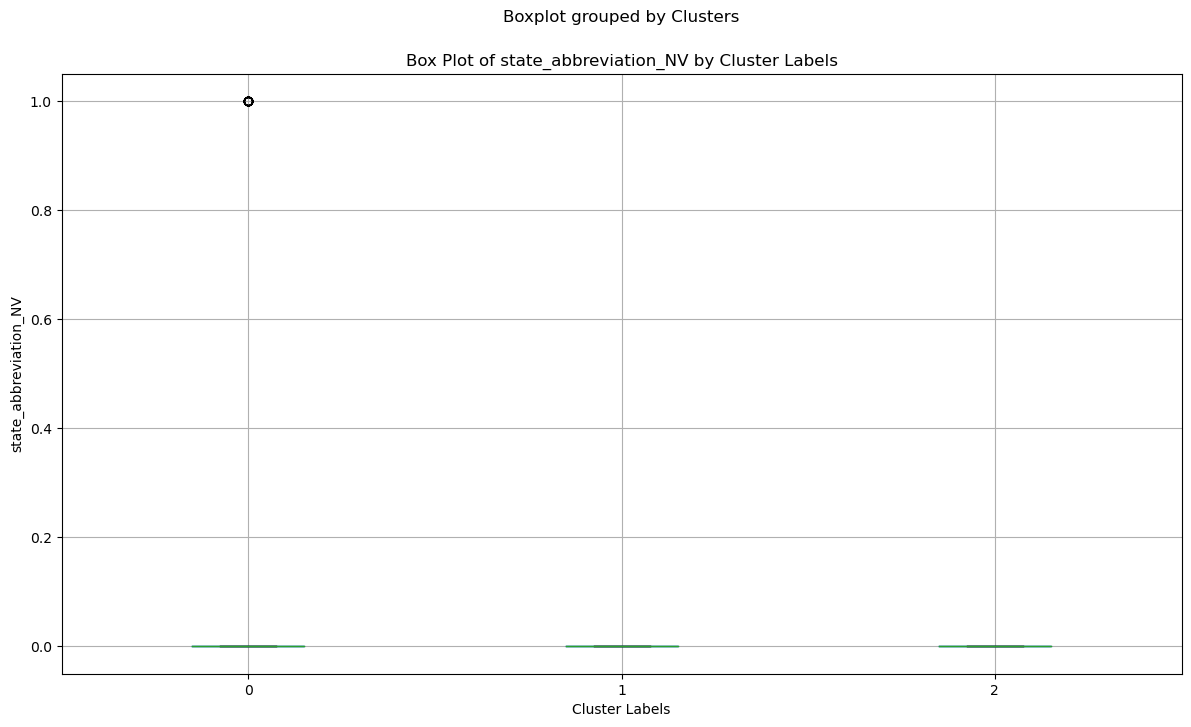

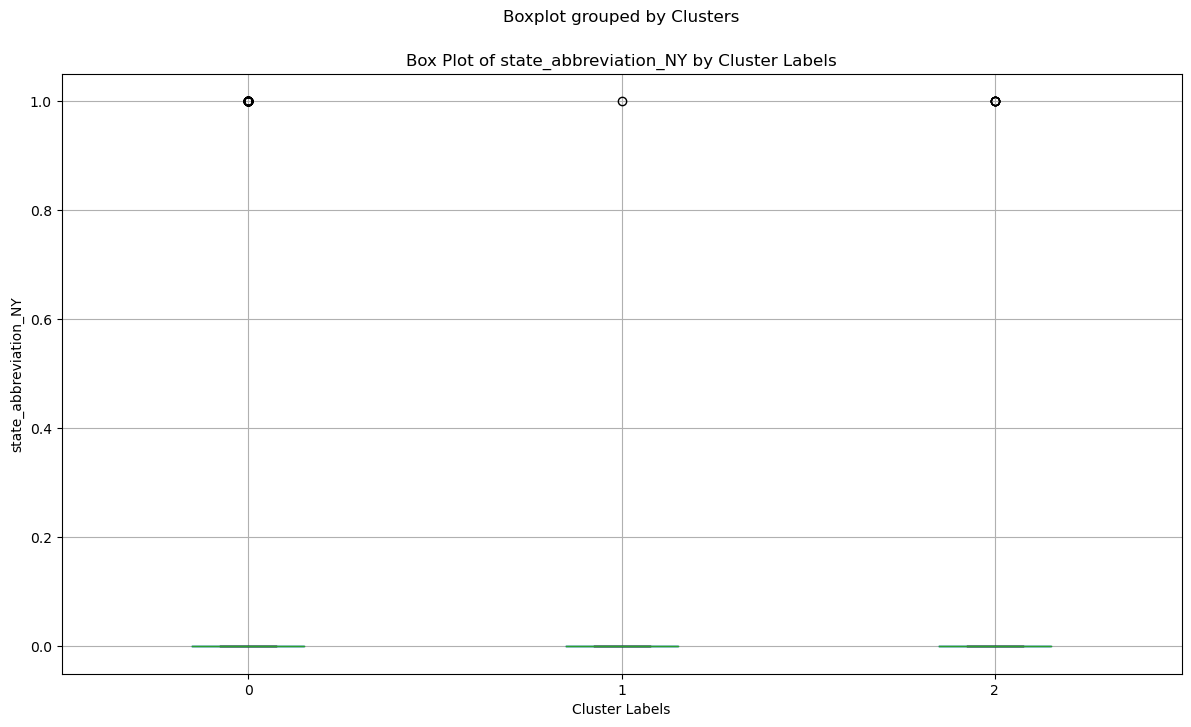

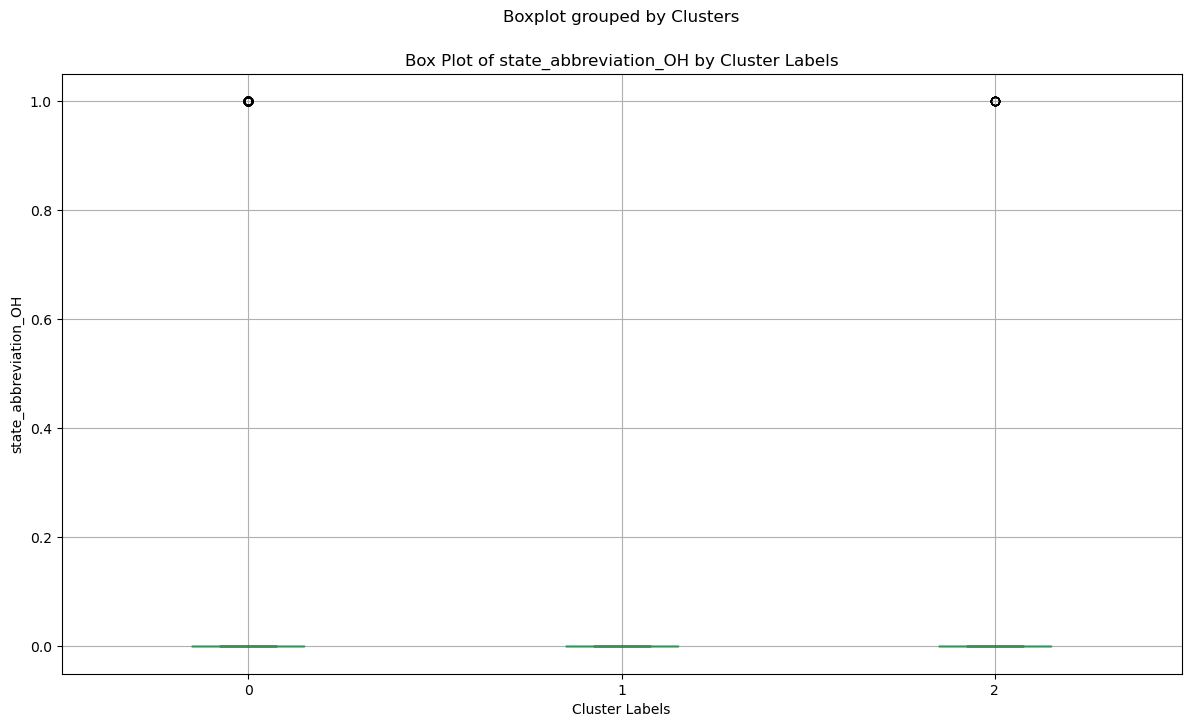

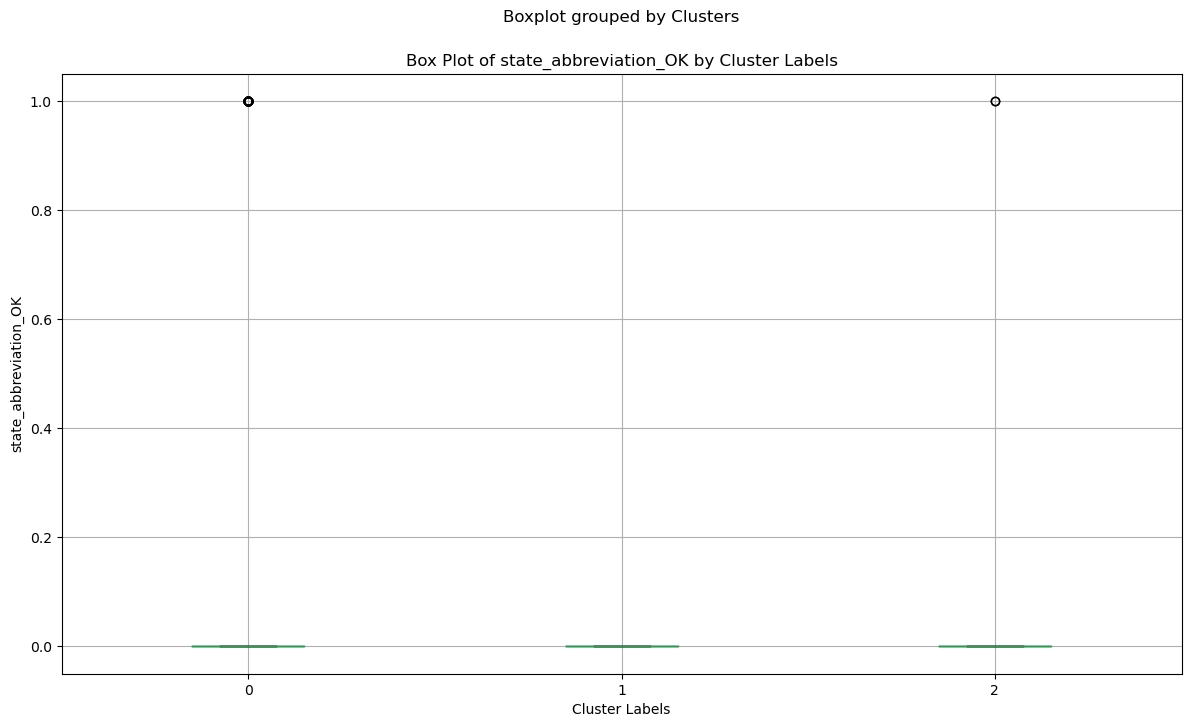

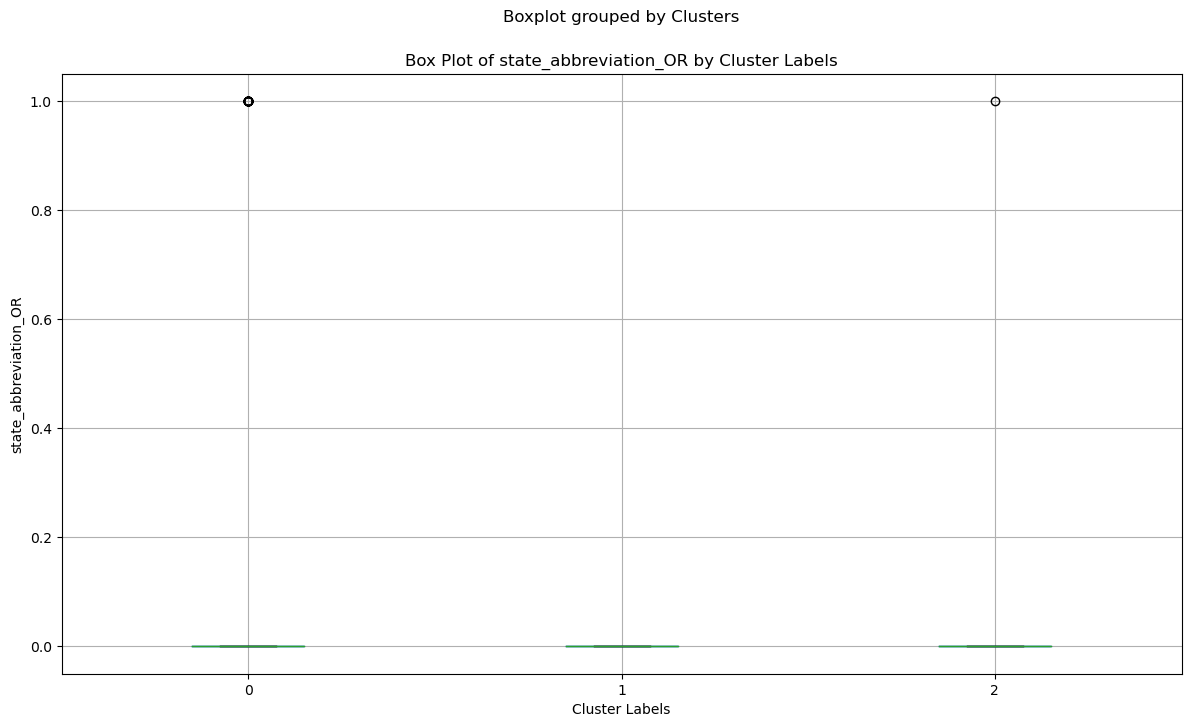

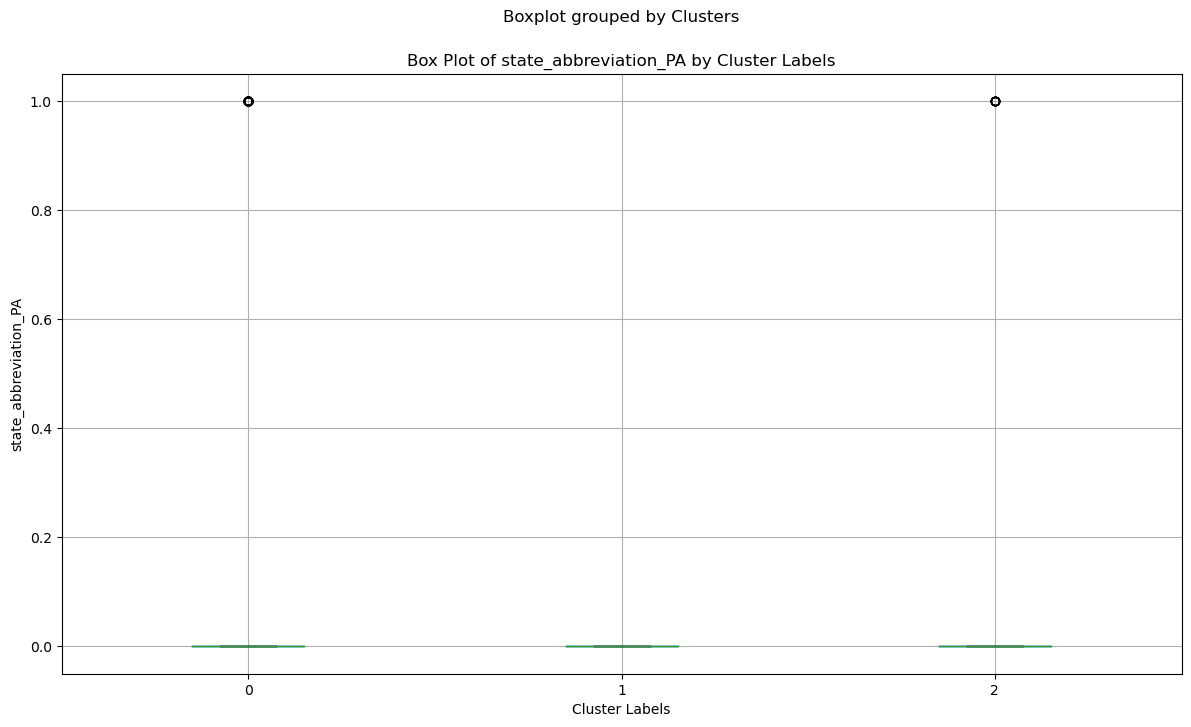

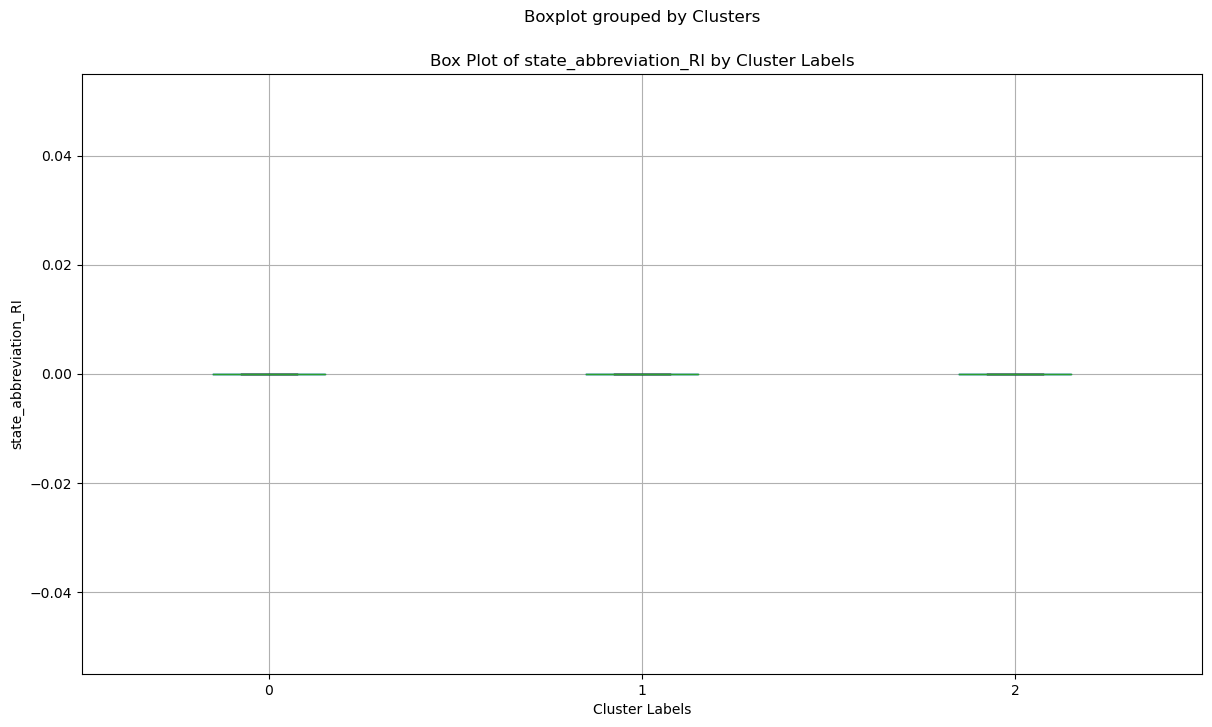

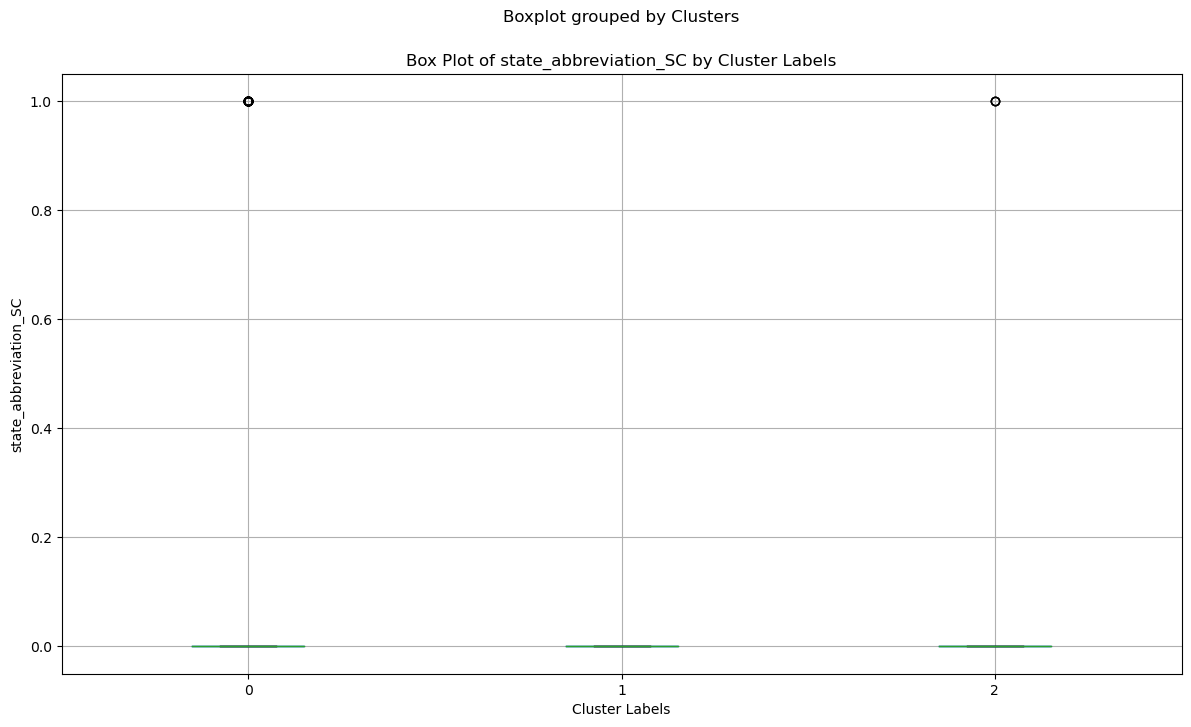

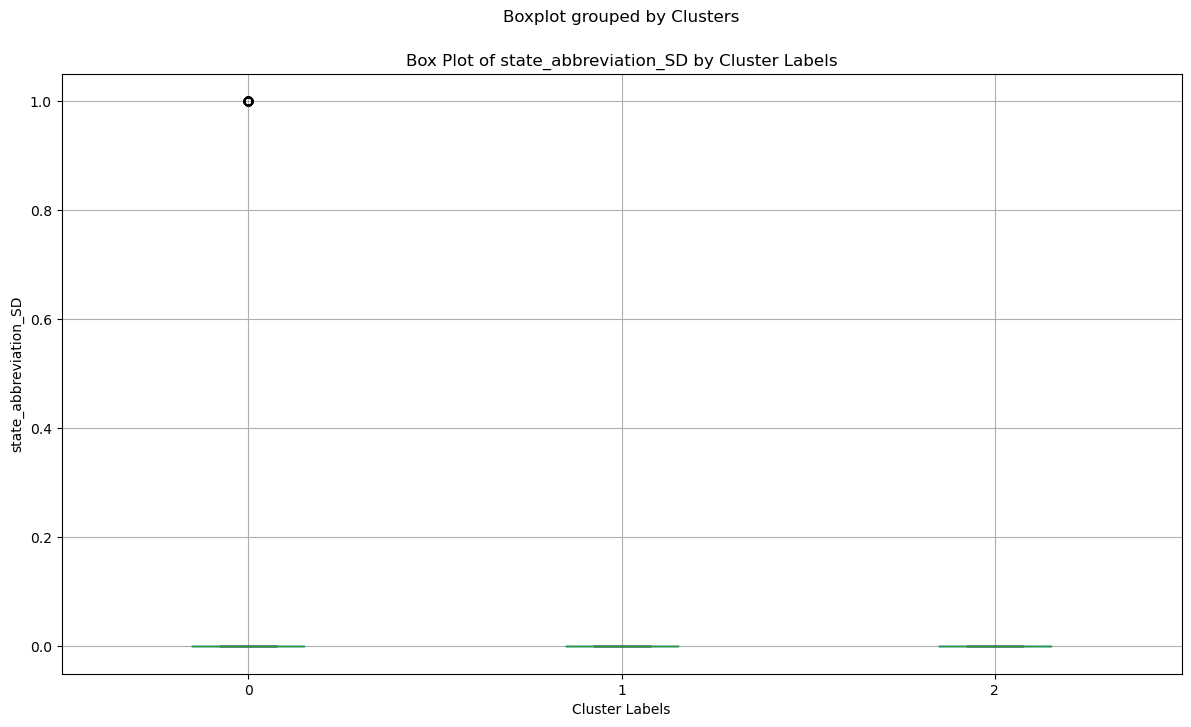

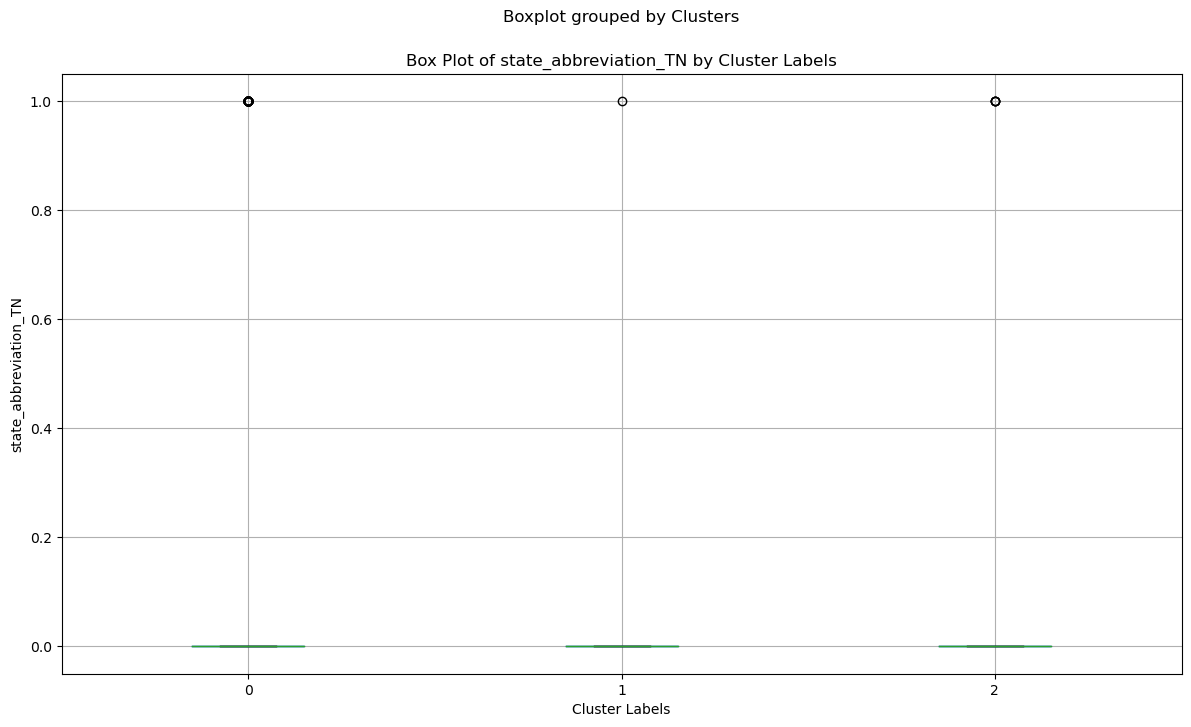

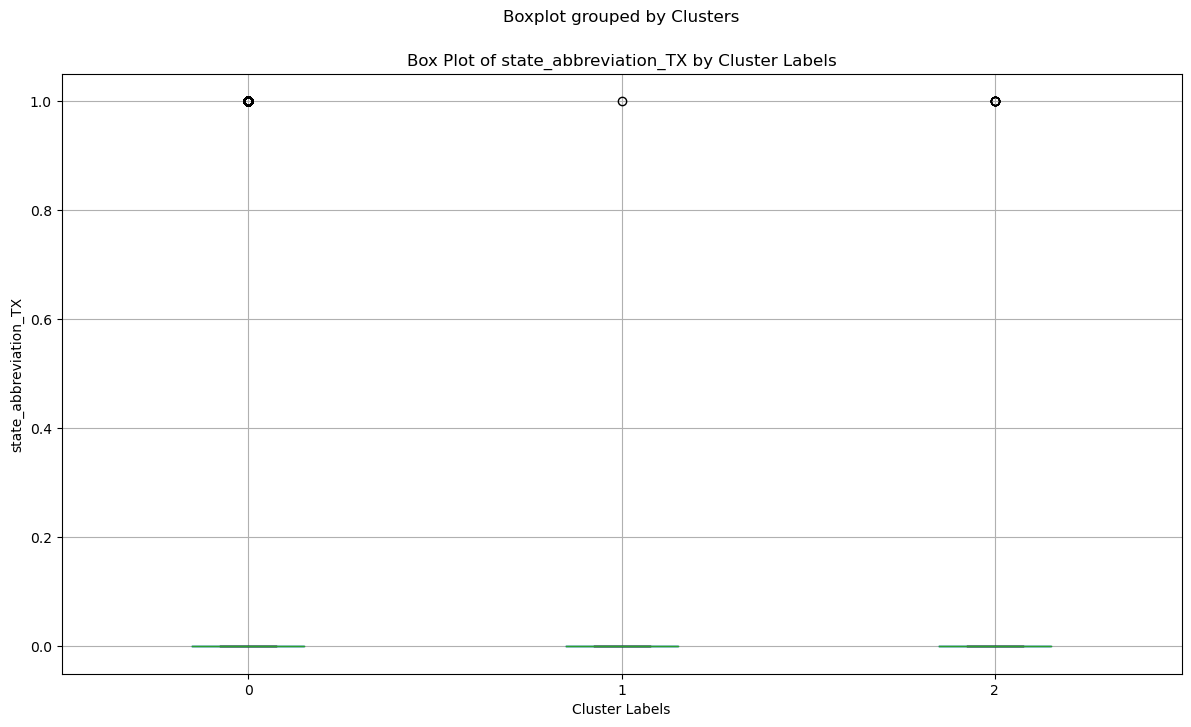

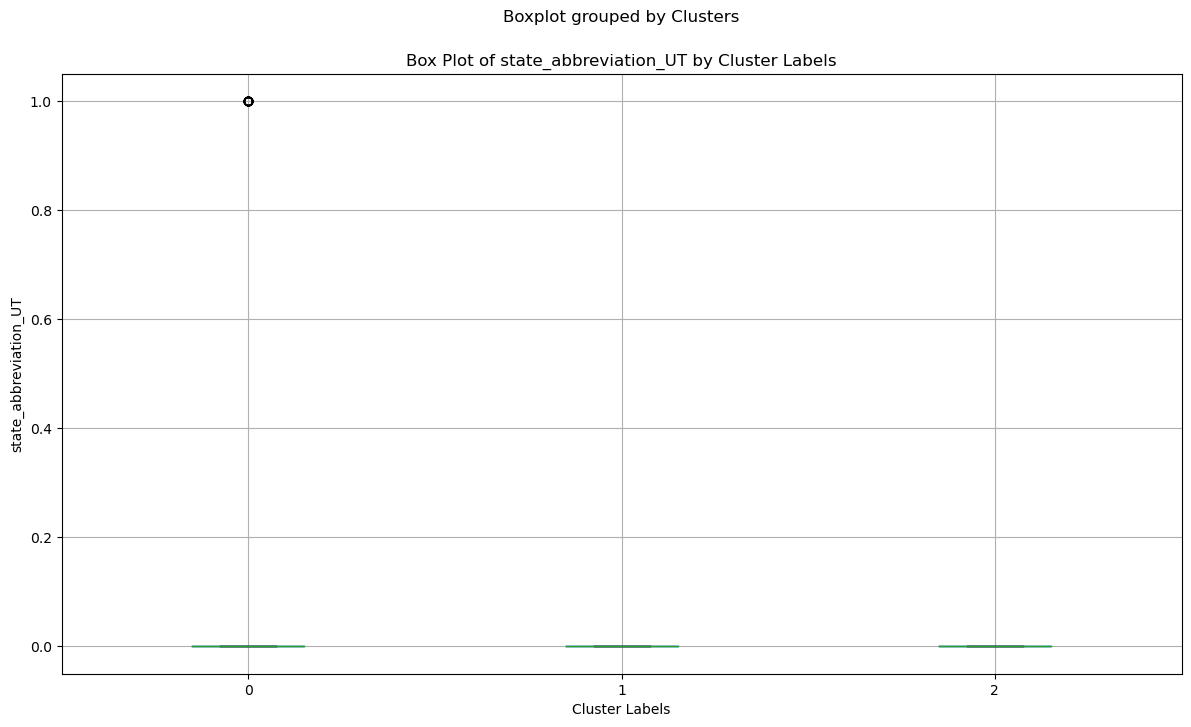

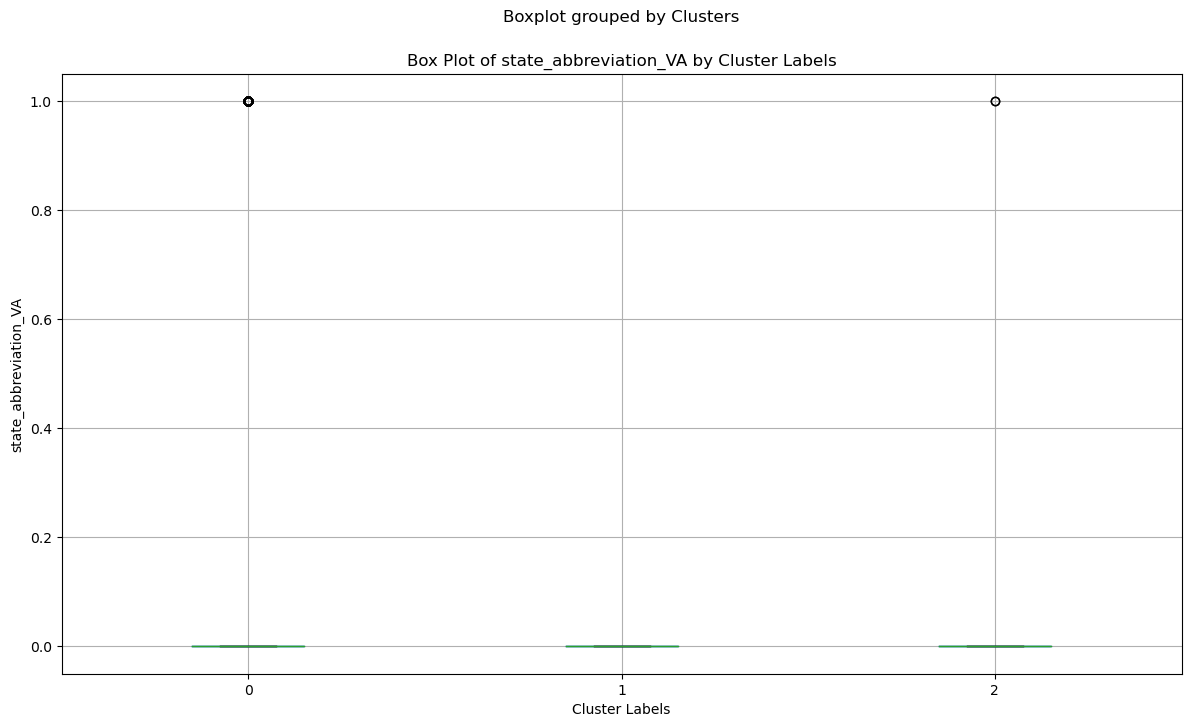

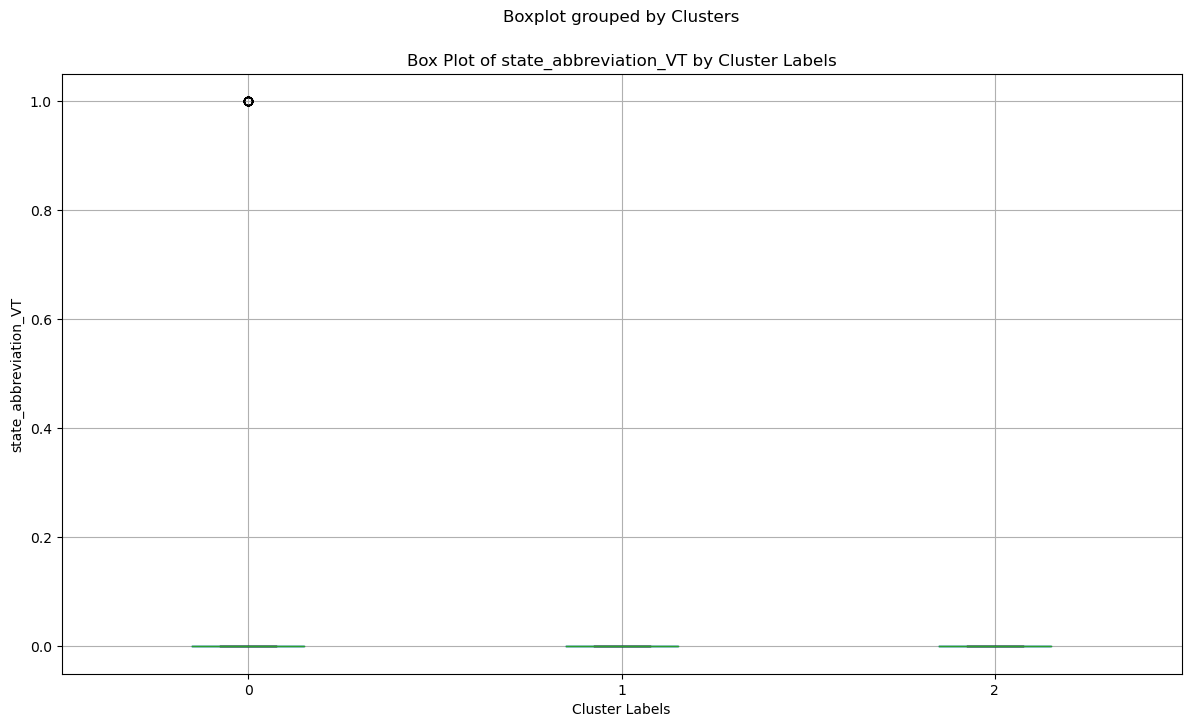

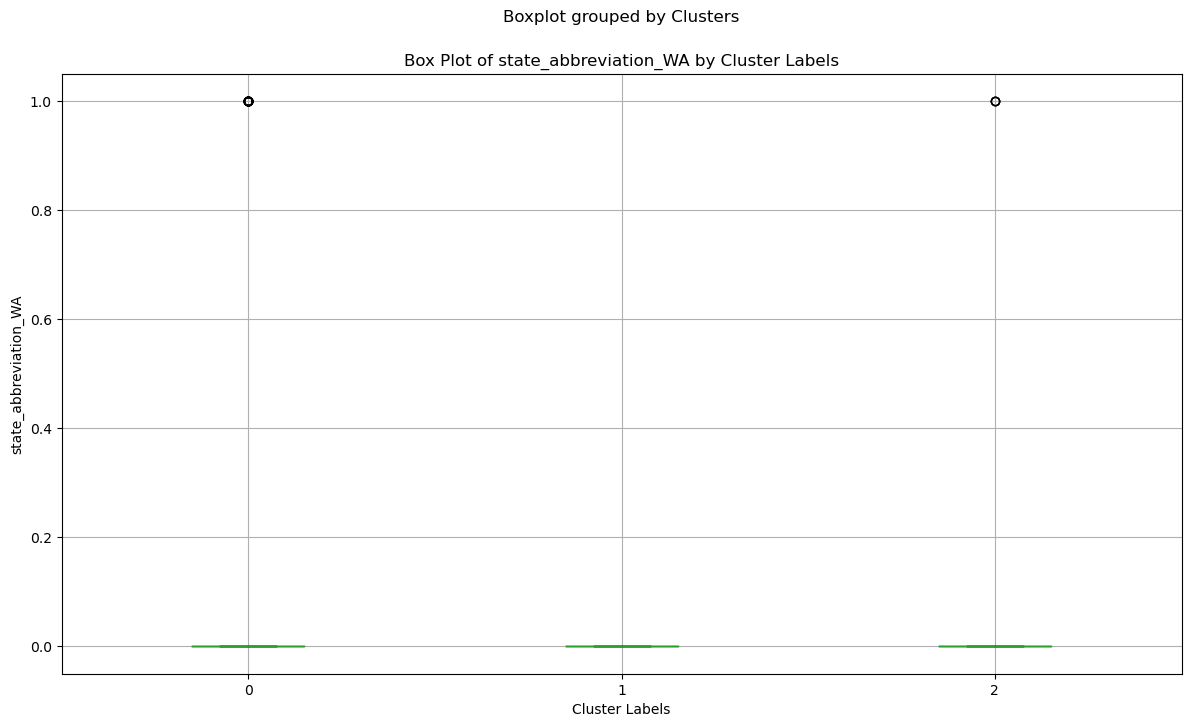

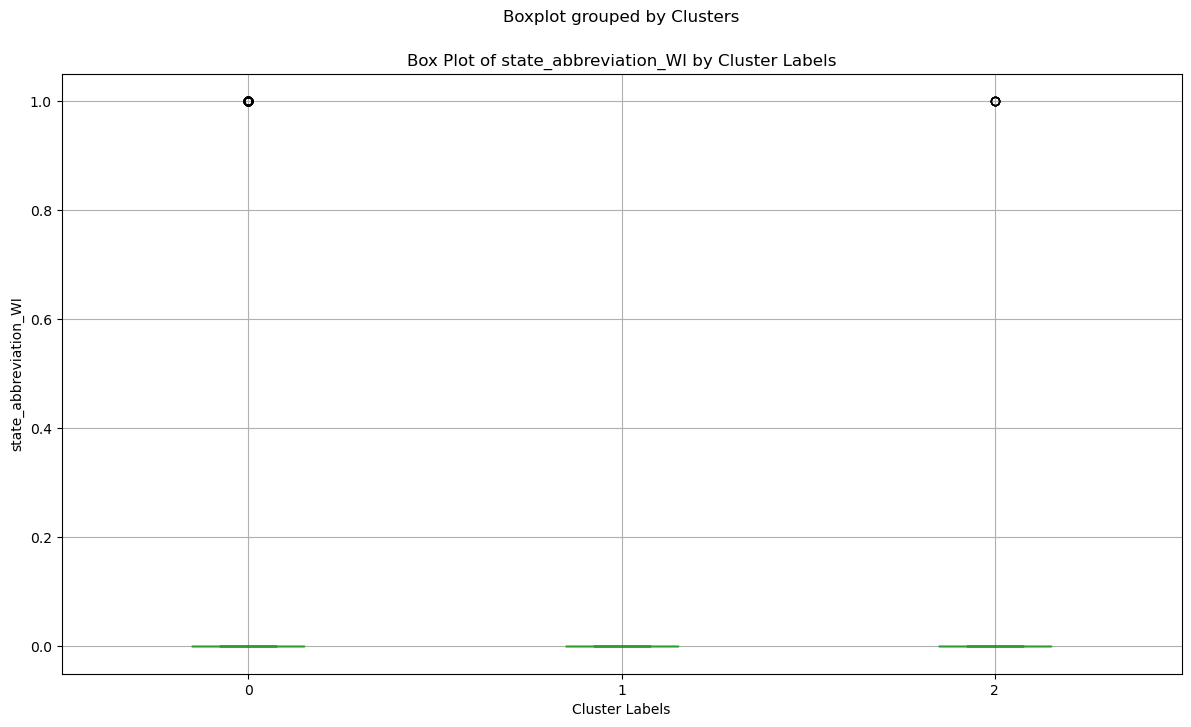

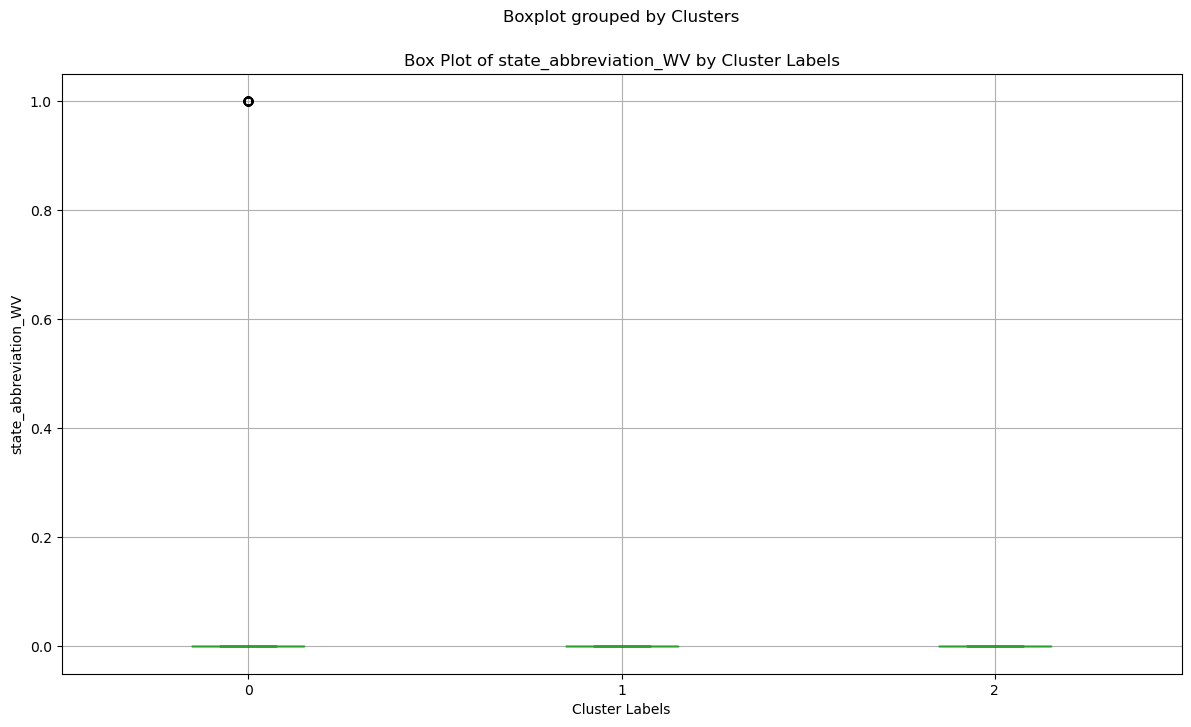

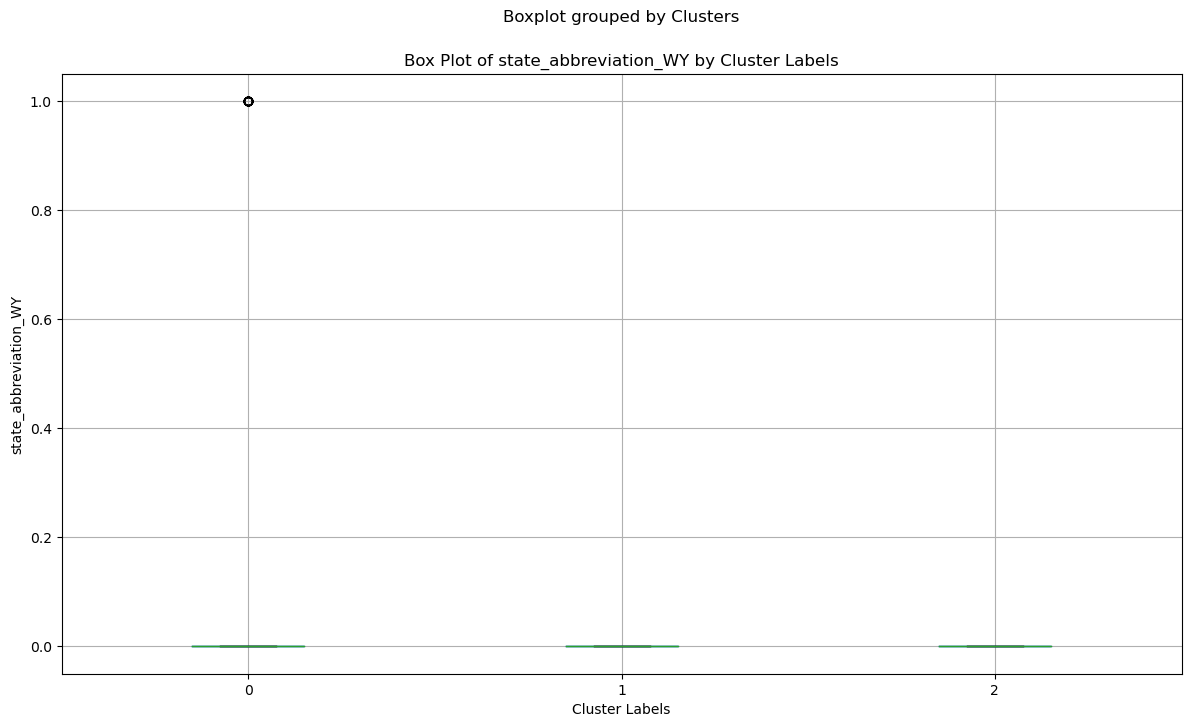

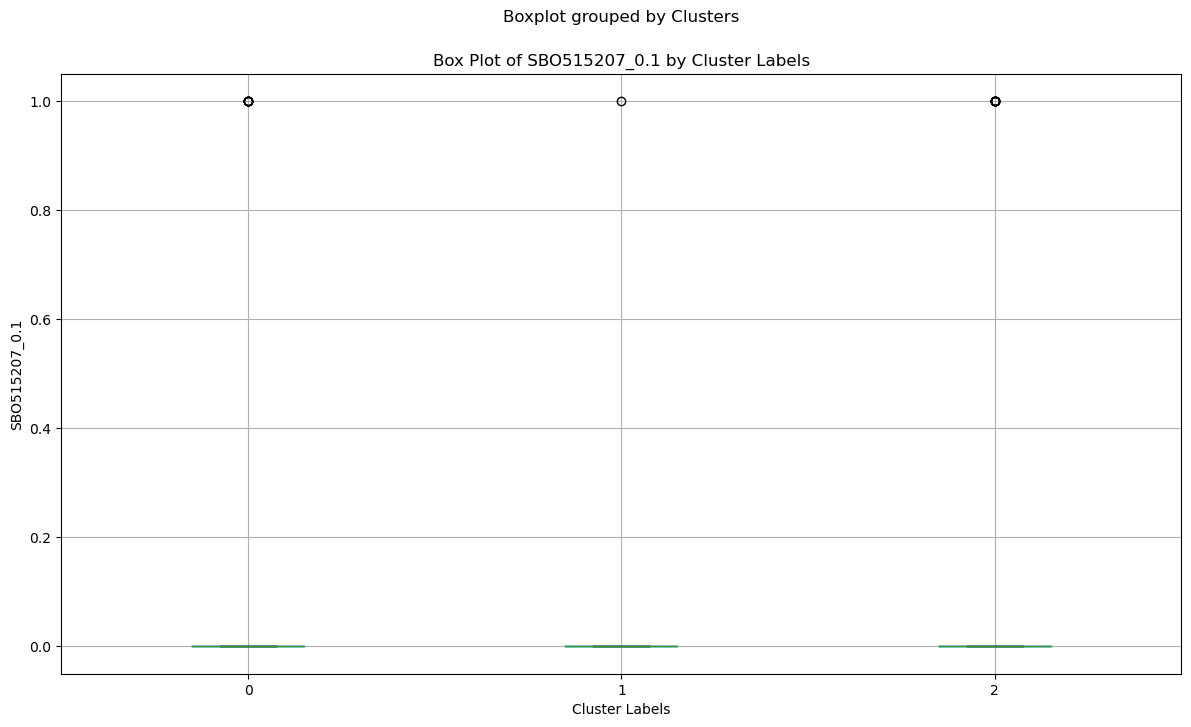

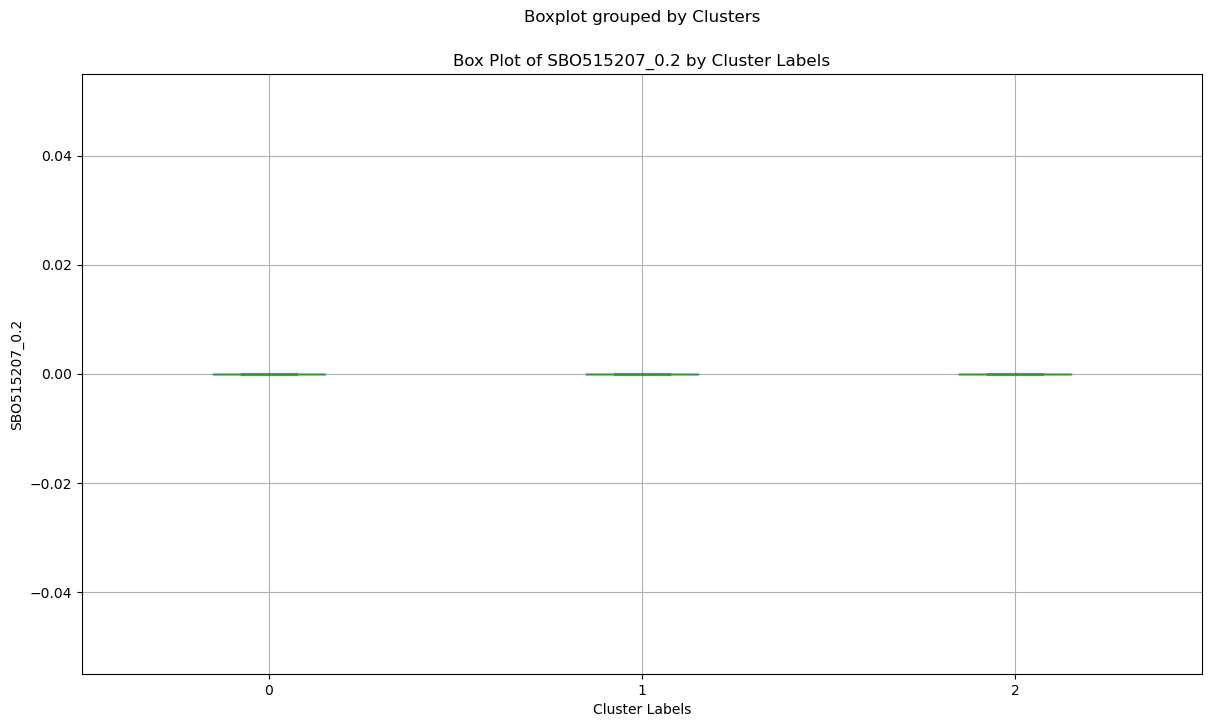

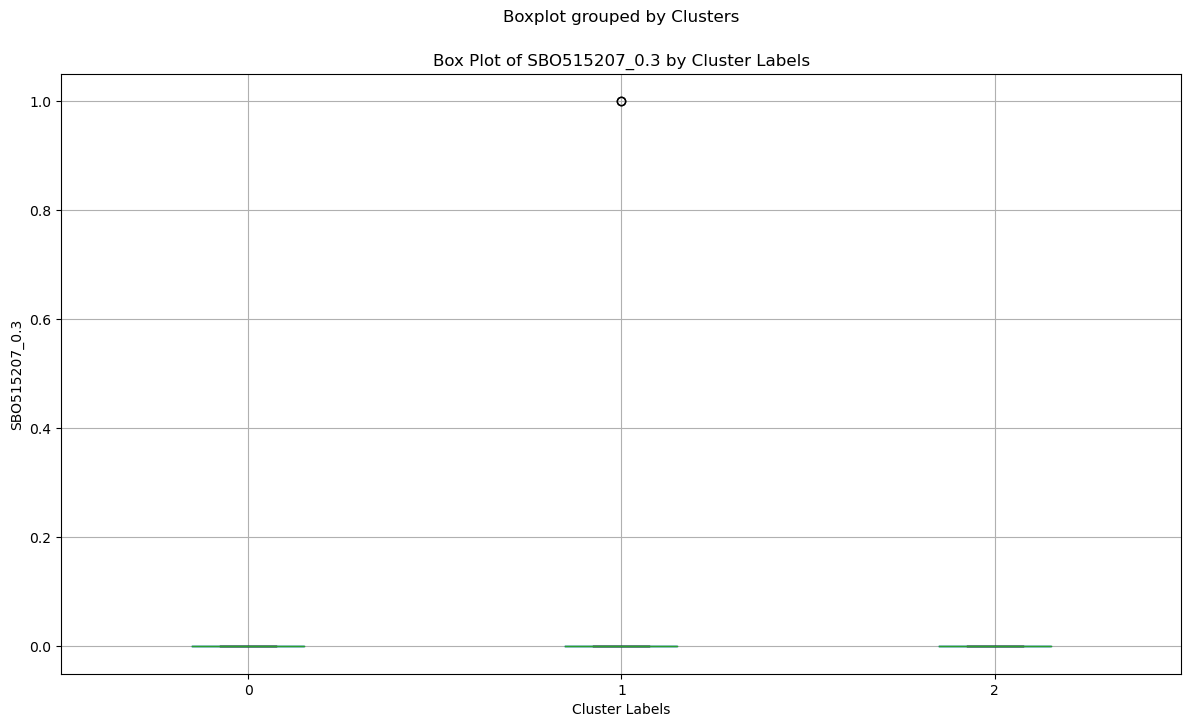

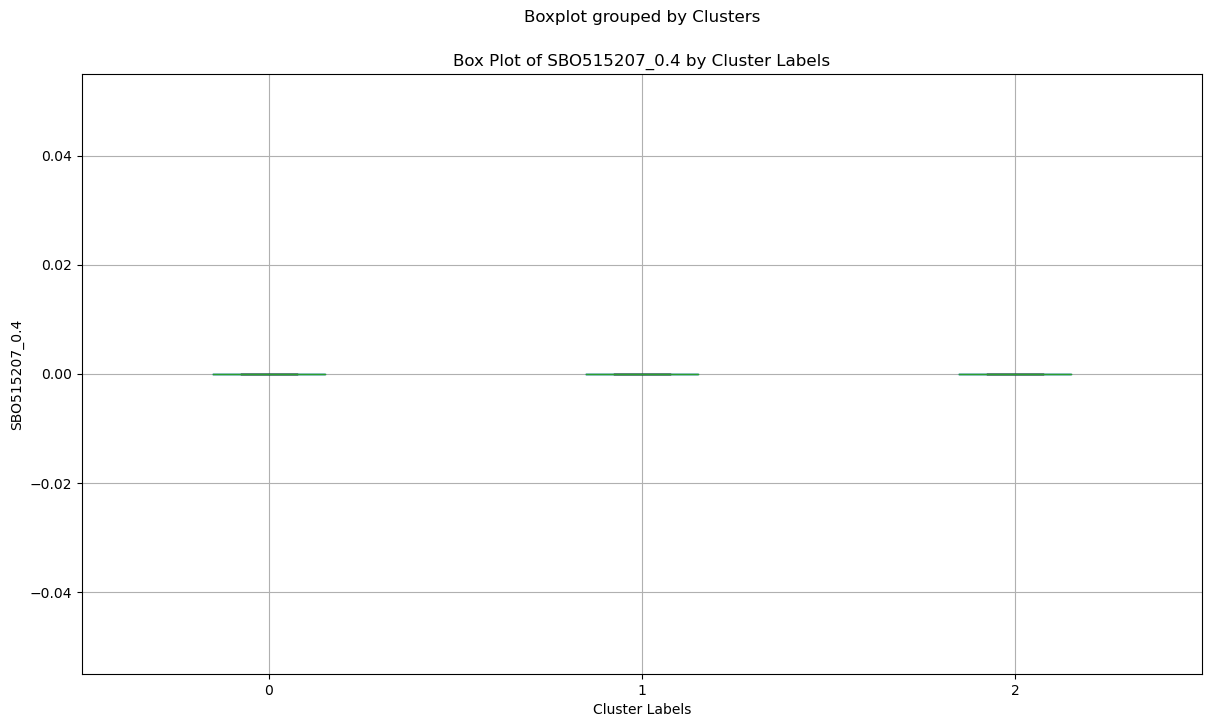

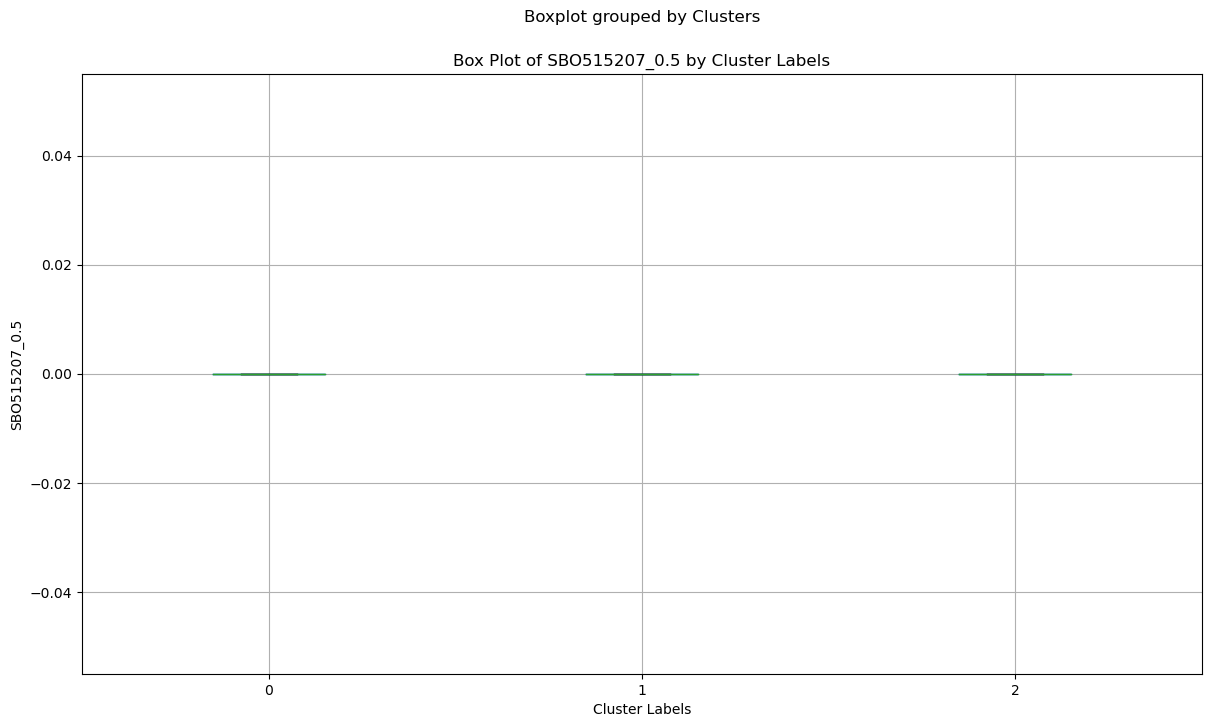

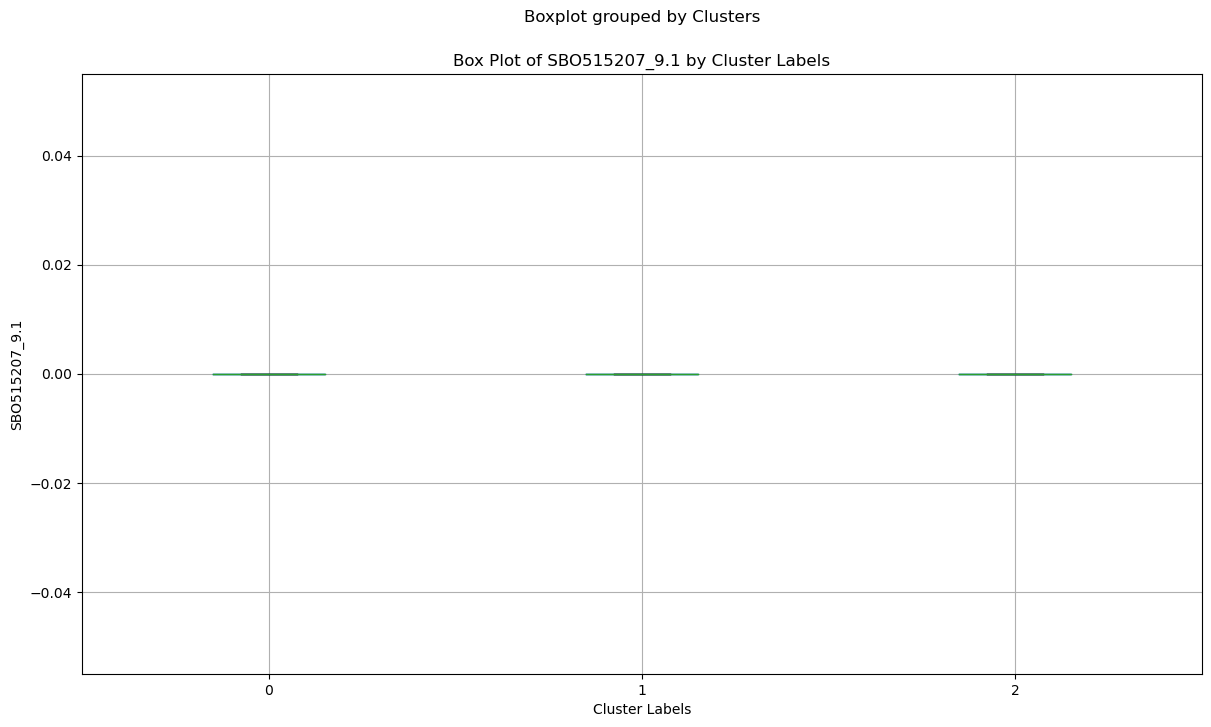

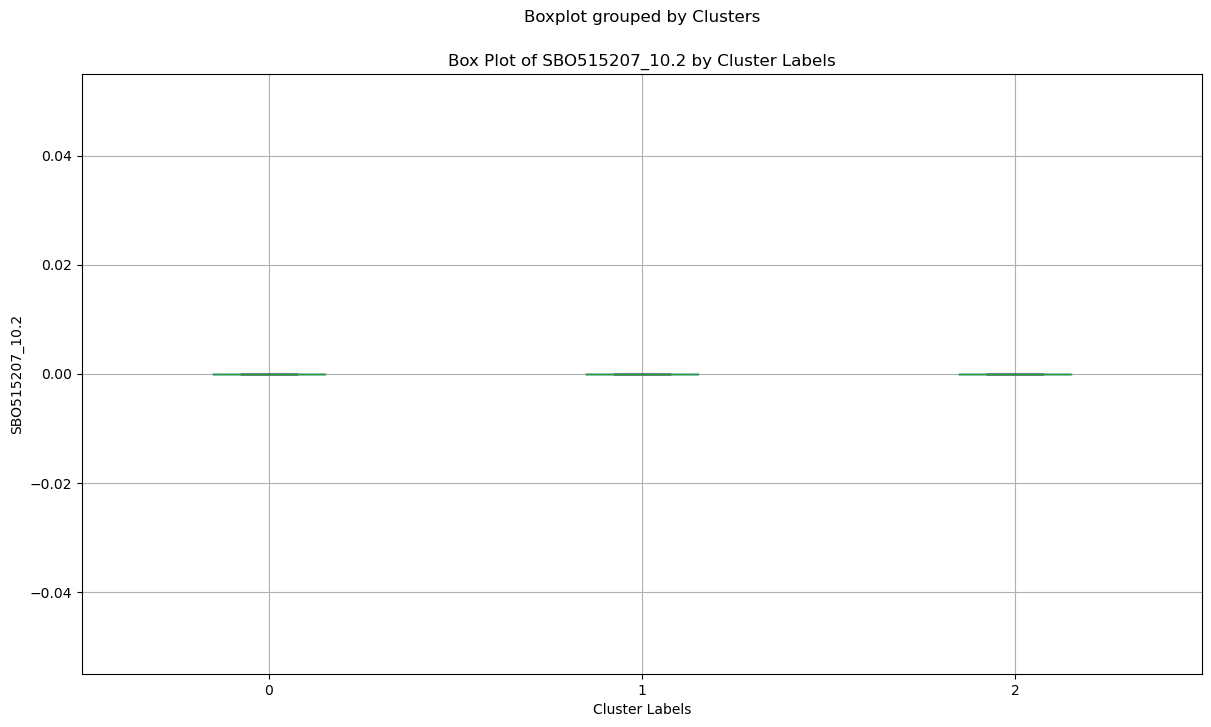

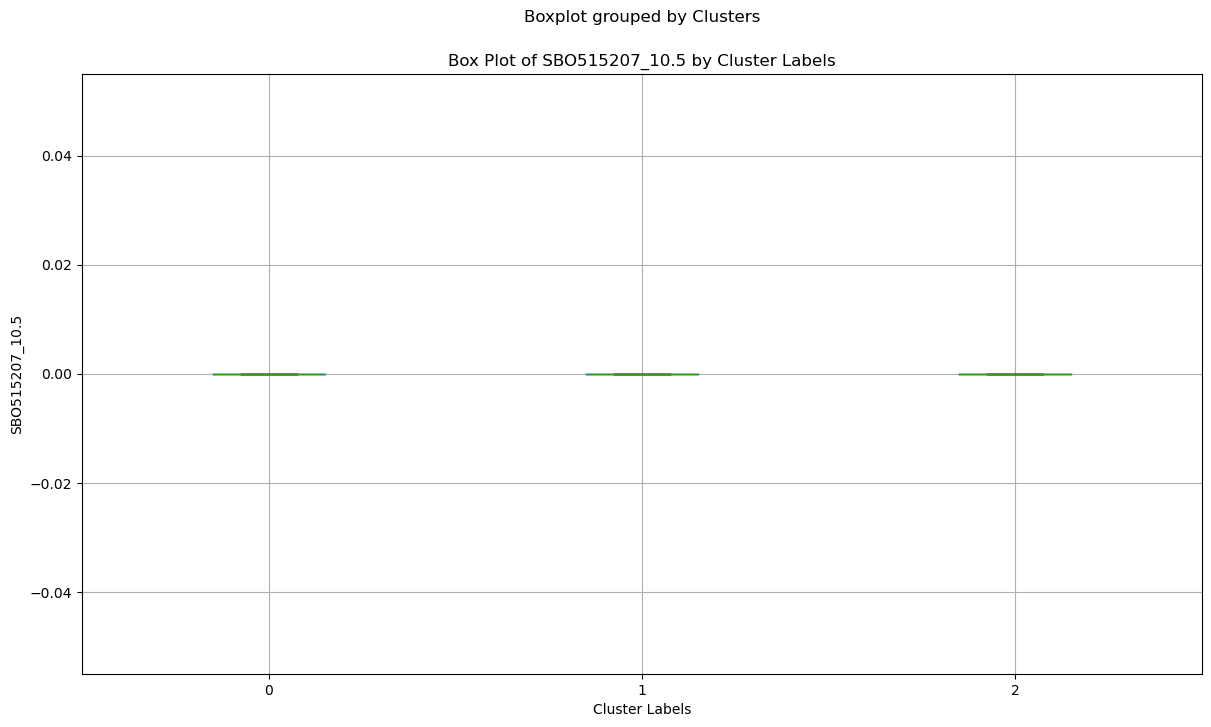

In [20]:
if isinstance(dataset, pd.core.groupby.DataFrameGroupBy):
    dataset = dataset.groupby("Clusters")

# Iterate over each feature
for feature in dataset.columns[:-1]:  # Exclude the last column 'Clustering_labels'
    # Create a new figure for each subplot
    fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figsize here
    # Create a box plot for the current feature, grouped by the cluster labels
    dataset.boxplot(column=feature, by="Clusters", ax=ax)
    # Set plot labels and title
    ax.set_xlabel('Cluster Labels')
    ax.set_ylabel(feature)
    ax.set_title(f'Box Plot of {feature} by Cluster Labels')

plt.show()

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(dataset)
PCA_ds = pd.DataFrame(pca.transform(dataset), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean           std           min           25%  \
col1  3045.0 -9.787298e-11  4.997721e+06 -1.595554e+06 -1.527205e+06   
col2  3045.0  1.443626e-10  1.832291e+06 -2.397314e+07 -2.457161e+04   
col3  3045.0 -3.303213e-11  1.065231e+06 -1.473207e+07 -2.708964e+05   

               50%            75%           max  
col1 -1.309702e+06 -583322.689426  1.150795e+08  
col2  3.821423e+05  410961.786016  3.063633e+07  
col3 -2.048074e+05   15491.826389  2.145383e+07

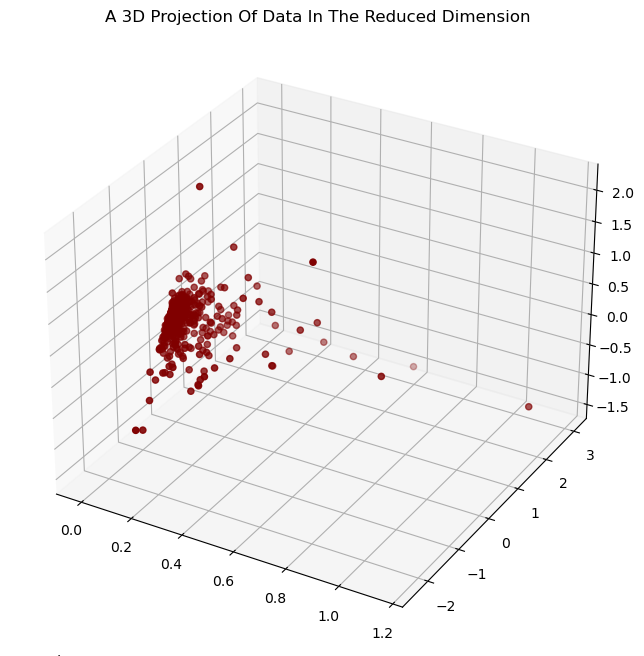

In [22]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [23]:
# fit model and predict clusters
yhat= kmeans.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat
#Adding the Clusters feature to the orignal dataframe.
dataset["Clusters"]= yhat

/var/folders/wx/ryvwptxd2r3_cfnyq2_0tcrw0000gn/T/ipykernel_75884/914342275.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


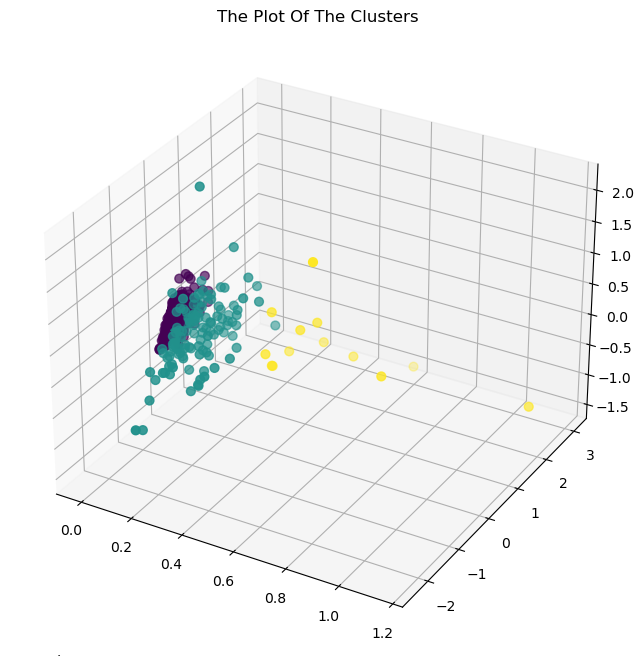

In [24]:
cmap = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Model Evaluation

In [25]:
from sklearn import metrics

labels = kmeans.labels_
print ("Silhouette score is :" , metrics.silhouette_score (dataset, labels, metric = 'euclidean'))
print ("Calinski-Harabasz score is :" , metrics.calinski_harabasz_score (dataset, labels))
print ("Davies-Bouldin score is :" , metrics.davies_bouldin_score(dataset, labels))

Silhouette score is : 0.8724625451530819
Calinski-Harabasz score is : 3568.1849220830118
Davies-Bouldin score is : 0.687824210071204
